# Wholesale Customers Data- Unsupervised Classification (Clustering)

## Data Description

The Wholesale Customers dataset hosted by the University of California Library website is a real dataset describing the annual spending of various types of products for different customers of a wholesale distributor. 

The dataset contains 8 attributes or features, for 440 customers:

Channel: {Horeca (Hotel/Restaurant/Café) - 298, Retail - 142} - Factored as Channel 1= Horeca and Channel 2 = Retail
Region: {1:Lisbon - 77, 2:Oporto - 47, or 3:Other - 316} \Other variables or features include annual spending (m.u.) on products in the Fresh, Milk, Grocery, Frozen,  Detergents_Paper and Delicatessen categories.


## Clustering 

The dataset may be used to analyze customer behavior and purchasing patterns. Without the presence of clear classifiers, we may understand the underlying structure of the data by attempting to cluster the same (unsupervised). For example, we could explore customer segments based on  purchasing behavior or identify which productsare most commonly purchased together..

We will proceed to determine clustering using one of each type of clustering algorithms : partitional, hierarchical and density based algorithms.

- **K-Means- Partitional Clustering** divides data objects into nonoverlapping groups such that, no object may be a member of more than one cluster, and every cluster should have at least one object..
- **Hierarchical (Agglomerative) Clustering** determines cluster assignments by building a tree-based hierarchy of points called a dendrogram.
- **DBSCAN (Density-Based Spatial Clustering of Applications with Noise) -Density Based Clustering** determines cluster assignments based on the density of data points in a region, without specifying the number of clusters. A distance-based parameteris used as a tunable threshold. 
 

 

### Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import seaborn as sns
import scipy.cluster.hierarchy as sch
import sklearn.utils

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
from yellowbrick.cluster import KElbowVisualizer

%matplotlib inline
sns.set_style('whitegrid')

### Loading the data  

In [2]:
# Load the data from the csv file in a new variable named input_data 
# Print the dimensionality of the data and view the first few rows of the DataFrame

input_data = pd.read_csv("./Wholesale customers data.csv", sep=",")
print(input_data.shape)
input_data.head()

(440, 8)


Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [3]:
# For simplicity, let's only work with the features "Annual Income (k$)" and "Spending Score (1-100)"
# Set the index to "CustomerID" and keep only the afore-mentioned features using either drop() or indexing 
input_data['Customer_ID'] = input_data.index
#input_data1 = input_data.drop('Channel', axis=1)
#input_data2 = input_data1.drop('Region', axis=1)
#input_data.set_index('CustomerID', inplace=True)
#input_data = input_data.loc[:, ["Annual Income (k$)","Spending Score (1-100)"] ]
input_data.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Customer_ID  
0        1338            0  
1        1776            1  
2        7844            2  
3        1788            3  
4        5185            4

### Exploratory Data Analysis (EDA)  

 

In [4]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
 8   Customer_ID       440 non-null    int64
dtypes: int64(9)
memory usage: 31.1 KB


No null values are present. All variables are numerical or graded numerically.Delicatessen is tited as Delicassen.

In [5]:
input_data.describe()

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  Customer_ID  
count    440.000000        440.000000    440.000000   440.000000  
mean    3071.931818       2881.493182   1524.870455   219.500000  
std     4854.673333       4767.854448   2820.105937   127.161315  
min       25.000000          3.000000      3.000000     0.000000  
25%      742.250000        256.750000    408.250000   109.750000  
50%     1526.000000        816.500000    965.500000   219.500000  
75%     3554.250000       3922.000000   1820.250000   329.250000  
max    60869.000000      40827.000000  47943.000000   439.000000

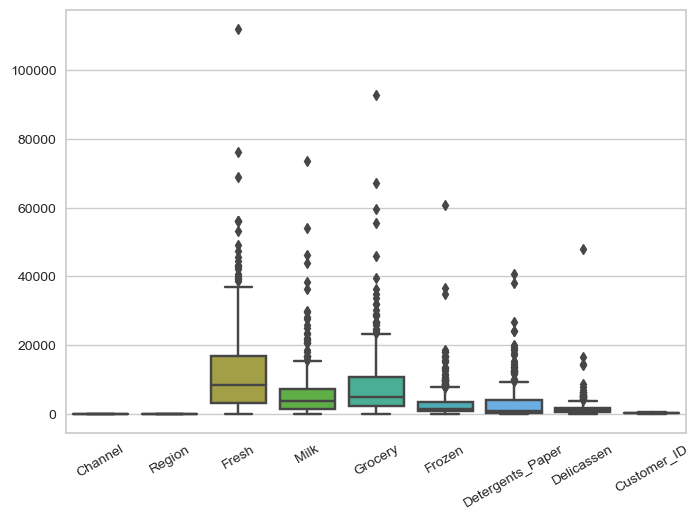

In [6]:
# Use a boxplot to check for any differences in feature ranges (scales)

ax = sns.boxplot(data=input_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show();

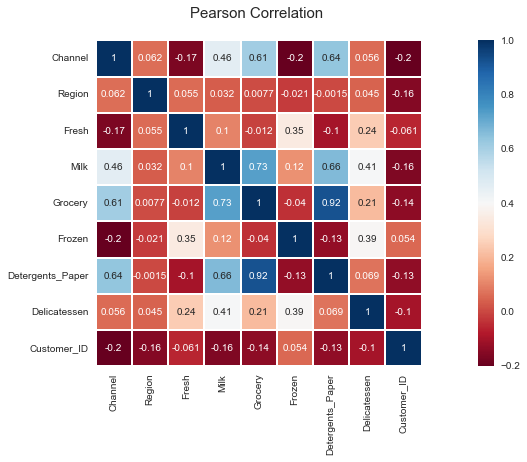

In [247]:
#We precursarily examine correlations 
plt.figure(figsize=(20,6))
plt.title('Pearson Correlation ', y=1.05, size=15)
sns.heatmap(input_data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)
plt.show();

Milk , Grocery and Detergents_Paper have a reasonably strong positive correlation.

<Figure size 900x600 with 0 Axes>

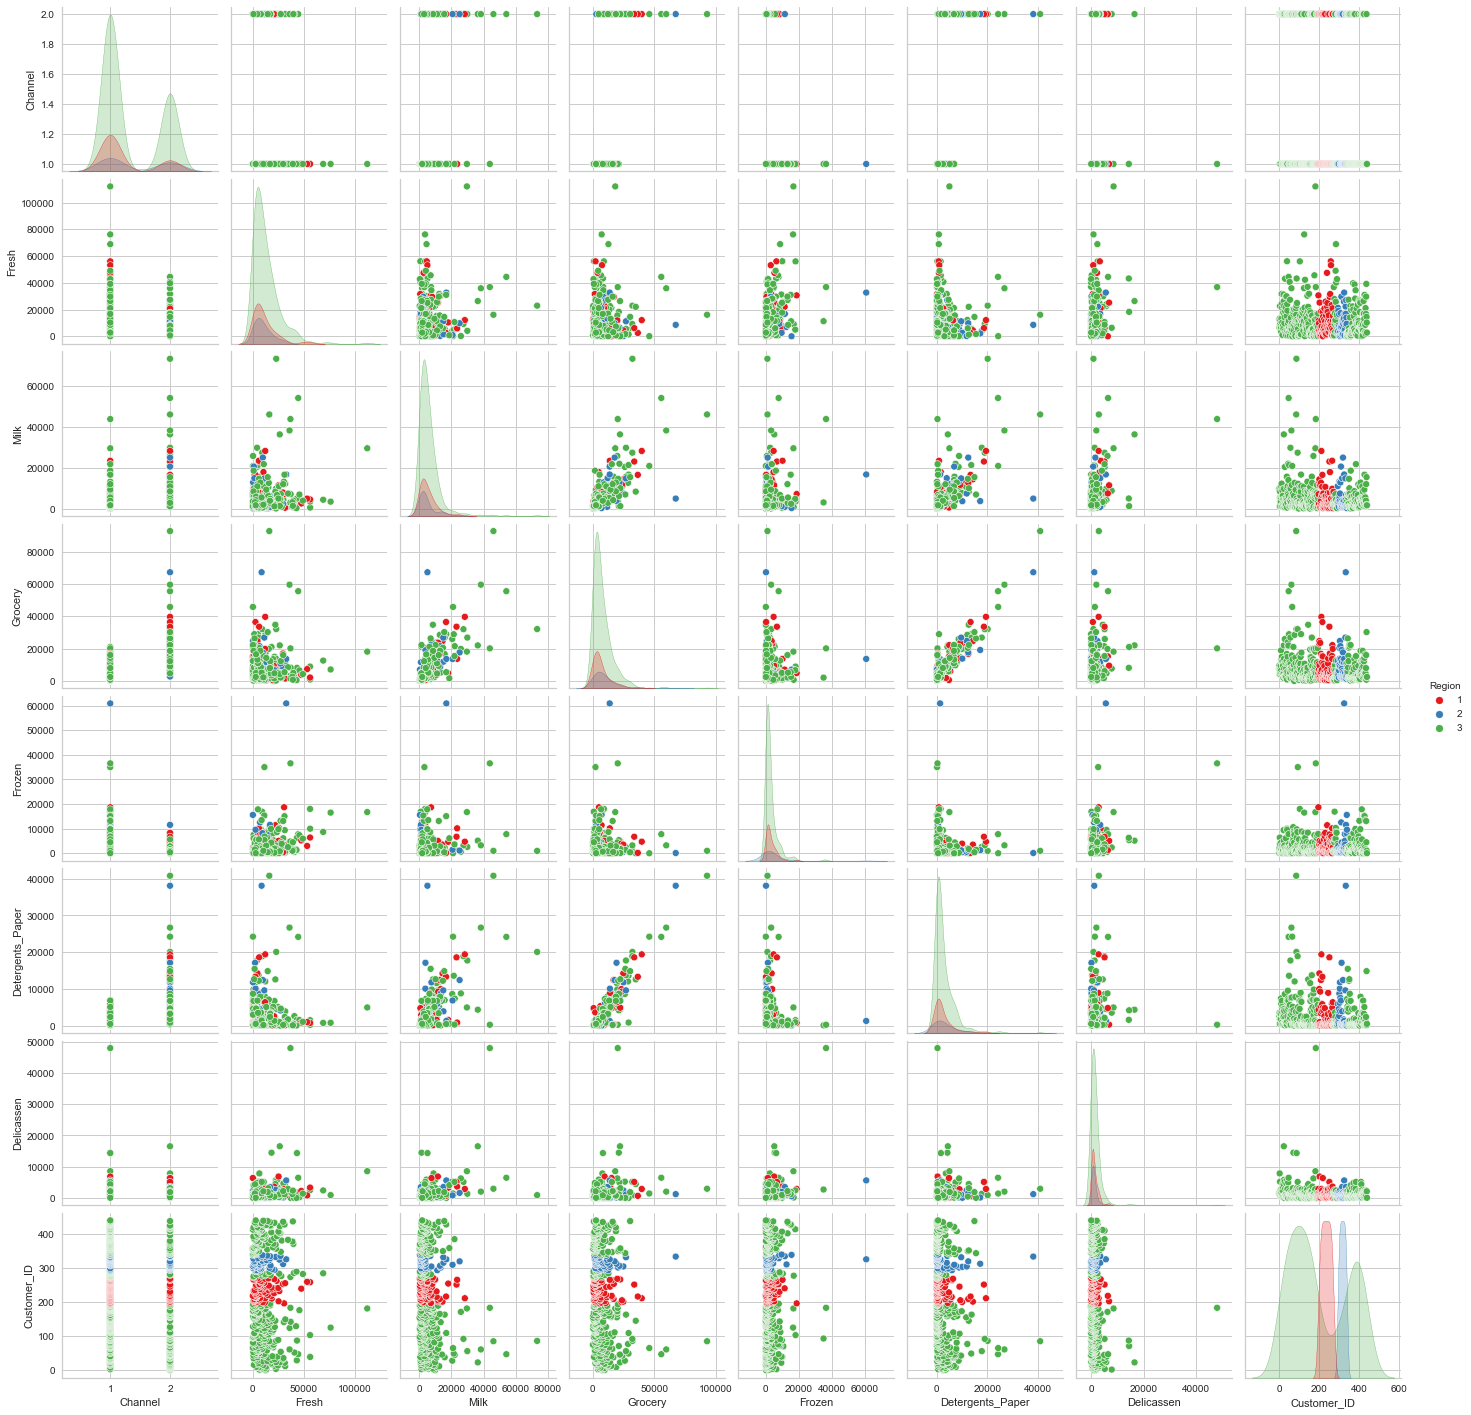

In [8]:
#We may also check paired feature plots w.r.t. to the 3 regions
plt.figure(dpi=150)
sns.pairplot(data=input_data,hue='Region',palette='Set1');

Though Region 3 or 'Other' far exceeds the other regions in terms of no. of customers , the distributions w.r.t. spending in the 3 regions are not especially distinct from each other. Region 1 and 2 correspond to specific ranged of Customer -Ids while Region 3 encompasses all the reamining IDs before and after these fixed ranges.

<Figure size 900x600 with 0 Axes>

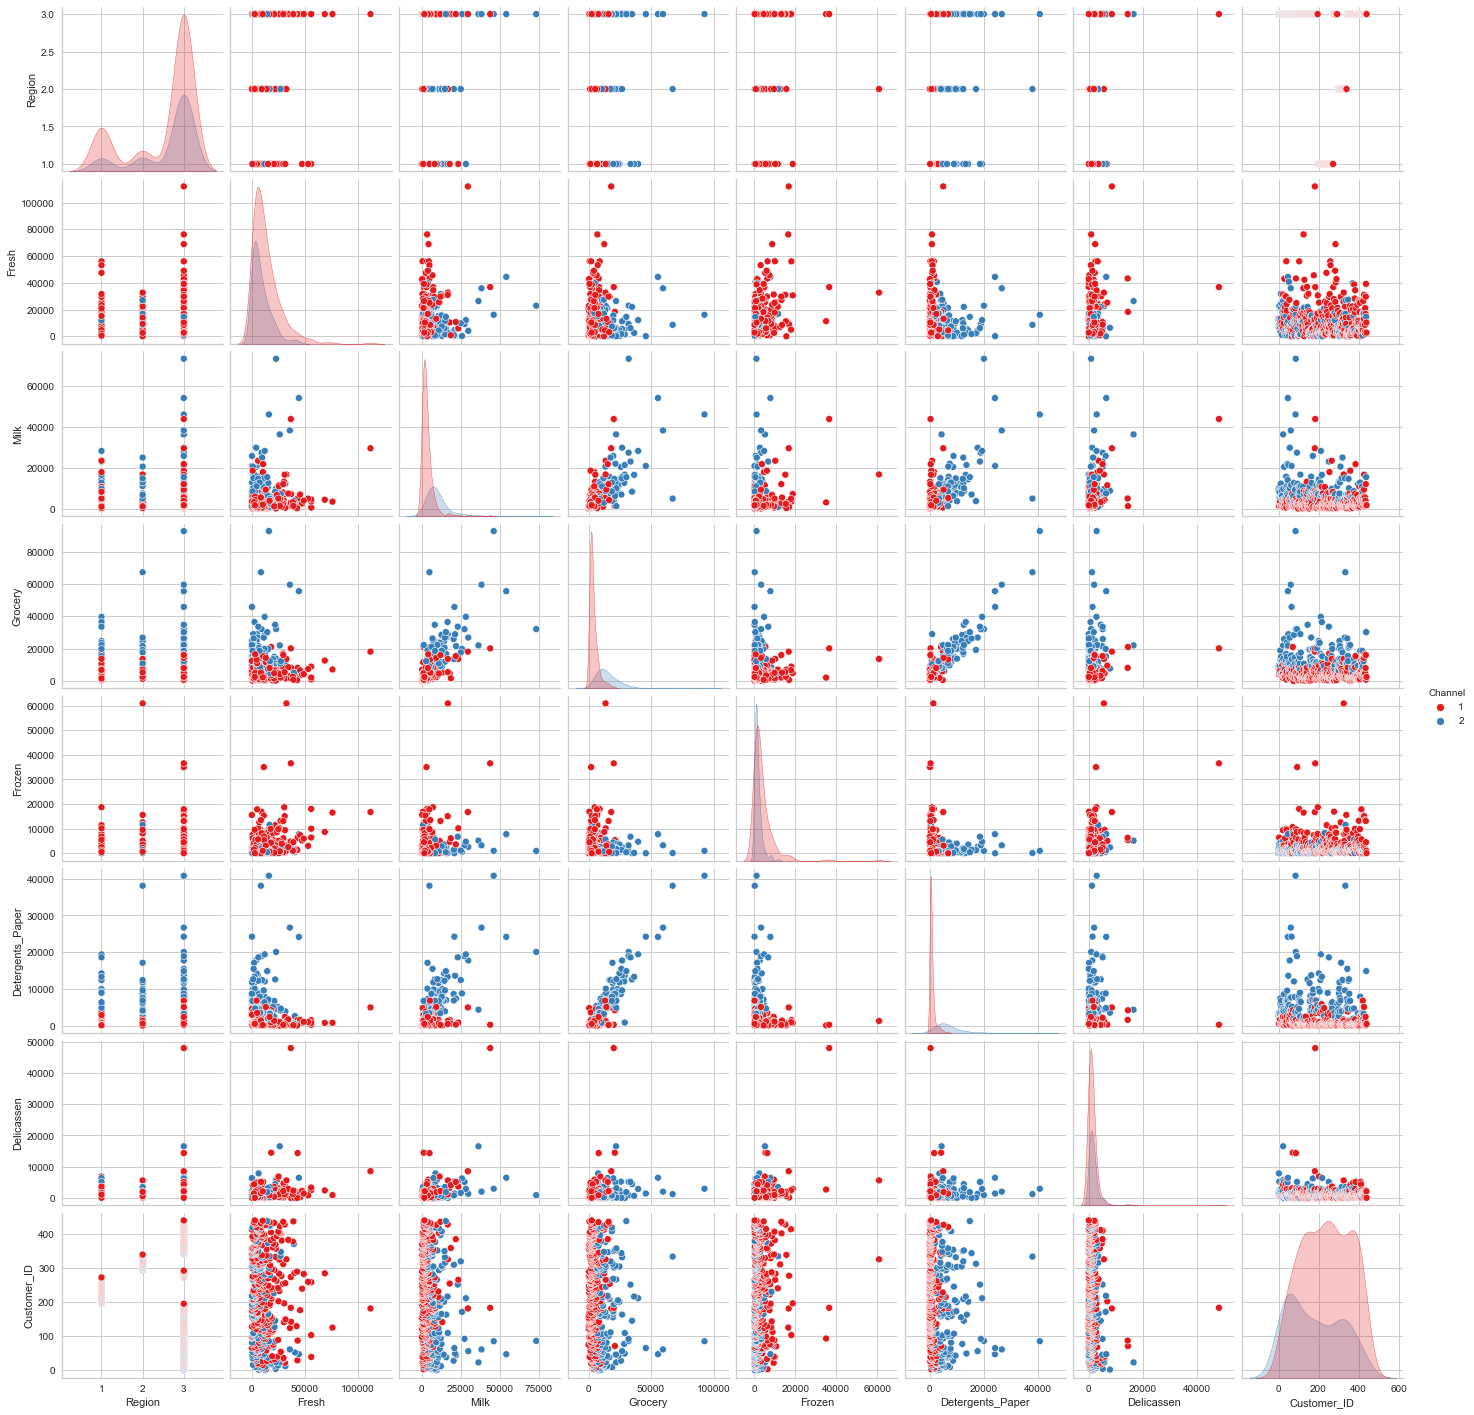

In [9]:
# We proceed to check paired plots w.r.t to the 2 Channels
plt.figure(dpi=150)
sns.pairplot(data=input_data,hue='Channel',palette='Set1');

Channel 1 (Horeca) includes more than double the no. of customers in Channel 2 (Retail). However Retail customers tend to spend higher in most categories.

We may explore channel-wise spending further, since they have a clear differentiation. Also, since clustering with KMeans algorithm is	based	on	measuring	distances,	this	implies	that	all	variables	must	be	continuous	and	the	approach	can	be	severely	affected	by	outliers.	So,	we	check	if	outliers	are	present.	We	will	check	only	the spending.Box-plots	are	useful	for	detection	of	outliers. Channel 1 represents Horeca customers while Retail customers are factorised as Channel 2

<AxesSubplot: xlabel='Channel', ylabel='Detergents_Paper'>

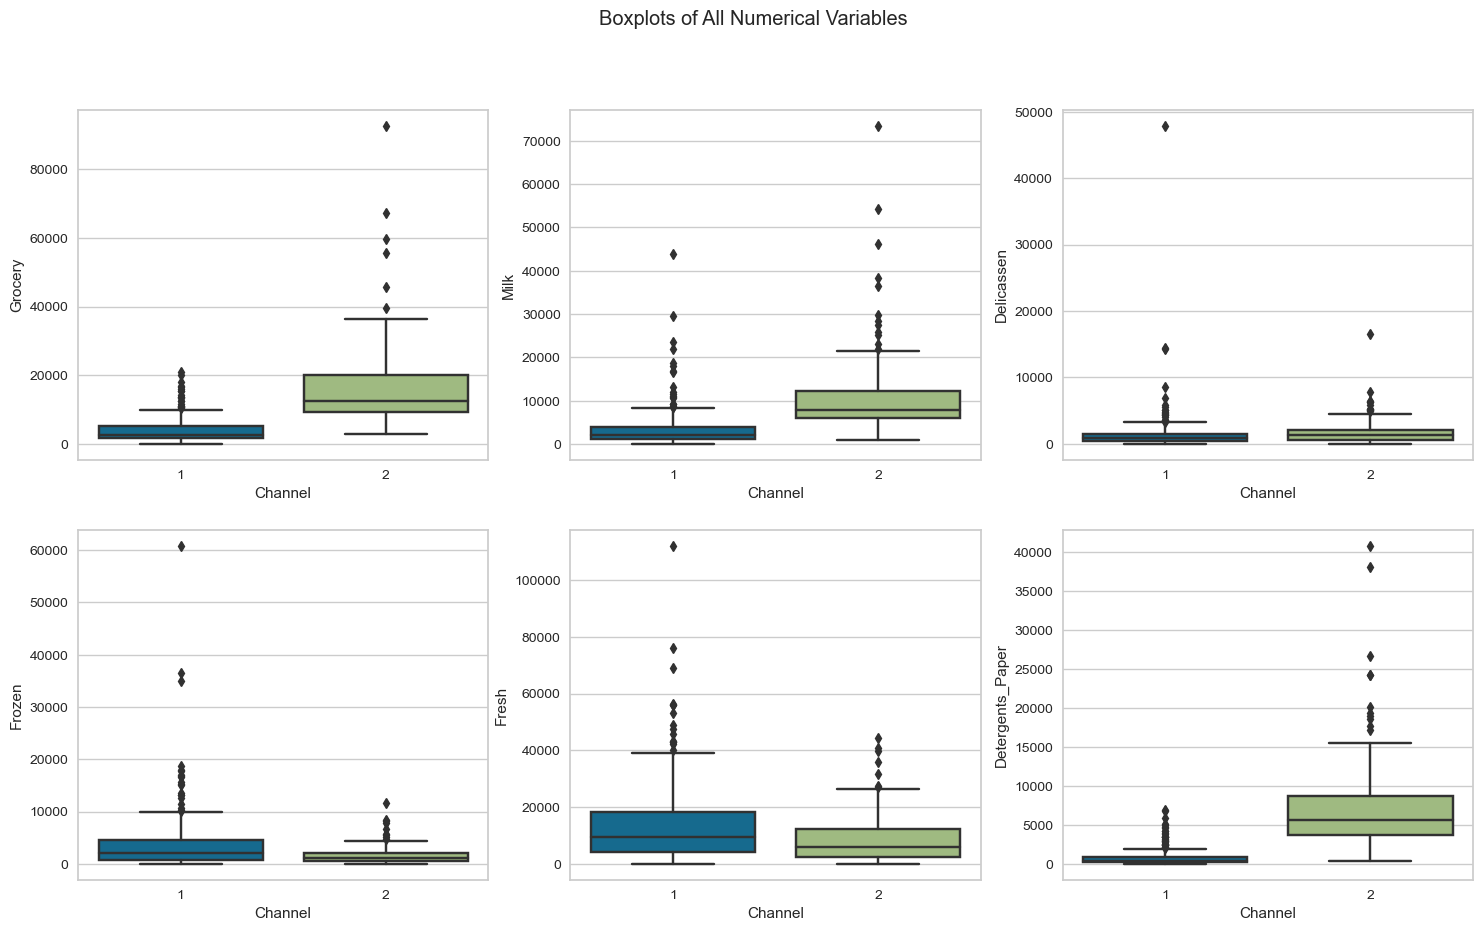

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 3, figsize=(18, 10))
 
fig.suptitle('Boxplots of All Numerical Variables')
 
#wholesale_data = sns.load_dataset("input_data")
 
sns.boxplot(ax=axes[0, 0], data=input_data, x='Channel', y='Grocery')
sns.boxplot(ax=axes[0, 1], data=input_data, x='Channel', y='Milk')
sns.boxplot(ax=axes[0, 2], data=input_data, x='Channel', y='Delicassen')
sns.boxplot(ax=axes[1, 0], data=input_data, x='Channel', y='Frozen')
sns.boxplot(ax=axes[1, 1], data=input_data, x='Channel', y='Fresh')
sns.boxplot(ax=axes[1, 2], data=input_data, x='Channel', y='Detergents_Paper')


In [8]:
#To avoid the distortion that may be introduced by the prescence of outliers we could impute with the 'Winsoring' technique.
#First we enumerate these outliers.
def count_outliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    return ((x < q1 - 1.5 * iqr) | (x > q3 + 1.5 * iqr)).sum()

# Apply the outlier detection function to each column of the dataframe
num_outliersfirst = input_data.apply(count_outliers)

# Print the number of outliers in each column
print(num_outliersfirst)

Channel              0
Region               0
Fresh               20
Milk                28
Grocery             24
Frozen              43
Detergents_Paper    30
Delicassen          27
Customer_ID          0
dtype: int64


In [9]:
#But let us try clustering first without changing anything.
#We have to consider that outliers may represent extreme high-spending retailers that may be targetted with special promotions
#to ensure loyalty and to encourage spending as well.
#Scaling before clustering
#Let's fix the naming as well
input_data.rename(columns = {'Delicassen':'Delicatessen'}, inplace = True)
input_data.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicatessen  Customer_ID  
0          1338            0  
1          1776            1  
2          7844            2  
3          1788            3  
4          5185            4

In [10]:
#We may drop the non-spending features at this stage, saving to a new dataframe
#df2=df.drop(["Courses", "Fee"], axis = 1)
spending_input_data= input_data.drop(['Channel','Region','Customer_ID'], axis=1)
spending_input_data.head()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185

# Let us also transform the data with winsorisation for comparison later 

In [11]:
def winsorize_dataframe(spending_input_data, alpha=0.05):
    """
    Winsorize a pandas dataframe by replacing values outside of the alpha/2 and 1-alpha/2 quantiles
    with the nearest value at the alpha/2 and 1-alpha/2 quantiles, respectively.
    
    Args:
    - df (pandas dataframe): the dataframe to be winsorized
    - alpha (float, default=0.05): the percentage of values to be replaced on each tail
    
    Returns:
    - winsorized_df (pandas dataframe): the winsorized dataframe
    """
    # Compute the quantiles for each column
    q_low = spending_input_data.quantile(alpha/2)
    q_high = spending_input_data.quantile(1-alpha/2)
    
    # Apply the Winsorization function to each column
    winsorized_spending_input_data = spending_input_data.apply(lambda x: np.where(x < q_low[x.name], q_low[x.name], np.where(x > q_high[x.name], q_high[x.name], x)))
    
    return winsorized_spending_input_data
winsorized_spending_input_data=winsorize_dataframe(spending_input_data, alpha=0.05)
winsorized_spending_input_data

Fresh     Milk  Grocery   Frozen  Detergents_Paper  Delicatessen
0    12669.0   9656.0   7561.0    214.0            2674.0       1338.00
1     7057.0   9810.0   9568.0   1762.0            3293.0       1776.00
2     6353.0   8808.0   7684.0   2405.0            3516.0       5780.15
3    13265.0   1196.0   4221.0   6404.0             507.0       1788.00
4    22615.0   5410.0   7198.0   3915.0            1777.0       5185.00
..       ...      ...      ...      ...               ...           ...
435  29703.0  12051.0  16027.0  13135.0             182.0       2204.00
436  39228.0   1431.0    764.0   4510.0              93.0       2346.00
437  14531.0  15488.0  30243.0    437.0           14841.0       1867.00
438  10290.0   1981.0   2232.0   1038.0             168.0       2125.00
439   2787.0   1698.0   2510.0     90.6             477.0         52.00

[440 rows x 6 columns]

# Trying a Pipeline with manual entry of Scaler type in preprocessor and then checking for ideal no. of components for PCA and ideal no. of clusters for KMeans

Checking for which scaler gives the best inertia score by replacing and running, we find that thpugh Kmeans performs poorly indeed, the least poor score is with MinMaxScaler

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# define your data and scaling/transforming steps
preprocessor = Pipeline(steps=[
    ('scaler',MinMaxScaler())
])

# define the parameter grid for the clustering algorithm
param_grid = {
   
    'reduce_dim__n_components': [2, 3, 4, 5],
    'cluster__n_clusters': [2, 3, 4, 5],
    'cluster__init': ['k-means++', 'random'],
    'cluster__max_iter': [100, 200]
}

# create the KMeans object
kmeans = KMeans()

# create the pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('reduce_dim', PCA()),
                       ('cluster', kmeans)])

# create the GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid=param_grid)
grid_search.fit(winsorized_spending_input_data)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('scaler',
                                                         MinMaxScaler())])),
                                       ('reduce_dim', PCA()),
                                       ('cluster', KMeans())]),
             param_grid={'cluster__init': ['k-means++', 'random'],
                         'cluster__max_iter': [100, 200],
                         'cluster__n_clusters': [2, 3, 4, 5],
                         'reduce_dim__n_components': [2, 3, 4, 5]})

In [16]:
print(grid_search.best_params_)

{'cluster__init': 'k-means++', 'cluster__max_iter': 100, 'cluster__n_clusters': 5, 'reduce_dim__n_components': 2}


In [35]:
print(grid_search.cv_results_)

{'mean_fit_time': array([0.05246139, 0.05623555, 0.0474648 , 0.05063243, 0.05623665,
       0.05311332, 0.05936074, 0.05623641, 0.05311303, 0.06560907,
       0.06873293, 0.06449227, 0.06873326, 0.06873293, 0.07810621,
       0.06878796, 0.04998736, 0.06066866, 0.05311236, 0.04998798,
       0.05322237, 0.05623741, 0.074261  , 0.05546665, 0.05936131,
       0.05936069, 0.06466551, 0.05327864, 0.06560993, 0.06248651,
       0.0624846 , 0.06560974, 0.04686351, 0.04686446, 0.04686375,
       0.05830917, 0.05943952, 0.06248455, 0.06873355, 0.05311193,
       0.07497973, 0.06560893, 0.06797018, 0.06560893, 0.06248584,
       0.06873336, 0.0656095 , 0.06560993, 0.04061546, 0.04374061,
       0.0468637 , 0.0437398 , 0.04686422, 0.05311232, 0.05623722,
       0.0499887 , 0.06873336, 0.05777326, 0.06560874, 0.05936074,
       0.07810621, 0.07498159, 0.06873293, 0.07498102]), 'std_fit_time': array([1.11938715e-02, 7.69968995e-03, 9.95239934e-03, 6.05575944e-03,
       7.65222215e-03, 7.65348744e

In [17]:
print(grid_search.best_score_)

-4.917122864020735


See below results of RobustScaler for Reference with Winsorised Data 

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# define your data and scaling/transforming steps
preprocessor = Pipeline(steps=[
    ('scaler',RobustScaler())
])

# define the parameter grid for the clustering algorithm
param_grid = {
   
    'reduce_dim__n_components': [2, 3, 4, 5],
    'cluster__n_clusters': [2, 3, 4, 5],
    'cluster__init': ['k-means++', 'random'],
    'cluster__max_iter': [100, 200]
}

# create the KMeans object
kmeans = KMeans()

# create the pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('reduce_dim', PCA()),
                       ('cluster', kmeans)])

# create the GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid=param_grid)
grid_search.fit(winsorized_spending_input_data)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('scaler',
                                                         RobustScaler())])),
                                       ('reduce_dim', PCA()),
                                       ('cluster', KMeans())]),
             param_grid={'cluster__init': ['k-means++', 'random'],
                         'cluster__max_iter': [100, 200],
                         'cluster__n_clusters': [2, 3, 4, 5],
                         'reduce_dim__n_components': [2, 3, 4, 5]})

In [19]:
print(grid_search.best_score_)

-87.61146266359094


# The pipeline now with unwinsorised data

The same holds true for the original data. In fact without the winsorisation the performance improves. 
This is perhaps since we are using all the data in the quantile , while the outliers are mostly from the Retail Channel.

In [13]:

# define your data and scaling/transforming steps
preprocessor = Pipeline(steps=[
    ('scaler',MinMaxScaler())
])

# define the parameter grid for the clustering algorithm
param_grid = {
   
    'reduce_dim__n_components': [2, 3, 4, 5],
    'cluster__n_clusters': [2, 3, 4, 5],
    'cluster__init': ['k-means++', 'random'],
    'cluster__max_iter': [100, 200]
}

# create the KMeans object
kmeans = KMeans()

# create the pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('reduce_dim', PCA()),
                       ('cluster', kmeans)])

# create the GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid=param_grid)
grid_search.fit(spending_input_data)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('scaler',
                                                         MinMaxScaler())])),
                                       ('reduce_dim', PCA()),
                                       ('cluster', KMeans())]),
             param_grid={'cluster__init': ['k-means++', 'random'],
                         'cluster__max_iter': [100, 200],
                         'cluster__n_clusters': [2, 3, 4, 5],
                         'reduce_dim__n_components': [2, 3, 4, 5]})

In [38]:
print(grid_search.best_params_)

{'cluster__init': 'random', 'cluster__max_iter': 200, 'cluster__n_clusters': 5, 'reduce_dim__n_components': 2}


In [39]:
print(grid_search.best_score_)

-2.247339155372238


# The above pipeline is invalid since we cannot specify a metric and the default measure of inertia will also vary with each scaler. For the moment though we proceed with unwinsorised data

# Using MinMaxScaler  :
 It scales features to a range between 0 and 1, which can be useful with bounded features. It preserves the original shape of the distribution of each feature, which can be important in case the distribution includes important information for the clustering process.

In [12]:
# Instantiate the MinMaxScaler and fit_transform the input_data. 
# Save the results in a new variable named Xspend_scaledMM

scaler   = MinMaxScaler()
Xspend_scaledMM = scaler.fit_transform(spending_input_data)
scaled_Xspend = pd.DataFrame(Xspend_scaledMM, columns=spending_input_data.columns)
scaled_Xspend.head()

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  0.112940  0.130727  0.081464  0.003106          0.065427      0.027847
1  0.062899  0.132824  0.103097  0.028548          0.080590      0.036984
2  0.056622  0.119181  0.082790  0.039116          0.086052      0.163559
3  0.118254  0.015536  0.045464  0.104842          0.012346      0.037234
4  0.201626  0.072914  0.077552  0.063934          0.043455      0.108093

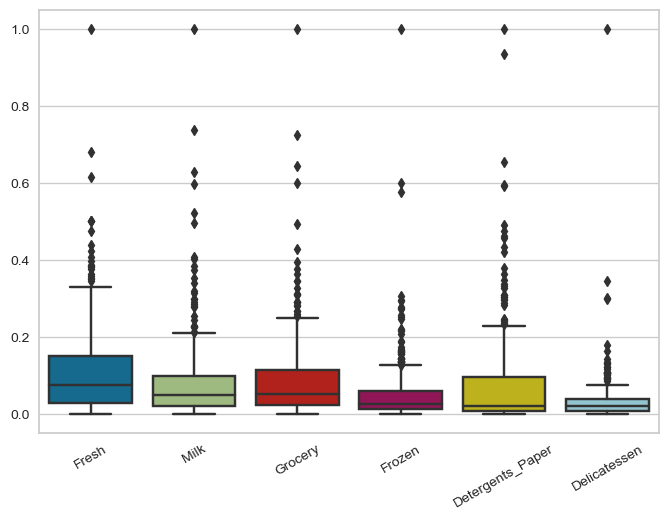

In [13]:
#check the scale now
axSpend = sns.boxplot(data=scaled_Xspend)
axSpend.set_xticklabels(axSpend.get_xticklabels(), rotation=30)
plt.show();

# Using RobustScaler

In [14]:
#RobustScaler
scaler   = RobustScaler()
Xspend_scaledRS = scaler.fit_transform(spending_input_data)
scaled_XspendRS = pd.DataFrame(Xspend_scaledRS, columns=spending_input_data.columns)
scaled_XspendRS.head()

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  0.301680  1.065712  0.329952 -0.466572          0.506787      0.263810
1 -0.104810  1.092934  0.565993  0.083926          0.675670      0.574008
2 -0.155802  0.915816  0.344418  0.312589          0.736512      4.871459
3  0.344850 -0.429714 -0.062862  1.734708         -0.084442      0.582507
4  1.022092  0.315171  0.287260  0.849573          0.262056      2.988314

# Using Standardscaler

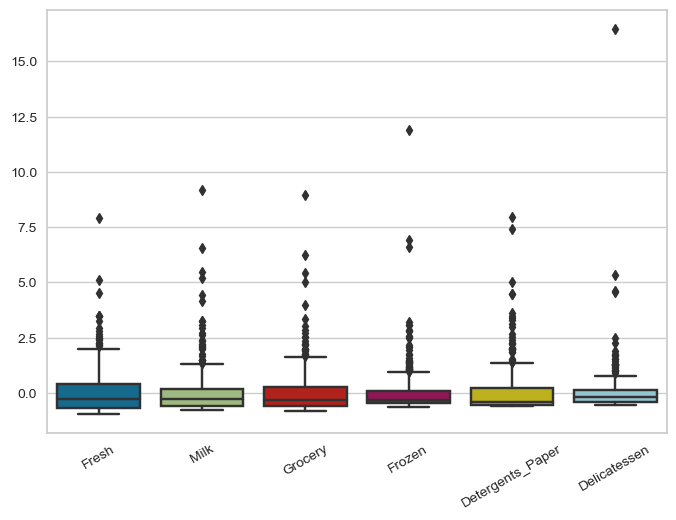

In [15]:
#Keep Standard Scaler handy
scaler   = StandardScaler()
Xspend_scaledSS = scaler.fit_transform(spending_input_data)
scaled_XspendSS = pd.DataFrame(Xspend_scaledSS, columns=spending_input_data.columns)
#scaled_XspendSS.head()
axSpendSS = sns.boxplot(data=scaled_XspendSS)
axSpendSS.set_xticklabels(axSpendSS.get_xticklabels(), rotation=30)
plt.show();

# Visualizing PCA (using MinMax Scaled Data)
2 Components, MinMaxScaler

In [16]:
#We know that there are 3 highly correlated features and this redundancy may be removed considering PCA analysis
# We use PCA just to get an idea of the possible underlying datastructure. Let us consider 2 components for both channels and also 4 components for independant variables
# Apply PCA using 2 principal components 
# Instantiate the PCA object using n_components=2 and store as "pca"
# Apply fit_transform() on the X_scaled data and store into a new variable named "pc_scores"
# Convert the pc_scores to a pd.DataFrame with columns=["PC1", "PC2"] 
# print the pca.explained_variance_ratio_.cumsum()

pca2 = PCA(n_components=2)
pc_scores_fspendMM = pca2.fit_transform(Xspend_scaledMM )
pc_scores_fspendMM = pd.DataFrame(pc_scores_fspendMM, columns=["PC1", "PC2"])
pca2.explained_variance_ratio_.cumsum()

array([0.51948323, 0.7835533 ])

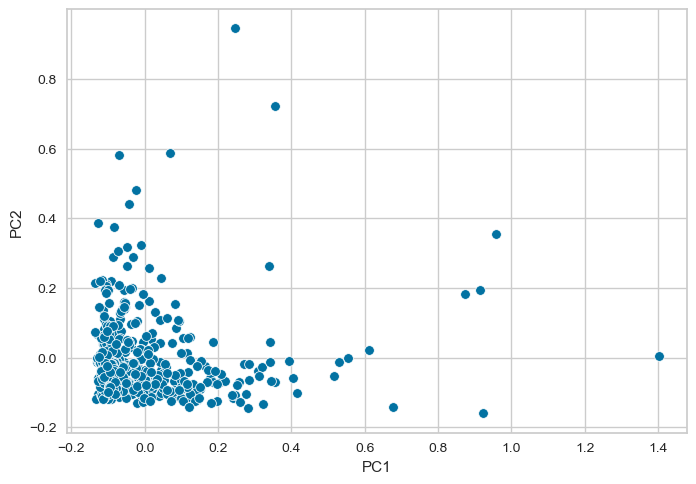

In [17]:
# Plot the 2 Principal Components (PC scores) in a scatterplot 

sns.scatterplot(x="PC1", y="PC2", data=pc_scores_fspendMM)
plt.show();

4 Component; MinMaxScaler

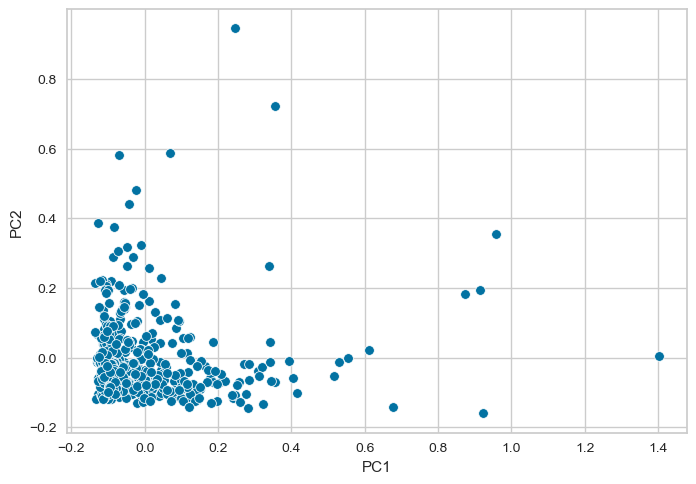

In [18]:
pca4 = PCA(n_components=4)
pc_scores_fspendMM4 = pca4.fit_transform(Xspend_scaledMM )
pc_scores_fspendMM4 = pd.DataFrame(pc_scores_fspendMM4, columns=["PC1", "PC2","PC3","PC4"])
pca4.explained_variance_ratio_.cumsum()
sns.scatterplot(x="PC1", y="PC2", data=pc_scores_fspendMM4)
plt.show();

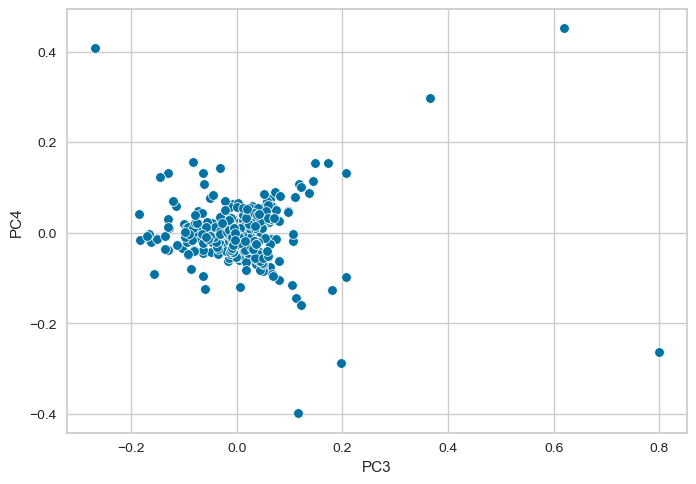

In [19]:
sns.scatterplot(x="PC3", y="PC4", data=pc_scores_fspendMM4)
plt.show();

# KMeans determination with Dimensionality Reduction from PCA and considering optimum no.of clusters=2

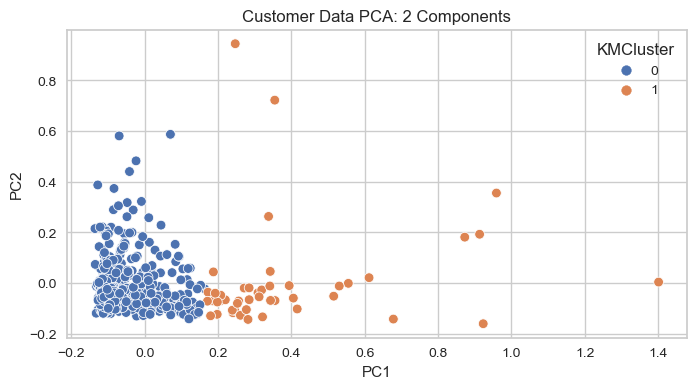

In [20]:
# Instantiating a KMeans object with the OPTIMAL k as found above 
# Store it in a variable named "kmodel" 
# Fit the kmodel model on the pc_scores(!!) data and use the predict() function (or fit_predict() directly) 
# to get the assinged clusters for each point 
# Save the results in a new variable "cluster_assignment" 
# Save the output of cluster_assignment to pc_scores["KMCluster"]  
opt_k=2
kmodel = KMeans(n_clusters=opt_k)
cluster_assignment = kmodel.fit_predict(pc_scores_fspendMM)
pc_scores_fspendMM["KMCluster"] = cluster_assignment
# Plot the 2 Principal Components (PC scores) in a scatterplot using the "KMCluster" as hue

plt.figure(figsize=(8,4))

sns.scatterplot(x='PC1', 
                y='PC2', 
                data=pc_scores_fspendMM, 
                hue= "KMCluster",
                palette="deep"
               ).set_title('Customer Data PCA: 2 Components')

plt.show()

# KMeans determination with Dimensionality Reduction from PCA and considering  no.of clusters=4 and PC=4 as well

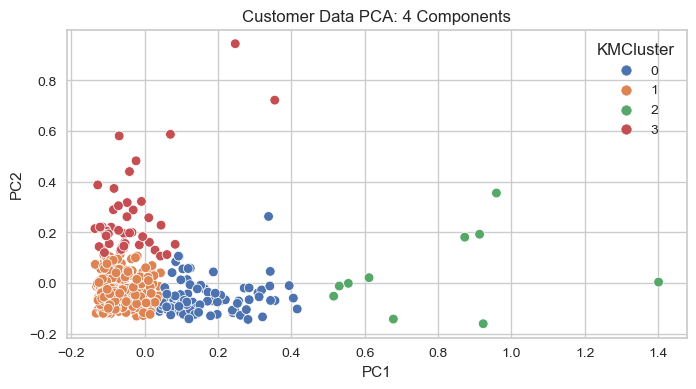

In [21]:
# Instantiate a KMeans object with 4  
# Store it in a variable named "kmodel" 
# Fit the kmodel model on the pc_scores(!!) data and use the predict() function (or fit_predict() directly) 
# to get the assinged clusters for each point 
# Save the results in a new variable "cluster_assignment" 
# Save the output of cluster_assignment to pc_scores["KMCluster"]  
opt_k=4
kmodel = KMeans(n_clusters=opt_k)
cluster_assignment = kmodel.fit_predict(pc_scores_fspendMM4)
pc_scores_fspendMM4["KMCluster"] = cluster_assignment
# Plot the 2 Principal Components (PC scores) in a scatterplot using the "KMCluster" as hue

plt.figure(figsize=(8,4))

sns.scatterplot(x='PC1', 
                y='PC2', 
                data=pc_scores_fspendMM4, 
                hue= "KMCluster",
                palette="deep"
               ).set_title('Customer Data PCA: 4 Components')

plt.show()

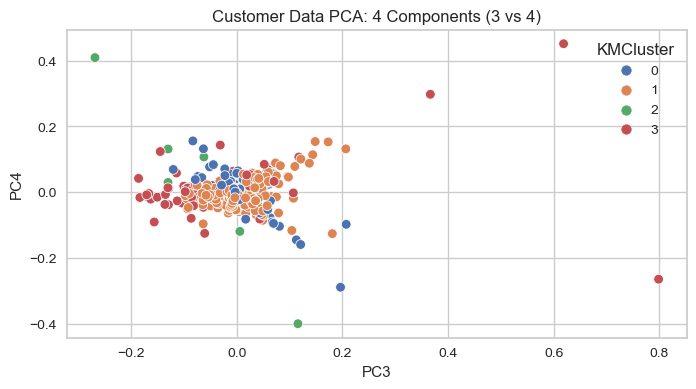

In [22]:
plt.figure(figsize=(8,4))

sns.scatterplot(x='PC3', 
                y='PC4', 
                data=pc_scores_fspendMM4, 
                hue= "KMCluster",
                palette="deep"
               ).set_title('Customer Data PCA: 4 Components (3 vs 4)')

plt.show()

Visual Inspection suggests that 4 components PCA describes the data more nuanced as compared to 2 components. However sincewe cannot match these components back to actual features let us proceed without PCA to determine the structure with KMeans

# KMeans- Both Channels without outlier transformation- Spending Data- MinMax Scaler

#Elbow method#
Elbow Method : There’s a sweet spot where the SSE curve starts to bend known as the elbow point. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters. The elbowpoint is the point where the rate of decrease of mean distance i.e. SSE will not change significantly with increase in number of clusters.

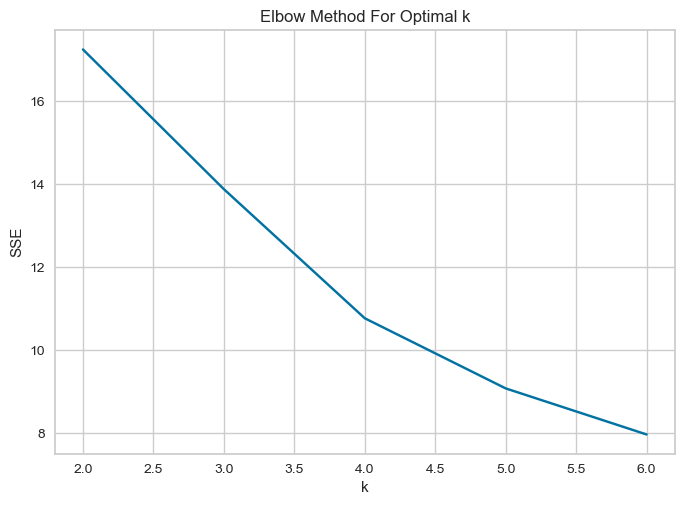

In [23]:
# Create an empty list for sum of squared distances to be appended for k values 2 to 7
Sum_of_squared_distances = [] 

# Values for K (centroids) 
K = range(2, 7)

for k in K:
    km = KMeans(n_clusters =k)
    km = km.fit(Xspend_scaledMM )
    
    # model.inertia_: Sum of squared distances of samples to their closest cluster center, 
    # weighted by the sample weights if provided 
    # (from documentation - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()



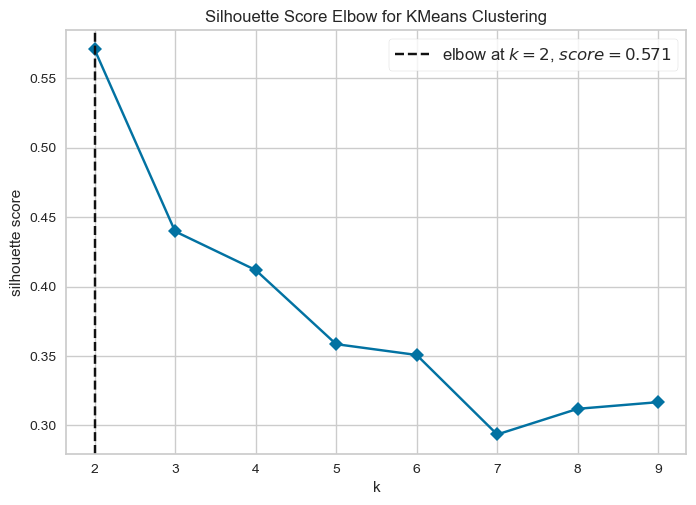

In [24]:
#Silhouette Coefficient
#Is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors: How close the data point is to other points in the cluster and how far away the data point is from points in other clusters. Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters
model = KMeans(random_state=42) 

visualizer = KElbowVisualizer(model, k=(2, 10), metric='silhouette', timings=False)
visualizer.fit(Xspend_scaledMM )    
visualizer.poof()
plt.show();




# KMeans without dimensionality reduction (MinMax Scaled data)

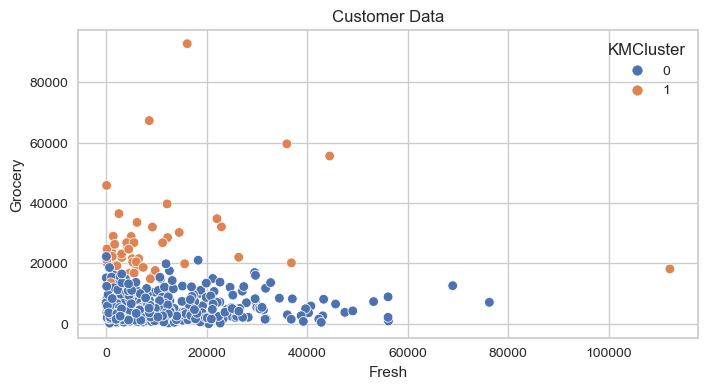

In [25]:

# Instantiate a KMeans object with a n_clusters = 2
# Store it in a variable named "km" 
# Fit the km model on the X_scaled data 
# Use the predict() function or the labels_ parameter to get the assinged clusters 
# Save the results in a new variable "cluster_assignment"

km = KMeans(n_clusters = 2,random_state=42)
cluster_assignment = km.fit_predict(Xspend_scaledMM)
cluster_assignment


spending_input_data["KMCluster"] = cluster_assignment
spending_input_data.head(10)
km.cluster_centers_
# Visualize the clusters 
plt.figure(figsize=(8,4))

sns.scatterplot(x='Fresh', 
                y='Grocery', 
                data=spending_input_data, 
                hue= "KMCluster",
                palette="deep"
               ).set_title('Customer Data')

plt.show()

In [26]:
# Instantiate the KMeans models
#
#km = KMeans(n_clusters=3, random_state=42)
#
# Fit the KMeans model
#
#km.fit_predict(X)
#
# Calculate Silhoutte Score
#
scorespendMM = silhouette_score(Xspend_scaledMM, km.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouette Score: %.3f' % scorespendMM)

Silhouette Score: 0.571


We try StandardScaler with a better Silhouette Score :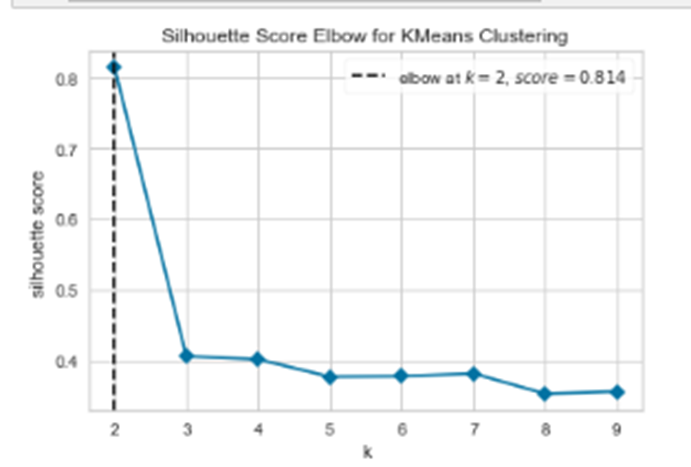

# Silhouette Score actually improves even more with RobustScaler

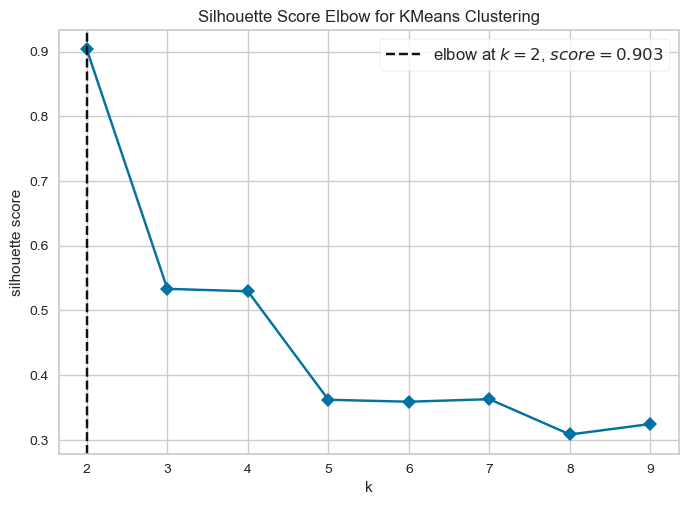

In [31]:
#with Standard Scaler
#Silhouette Coefficient
#Is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors: How close the data point is to other points in the cluster and how far away the data point is from points in other clusters. Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters
model = KMeans(random_state=42) 

visualizer = KElbowVisualizer(model, k=(2, 10), metric='silhouette', timings=False)
visualizer.fit(Xspend_scaledRS )    
visualizer.poof()
plt.show();


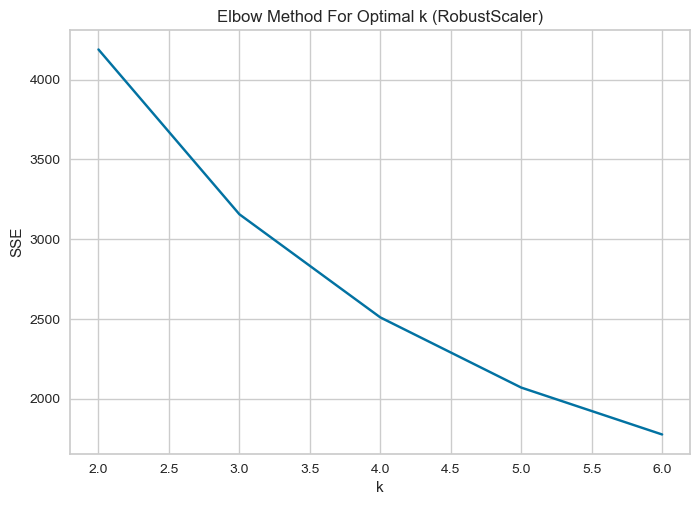

In [32]:
#what about the elbow method with RobustScaler
# Create an empty list for sum of squared distances to be appended for k values 2 to 7
Sum_of_squared_distancesRS = [] 

# Values for K (centroids) 
K = range(2, 7)

for k in K:
    km = KMeans(n_clusters =k)
    kmRS = km.fit(Xspend_scaledRS )
    
    # model.inertia_: Sum of squared distances of samples to their closest cluster center, 
    # weighted by the sample weights if provided 
    # (from documentation - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
    Sum_of_squared_distancesRS.append(kmRS.inertia_)
    
plt.plot(K, Sum_of_squared_distancesRS, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k (RobustScaler)')
plt.show()


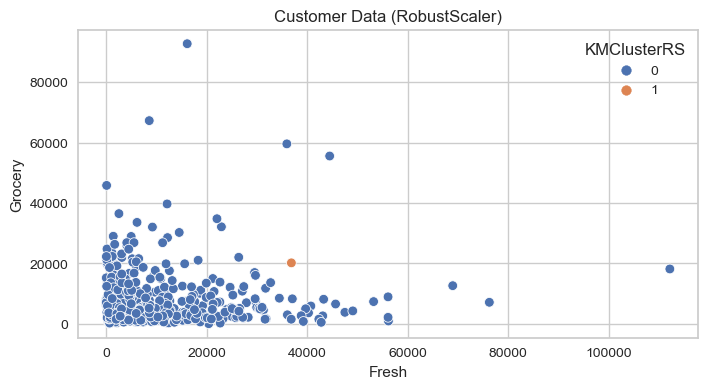

In [33]:

# Instantiate a KMeans object with a n_clusters = 2
# Store it in a variable named "km" 
# Fit the km model on the X_scaled data 
# Use the predict() function or the labels_ parameter to get the assinged clusters 
# Save the results in a new variable "cluster_assignment"

km = KMeans(n_clusters = 2,random_state=42)
cluster_assignment = km.fit_predict(Xspend_scaledRS)
cluster_assignment


spending_input_data["KMClusterRS"] = cluster_assignment
spending_input_data.head(10)
km.cluster_centers_
# Visualize the clusters 
plt.figure(figsize=(8,4))

sns.scatterplot(x='Fresh', 
                y='Grocery', 
                data=spending_input_data, 
                hue= "KMClusterRS",
                palette="deep"
               ).set_title('Customer Data (RobustScaler)')

plt.show()

Considering Silhouette Score as a standard way to evauate clustering, it appears that the StandrardScaler when used in KMeans lustering considering 2 clusters, works better than MinMaxScaler. StandardScaler yields a higher silhouette coefficient of 0.614 vs 0.571

In [34]:
spending_input_data=spending_input_data.drop('KMCluster',axis=1)
spending_input_data.head(10)

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen  KMClusterRS
0  12669   9656     7561     214              2674          1338            0
1   7057   9810     9568    1762              3293          1776            0
2   6353   8808     7684    2405              3516          7844            0
3  13265   1196     4221    6404               507          1788            0
4  22615   5410     7198    3915              1777          5185            0
5   9413   8259     5126     666              1795          1451            0
6  12126   3199     6975     480              3140           545            0
7   7579   4956     9426    1669              3321          2566            0
8   5963   3648     6192     425              1716           750            0
9   6006  11093    18881    1159              7425          2098            0

# Understanding Characteristics of the Clusters Obtained

In [35]:
KMCluster0 = spending_input_data[spending_input_data["KMClusterRS"]==0]
KMCluster1 = spending_input_data[spending_input_data["KMClusterRS"]==1]

In [44]:
KMCluster0.head()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen  KMClusterRS
0  12669  9656     7561     214              2674          1338            0
1   7057  9810     9568    1762              3293          1776            0
2   6353  8808     7684    2405              3516          7844            0
3  13265  1196     4221    6404               507          1788            0
4  22615  5410     7198    3915              1777          5185            0

In [36]:
KMCluster0.describe()

Fresh          Milk       Grocery        Frozen  \
count     439.000000    439.000000    439.000000    439.000000   
mean    11943.699317   5709.355353   7923.444191   2995.708428   
std     12605.848487   7159.834095   9496.033572   4589.054613   
min         3.000000     55.000000      3.000000     25.000000   
25%      3119.500000   1532.000000   2151.000000    740.500000   
50%      8475.000000   3620.000000   4754.000000   1517.000000   
75%     16878.000000   7168.000000  10582.000000   3538.000000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  KMClusterRS  
count        439.000000    439.000000        439.0  
mean        2887.512528   1419.134396          0.0  
std         4771.620046   1743.752764          0.0  
min            3.000000      3.000000          0.0  
25%          260.000000    407.500000          0.0  
50%          820.000000    964.000000          0.0  
75%         3935.000000   1803.500000          0.0  
max        40827.000000  16523.000000          0.0

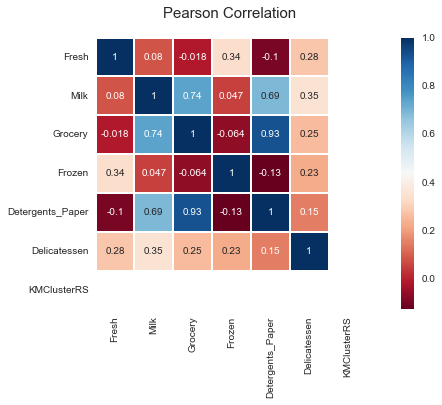

In [159]:
plt.figure(figsize=(12,5))
plt.title('Pearson Correlation ', y=1.05, size=15)
sns.heatmap(KMCluster0.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)
plt.show();

array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'KMClusterRS'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

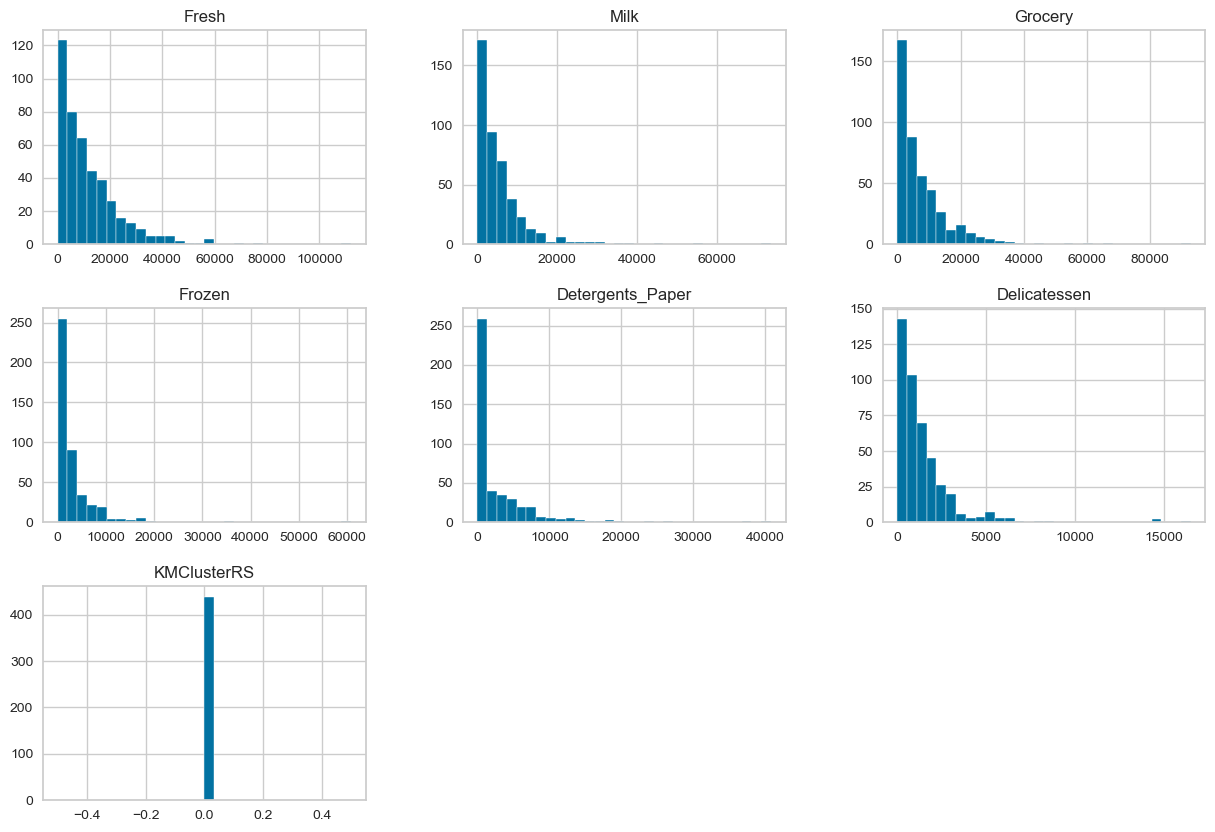

In [37]:
KMCluster0.hist(bins=30, figsize=(15, 10))

array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'KMClusterRS'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

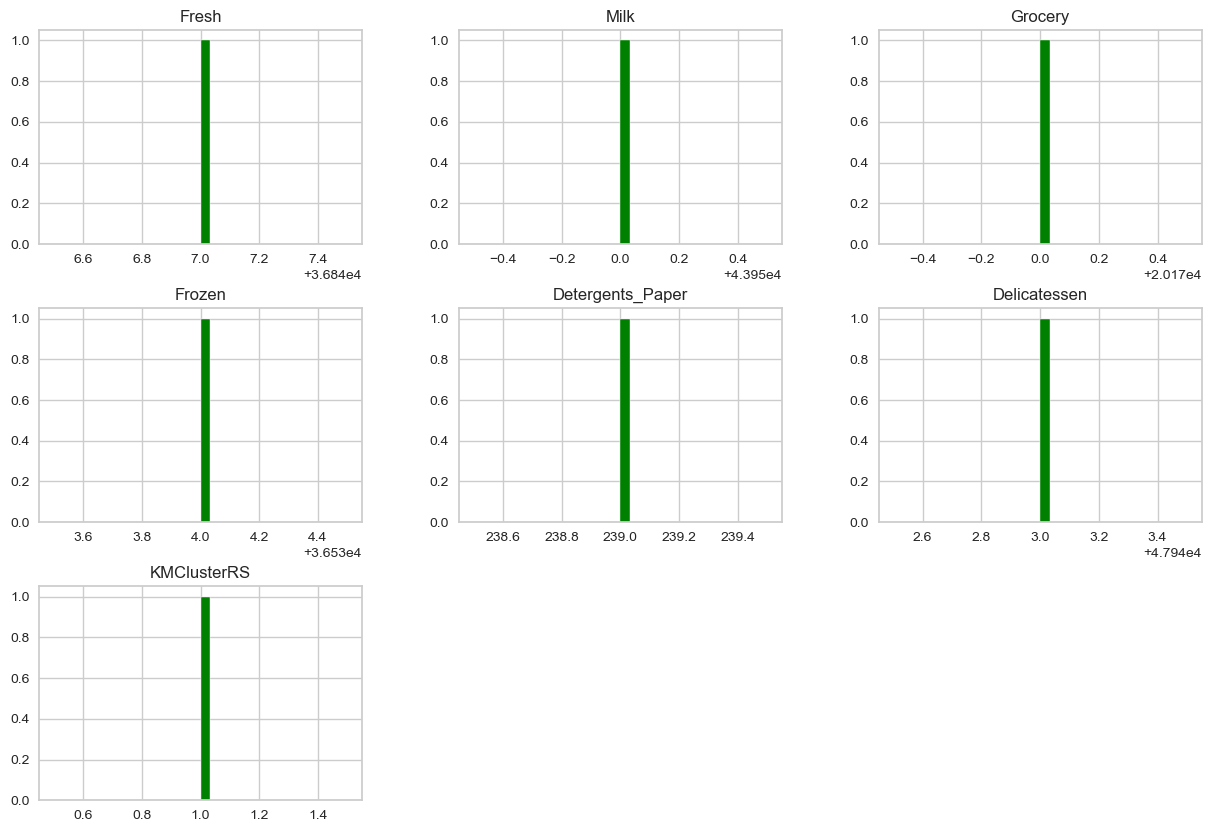

In [38]:
KMCluster1.hist(bins=30, figsize=(15, 10), color='green')

# Very Questionable that this 'cluster' is just one errant sample. Let's follow the Elbow Method with Robust Scaler for 3 clusters

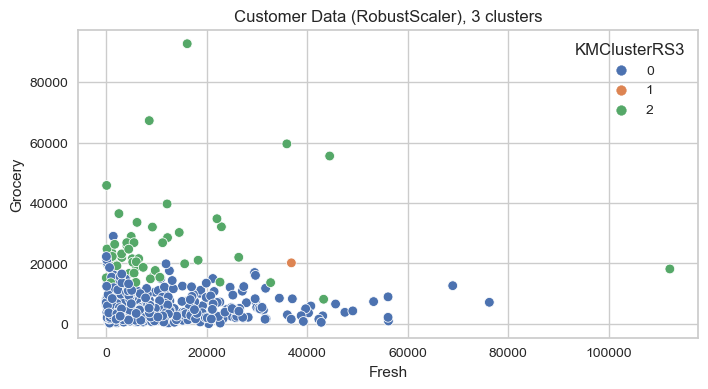

In [39]:

km3 = KMeans(n_clusters = 3,random_state=42)
cluster_assignmentRS3 = km3.fit_predict(Xspend_scaledRS)
cluster_assignmentRS3


spending_input_data3=spending_input_data.drop('KMClusterRS',axis=1)
spending_input_data3["KMClusterRS3"] = cluster_assignmentRS3
spending_input_data3.head(10)
km3.cluster_centers_
# Visualize the clusters 
plt.figure(figsize=(8,4))

sns.scatterplot(x='Fresh', 
                y='Grocery', 
                data=spending_input_data3, 
                hue= "KMClusterRS3",
                palette="deep"
               ).set_title('Customer Data (RobustScaler), 3 clusters')

plt.show()

# Understanding these 3 clusters

In [40]:
KM3Cluster0 = spending_input_data3[spending_input_data3["KMClusterRS3"]==0]
KM3Cluster1 = spending_input_data3[spending_input_data3["KMClusterRS3"]==1]
KM3Cluster2 = spending_input_data3[spending_input_data3["KMClusterRS3"]==2]

array([[<AxesSubplot:title={'center':'Fresh'}>,
        <AxesSubplot:title={'center':'Milk'}>,
        <AxesSubplot:title={'center':'Grocery'}>],
       [<AxesSubplot:title={'center':'Frozen'}>,
        <AxesSubplot:title={'center':'Detergents_Paper'}>,
        <AxesSubplot:title={'center':'Delicatessen'}>],
       [<AxesSubplot:title={'center':'KMCluster'}>,
        <AxesSubplot:title={'center':'KMClusterRS3'}>, <AxesSubplot:>]],
      dtype=object)

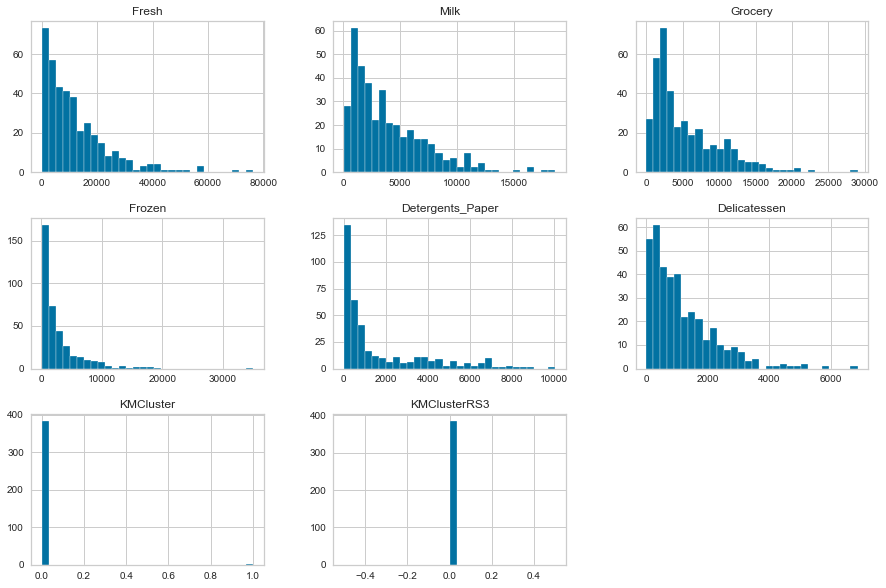

In [190]:
KM3Cluster0.hist(bins=30, figsize=(15, 10))

array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'KMClusterRS3'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

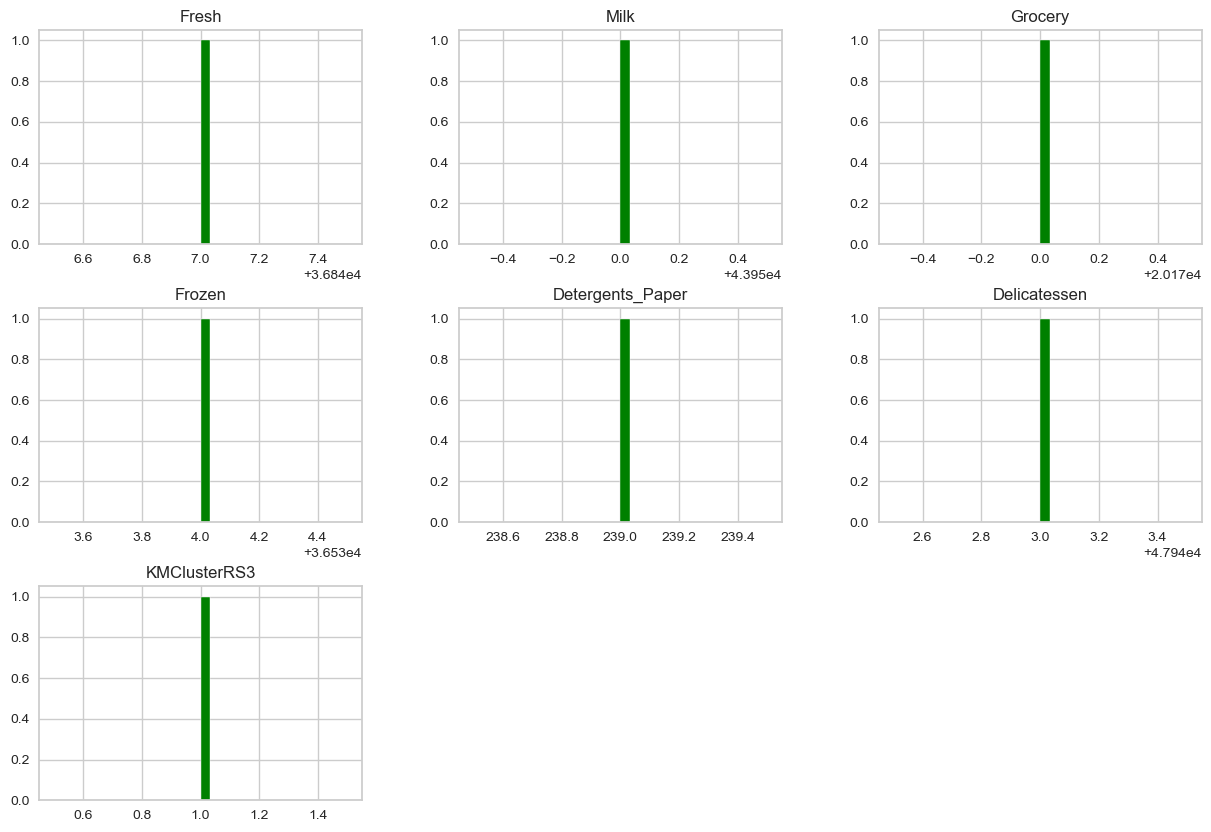

In [41]:
KM3Cluster1.hist(bins=30, figsize=(15, 10),color='green')

array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'KMClusterRS3'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

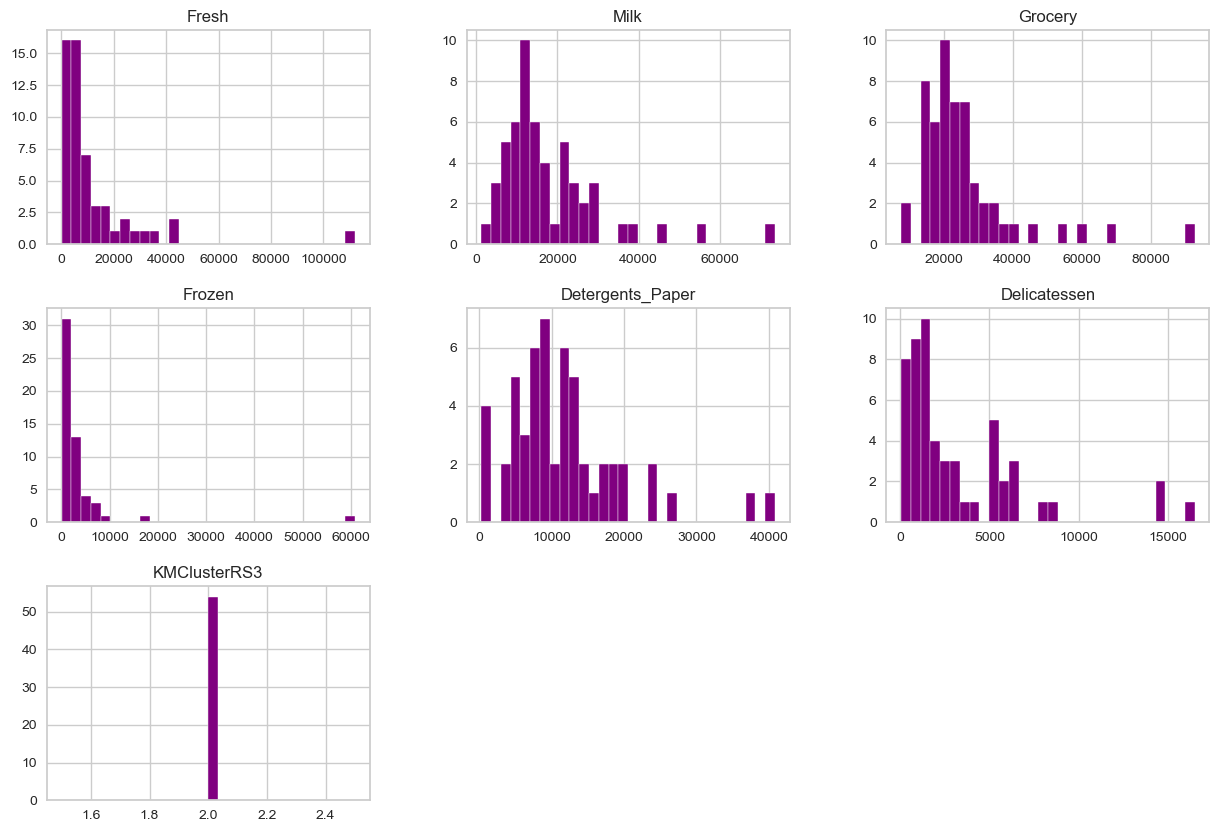

In [42]:
KM3Cluster2.hist(bins=30, figsize=(15, 10),color='purple')

We see distinct patterns in spending between the 2 clusters: 0 & 2 for ex. Cluster 2 has distinctly higher spending in the Mik and Detergents_Paper categories. The errant oulier remain separate in 1

# Let us explore HCA and DBScan


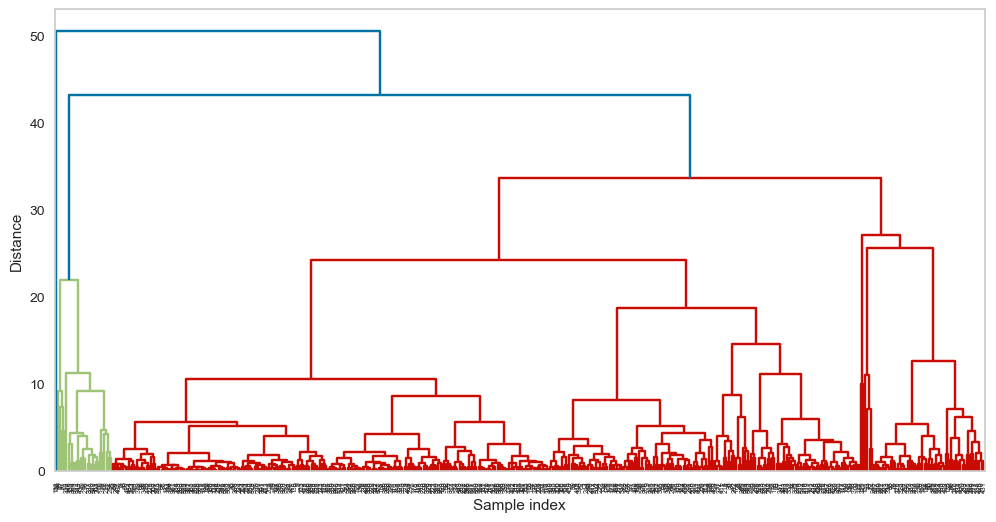

In [43]:
#Apply hierarchical clustering 
Z = linkage(Xspend_scaledRS, method='ward', metric='euclidean')

# Draw the dendrogram
plt.figure(figsize=(12,6))
dendrogram(Z)
plt.ylabel('Distance')
plt.xlabel('Sample index')
plt.grid(False)
plt.show()

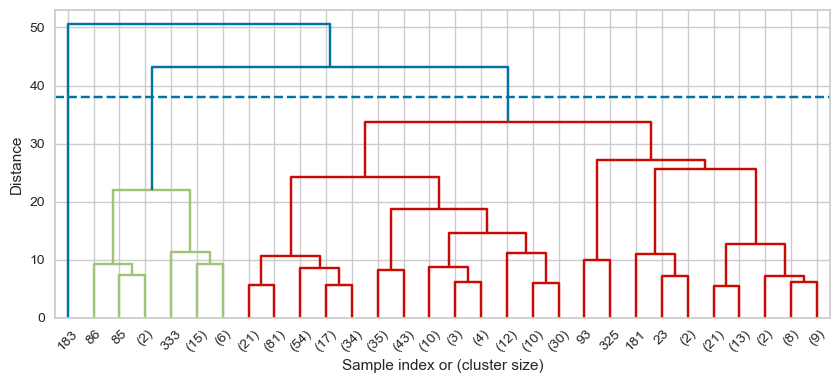

In [44]:
# Draw the dendrogram using a cut_off value

plt.figure(figsize=(10,4))
cut_off = 38

dendrogram(Z, color_threshold=cut_off,
           truncate_mode='lastp', 
           # show only the last p merged clusters
           # p=30
          )

plt.ylabel('Distance')
plt.xlabel('Sample index or (cluster size)')
plt.hlines(cut_off, 0, len(Xspend_scaledRS), linestyle='--')
plt.show()


In [45]:
# Perform clustering with AgglomerativeClustering - try different distance and linkage algorithms 

hca_clusters = 2

agglomerative = AgglomerativeClustering(n_clusters=hca_clusters, 
                                        linkage = 'ward', # merges two clusters if the resulting has small variance
                                        affinity= 'euclidean')

cluster_assignmenthca = agglomerative.fit_predict(Xspend_scaledRS)
cluster_assignmenthca

spending_input_dataHC=spending_input_data.drop('KMClusterRS',axis=1)
#input_data1 = input_data.drop('Channel', axis=1)
spending_input_dataHC["HCACluster"] = cluster_assignmenthca
spending_input_dataHC.head(10)



Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen  HCACluster
0  12669   9656     7561     214              2674          1338           0
1   7057   9810     9568    1762              3293          1776           0
2   6353   8808     7684    2405              3516          7844           0
3  13265   1196     4221    6404               507          1788           0
4  22615   5410     7198    3915              1777          5185           0
5   9413   8259     5126     666              1795          1451           0
6  12126   3199     6975     480              3140           545           0
7   7579   4956     9426    1669              3321          2566           0
8   5963   3648     6192     425              1716           750           0
9   6006  11093    18881    1159              7425          2098           0

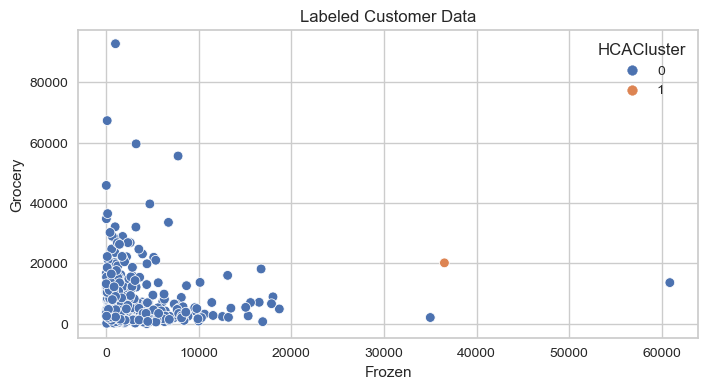

In [46]:
plt.figure(figsize=(8,4))

sns.scatterplot(x='Frozen', 
                y='Grocery', 
                data=spending_input_dataHC, 
                hue= "HCACluster",
                palette="deep"
               ).set_title('Labeled Customer Data')
plt.show()

Let us examine both clusters

In [47]:
HCACluster0 = spending_input_dataHC[spending_input_dataHC["HCACluster"]==0]
HCACluster1 = spending_input_dataHC[spending_input_dataHC["HCACluster"]==1]


array([[<AxesSubplot:title={'center':'Fresh'}>,
        <AxesSubplot:title={'center':'Milk'}>,
        <AxesSubplot:title={'center':'Grocery'}>],
       [<AxesSubplot:title={'center':'Frozen'}>,
        <AxesSubplot:title={'center':'Detergents_Paper'}>,
        <AxesSubplot:title={'center':'Delicatessen'}>],
       [<AxesSubplot:title={'center':'HCACluster'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

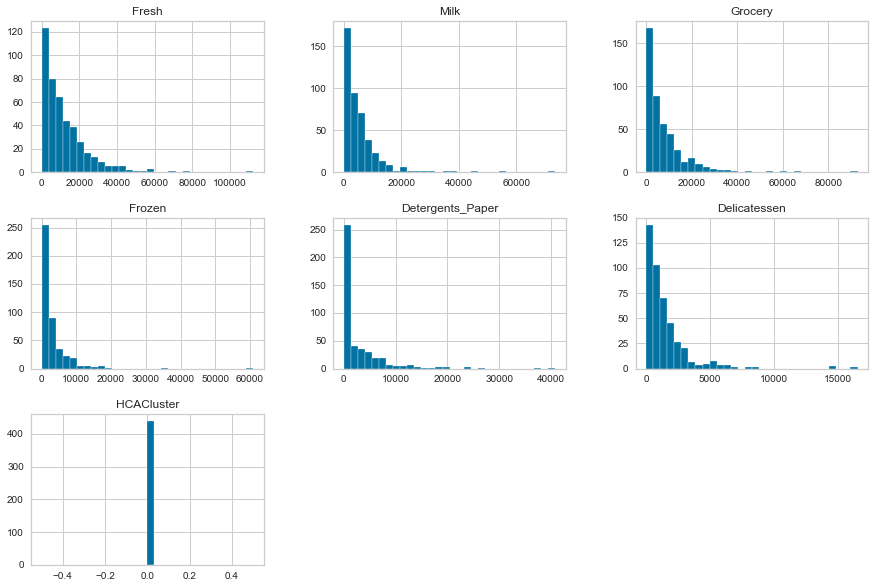

In [194]:
HCACluster0.hist(bins=30, figsize=(15, 10))

array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'HCACluster'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

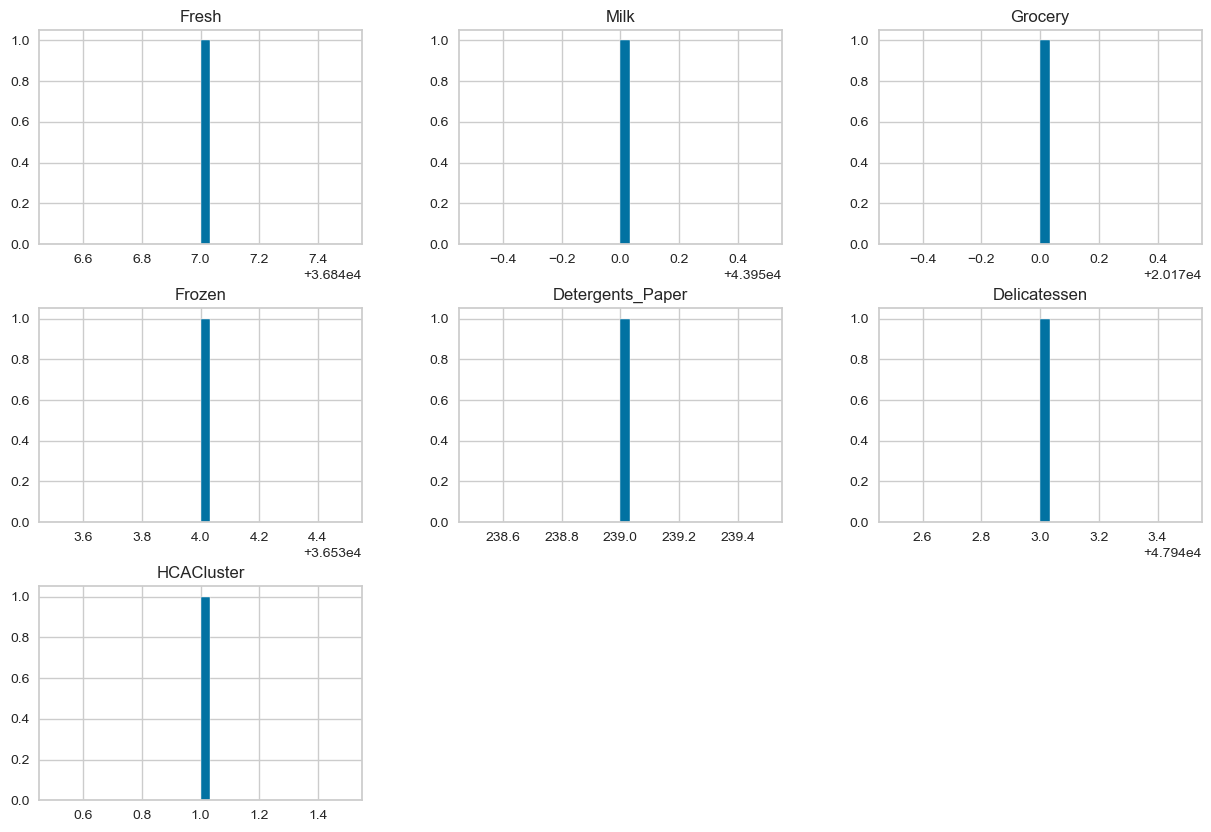

In [48]:
HCACluster1.hist(bins=30, figsize=(15, 10))

# Once again it is advisable to consider 3 clusters but observing the similar profiles obtained with KMeans, it appears that the clustering performance is similar. Hence, we do not investigate deeper with HCA but explore with DBScan

In [49]:
# Apply DBSCAN
db = DBSCAN(eps=1.28, min_samples=3)
db.fit(Xspend_scaledRS)
cluster_assignmentdb = db.fit_predict(Xspend_scaledRS) # alternatively, db.labels_
cluster_assignmentdb

print ('Number of clusters found', len(np.unique(cluster_assignmentdb)))
print ('Clusters found', np.unique(cluster_assignmentdb))



Number of clusters found 2
Clusters found [-1  0]


In [50]:
eps  = np.linspace(.3, 2.0, 20)
#mins = np.arange(1, 50, 3)
mins = np.arange(3, 50, 2)
Z = np.zeros((len(eps), len(mins)))


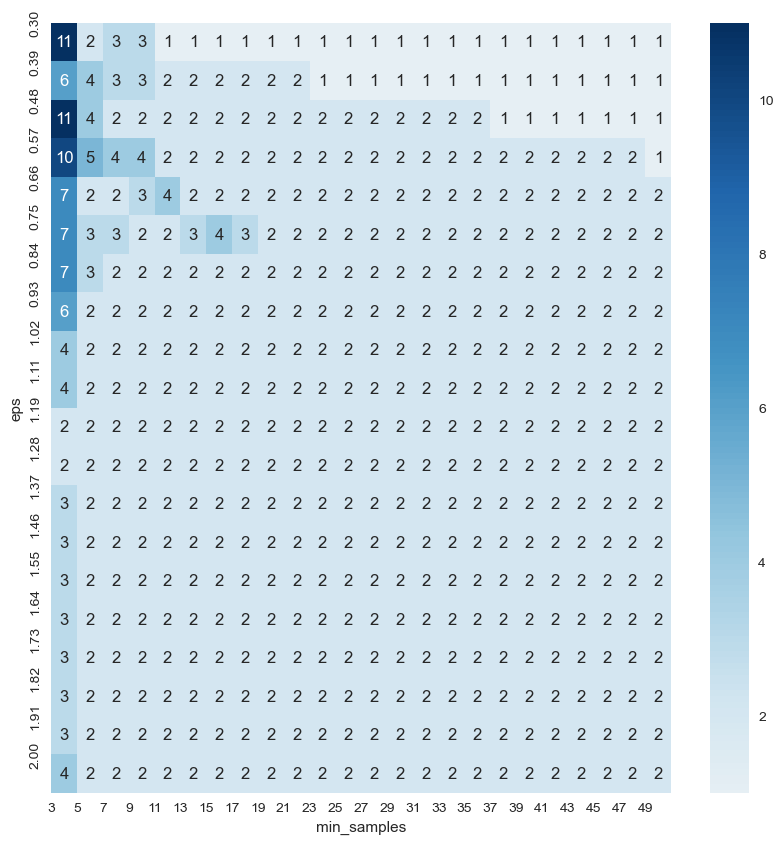

In [51]:
for i, e in enumerate(eps):
    for j, m in enumerate(mins):
        db = DBSCAN(eps=e, min_samples=m)
        clusters_founddb = len(np.unique(db.fit_predict(Xspend_scaledRS)))
        Z[i,j] = clusters_founddb
plt.figure(figsize=(10, 10))
sns.heatmap(Z, cmap='RdBu', center=0, annot=True);
plt.xticks(np.arange(Z.shape[1]), mins)
plt.xlabel('min_samples')
plt.yticks(np.arange(Z.shape[0]), ['%0.2f' % x for x in eps])
plt.ylabel('eps')
plt.show()

Looking at all cobinations of min-samples and eps, 2 clusters are the most dominant. DBScan indeed identifies 2 clusters. This could signify that the data has two distinct clusters, or it could mean that the algorithm is finding noise points as a separate cluster, resulting in a split of the data into two clusters. 

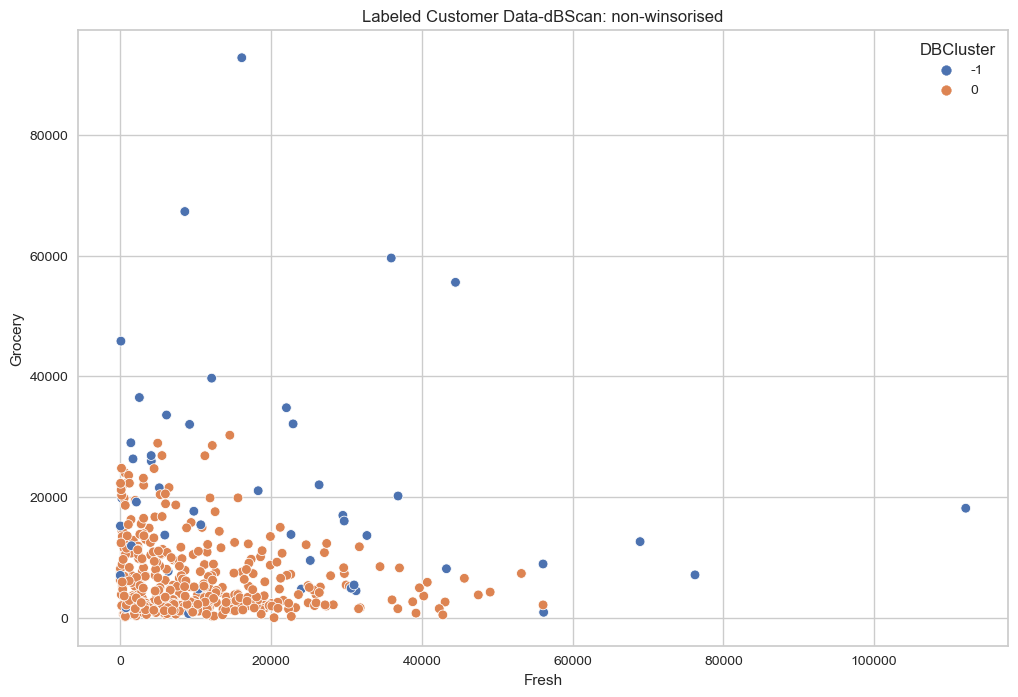

In [52]:

spending_input_dataDB=spending_input_data.drop('KMClusterRS',axis=1)

spending_input_dataDB['DBCluster'] = cluster_assignmentdb
plt.figure(figsize=(12,8))

sns.scatterplot(x='Fresh', 
                y='Grocery', 
                data=spending_input_dataDB, 
                hue= "DBCluster",
                palette="deep"
               ).set_title('Labeled Customer Data-dBScan: non-winsorised')
plt.show()





In [53]:
DBCluster0 = spending_input_dataDB[spending_input_dataDB["DBCluster"]==0]
DBCluster1 = spending_input_dataDB[spending_input_dataDB["DBCluster"]!=0]

array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'DBCluster'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

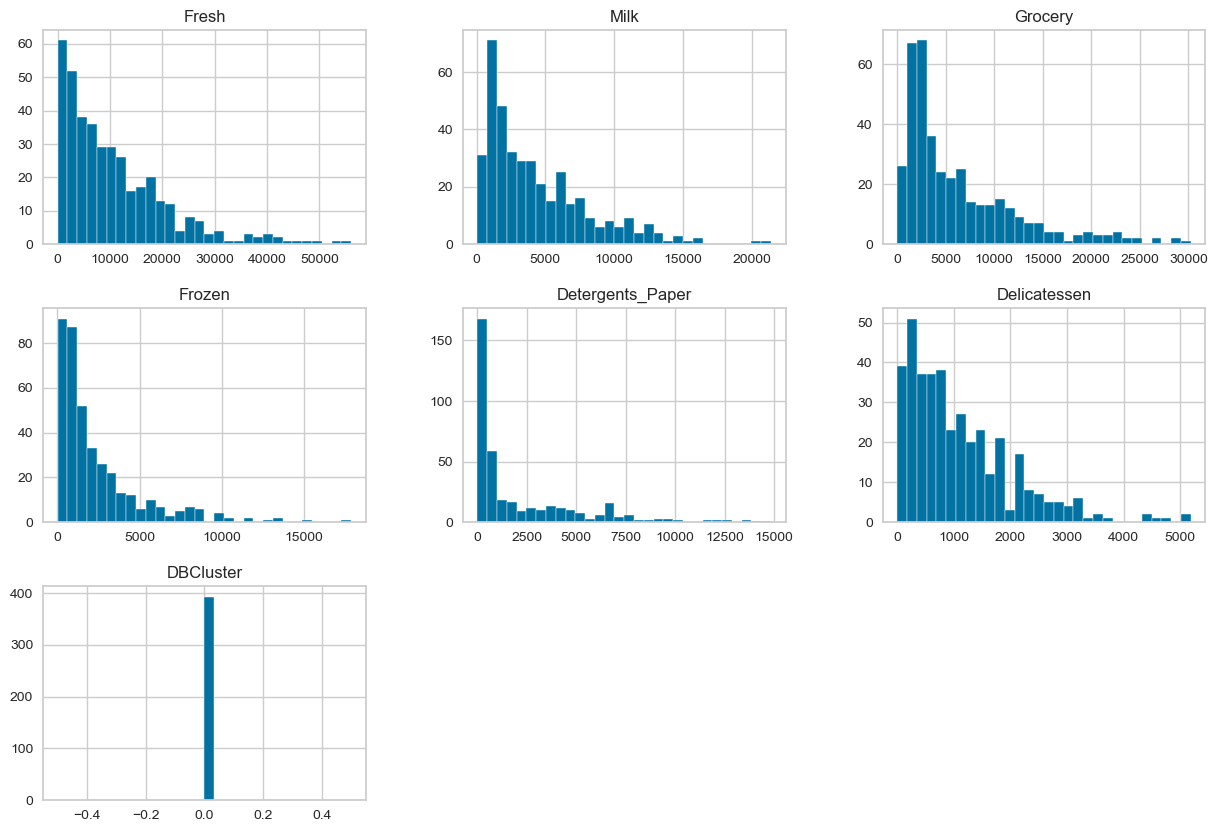

In [54]:
DBCluster0 .hist(bins=30, figsize=(15, 10))

array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'DBCluster'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

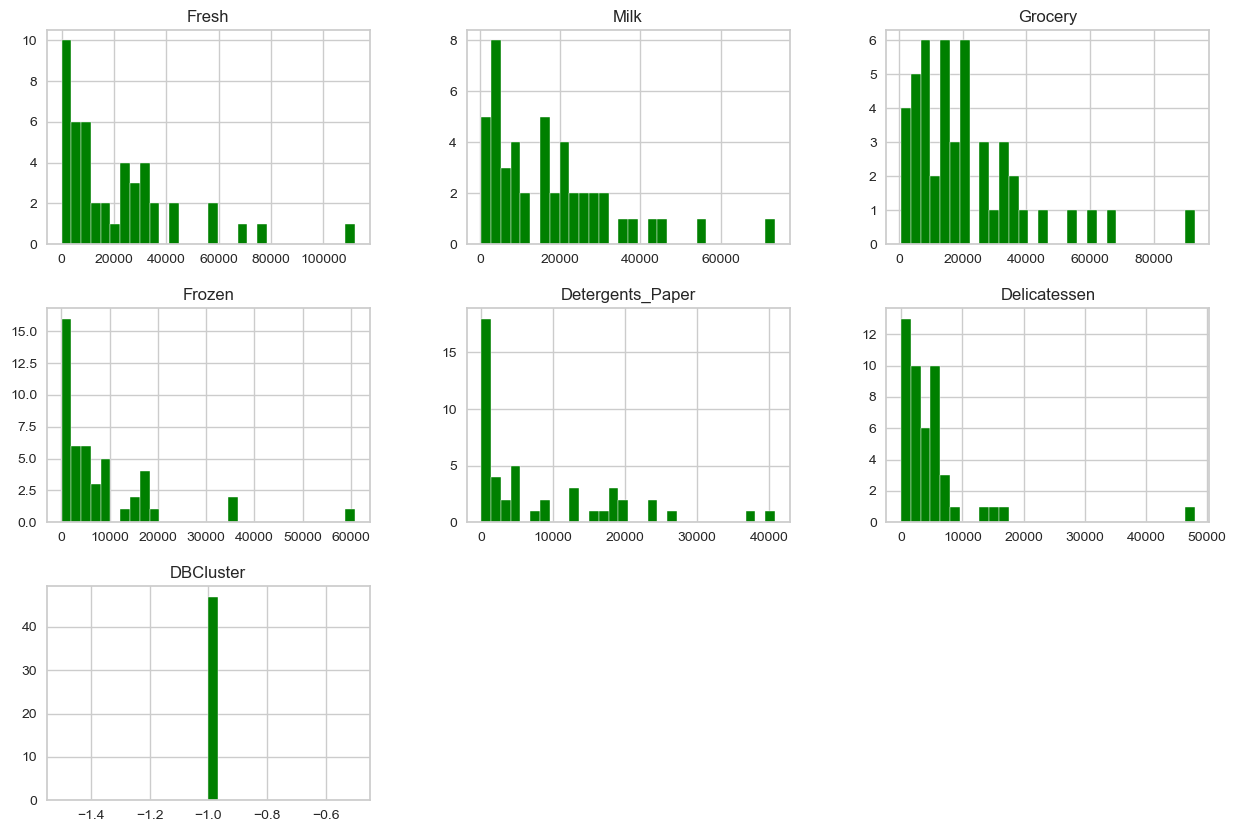

In [55]:
DBCluster1 .hist(bins=30, figsize=(15, 10),color='green')

We find that DBScan clustering is distinct from KMeans and HCA in this dataset.

# Splitting into Horeca and Retail 

In [56]:
retail_data = input_data[input_data["Channel"] == 2]
horeca_data = input_data[input_data["Channel"] == 1]

In [57]:
retail_data.head()
retail_data.describe()

Channel      Region         Fresh          Milk       Grocery  \
count    142.0  142.000000    142.000000    142.000000    142.000000   
mean       2.0    2.612676   8904.323944  10716.500000  16322.852113   
std        0.0    0.703069   8987.714750   9679.631351  12267.318094   
min        2.0    1.000000     18.000000    928.000000   2743.000000   
25%        2.0    2.000000   2347.750000   5938.000000   9245.250000   
50%        2.0    3.000000   5993.500000   7812.000000  12390.000000   
75%        2.0    3.000000  12229.750000  12162.750000  20183.500000   
max        2.0    3.000000  44466.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper  Delicatessen  Customer_ID  
count    142.000000        142.000000    142.000000   142.000000  
mean    1652.612676       7269.507042   1753.436620   182.000000  
std     1812.803662       6291.089697   1953.797047   132.136132  
min       33.000000        332.000000      3.000000     0.000000  
25%      534.250000       3683.500000    566.750000    60.250000  
50%     1081.000000       5614.500000   1350.000000   165.500000  
75%     2146.750000       8662.500000   2156.000000   302.750000  
max    11559.000000      40827.000000  16523.000000   437.000000

In [58]:
retail_datanew = retail_data.drop('Channel', axis=1)
retail_datanew.head()

Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen  \
0       3  12669  9656     7561     214              2674          1338   
1       3   7057  9810     9568    1762              3293          1776   
2       3   6353  8808     7684    2405              3516          7844   
4       3  22615  5410     7198    3915              1777          5185   
5       3   9413  8259     5126     666              1795          1451   

   Customer_ID  
0            0  
1            1  
2            2  
4            4  
5            5

In [59]:
def winsorize_dataframe(retail_datanew, alpha=0.05):
    """
    Winsorize a pandas dataframe by replacing values outside of the alpha/2 and 1-alpha/2 quantiles
    with the nearest value at the alpha/2 and 1-alpha/2 quantiles, respectively.
    
    Args:
    - df (pandas dataframe): the dataframe to be winsorized
    - alpha (float, default=0.05): the percentage of values to be replaced on each tail
    
    Returns:
    - winsorized_df (pandas dataframe): the winsorized dataframe
    """
    # Compute the quantiles for each column
    q_low = retail_datanew.quantile(alpha/2)
    q_high = retail_datanew.quantile(1-alpha/2)
    
    # Apply the Winsorization function to each column
    winsorized_retail_datanew = retail_datanew.apply(lambda x: np.where(x < q_low[x.name], q_low[x.name], np.where(x > q_high[x.name], q_high[x.name], x)))
    
    return winsorized_retail_datanew
winsorized_retail_datanew=winsorize_dataframe(retail_datanew, alpha=0.05)
winsorized_retail_datanew                                                                                                                                

Region    Fresh     Milk    Grocery  Frozen  Detergents_Paper  \
0       3.0  12669.0   9656.0   7561.000   214.0            2674.0   
1       3.0   7057.0   9810.0   9568.000  1762.0            3293.0   
2       3.0   6353.0   8808.0   7684.000  2405.0            3516.0   
4       3.0  22615.0   5410.0   7198.000  3915.0            1777.0   
5       3.0   9413.0   8259.0   5126.000   666.0            1795.0   
..      ...      ...      ...        ...     ...               ...   
418     3.0    660.0   8494.0  18622.000   133.0            6740.0   
421     3.0  17063.0   4847.0   9053.000  1031.0            3415.0   
423     3.0  17565.0   3686.0   4739.425  1059.0            1803.0   
424     3.0  16980.0   2884.0  12232.000   874.0            3213.0   
437     3.0  14531.0  15488.0  30243.000   437.0           14841.0   

     Delicatessen  Customer_ID  
0         1338.00        4.525  
1         1776.00        4.525  
2         6307.95        4.525  
4         5185.00        4.525  
5         1451.00        5.000  
..            ...          ...  
418        776.00      418.000  
421       1784.00      419.425  
423        668.00      419.425  
424        249.00      419.425  
437       1867.00      419.425  

[142 rows x 8 columns]

In [69]:
retail_datanew1 = retail_datanew.drop(['Customer_ID', 'Region'], axis=1)
retail_datanew1.head()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
4  22615  5410     7198    3915              1777          5185
5   9413  8259     5126     666              1795          1451

In [60]:
#Keep Horeca winsorised handy
horeca_data1=horeca_data.drop (['Channel','Customer_ID'], axis=1)
#retail_datanew = retail_data.drop('Channel', axis=1)
horeca_data1.head()

Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
3        3  13265  1196     4221    6404               507          1788
8        3   5963  3648     6192     425              1716           750
15       3  10253  1114     3821     397               964           412
17       3   5876  6157     2933     839               370          4478
19       3   7780  2495     9464     669              2518           501

In [70]:
horeca_data2=horeca_data1.drop ('Region', axis=1)
#retail_datanew = retail_data.drop('Channel', axis=1)
horeca_data2.head()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
3   13265  1196     4221    6404               507          1788
8    5963  3648     6192     425              1716           750
15  10253  1114     3821     397               964           412
17   5876  6157     2933     839               370          4478
19   7780  2495     9464     669              2518           501

In [71]:
def winsorize_dataframeh(horeca_data1, alpha=0.05):
    """
    Winsorize a pandas dataframe by replacing values outside of the alpha/2 and 1-alpha/2 quantiles
    with the nearest value at the alpha/2 and 1-alpha/2 quantiles, respectively.
    
    Args:
    - df (pandas dataframe): the dataframe to be winsorized
    - alpha (float, default=0.05): the percentage of values to be replaced on each tail
    
    Returns:
    - winsorized_df (pandas dataframe): the winsorized dataframe
    """
    # Compute the quantiles for each column
    q_low = horeca_data1.quantile(alpha/2)
    q_high = horeca_data1.quantile(1-alpha/2)
    
    # Apply the Winsorization function to each column
    winsorized_horeca_data1= horeca_data1.apply(lambda x: np.where(x < q_low[x.name], q_low[x.name], np.where(x > q_high[x.name], q_high[x.name], x)))
    
    return winsorized_horeca_data1
winsorized_horeca_data1=winsorize_dataframeh(horeca_data1, alpha=0.05)
winsorized_horeca_data1      

Region    Fresh     Milk  Grocery     Frozen  Detergents_Paper  \
3       3.0  13265.0   1196.0   4221.0   6404.000             507.0   
8       3.0   5963.0   3648.0   6192.0    425.000            1716.0   
15      3.0  10253.0   1114.0   3821.0    397.000             964.0   
17      3.0   5876.0   6157.0   2933.0    839.000             370.0   
19      3.0   7780.0   2495.0   9464.0    669.000            2518.0   
..      ...      ...      ...      ...        ...               ...   
434     3.0  16731.0   3922.0   7994.0    688.000            2371.0   
435     3.0  29703.0  12051.0  14939.3  13135.000             182.0   
436     3.0  39228.0   1431.0    764.0   4510.000              93.0   
438     3.0  10290.0   1981.0   2232.0   1038.000             168.0   
439     3.0   2787.0   1698.0   2510.0    121.825             477.0   

     Delicatessen  
3          1788.0  
8           750.0  
15          412.0  
17         4478.0  
19          501.0  
..            ...  
434         838.0  
435        2204.0  
436        2346.0  
438        2125.0  
439          52.0  

[298 rows x 7 columns]

<AxesSubplot: xlabel='Region', ylabel='Detergents_Paper'>

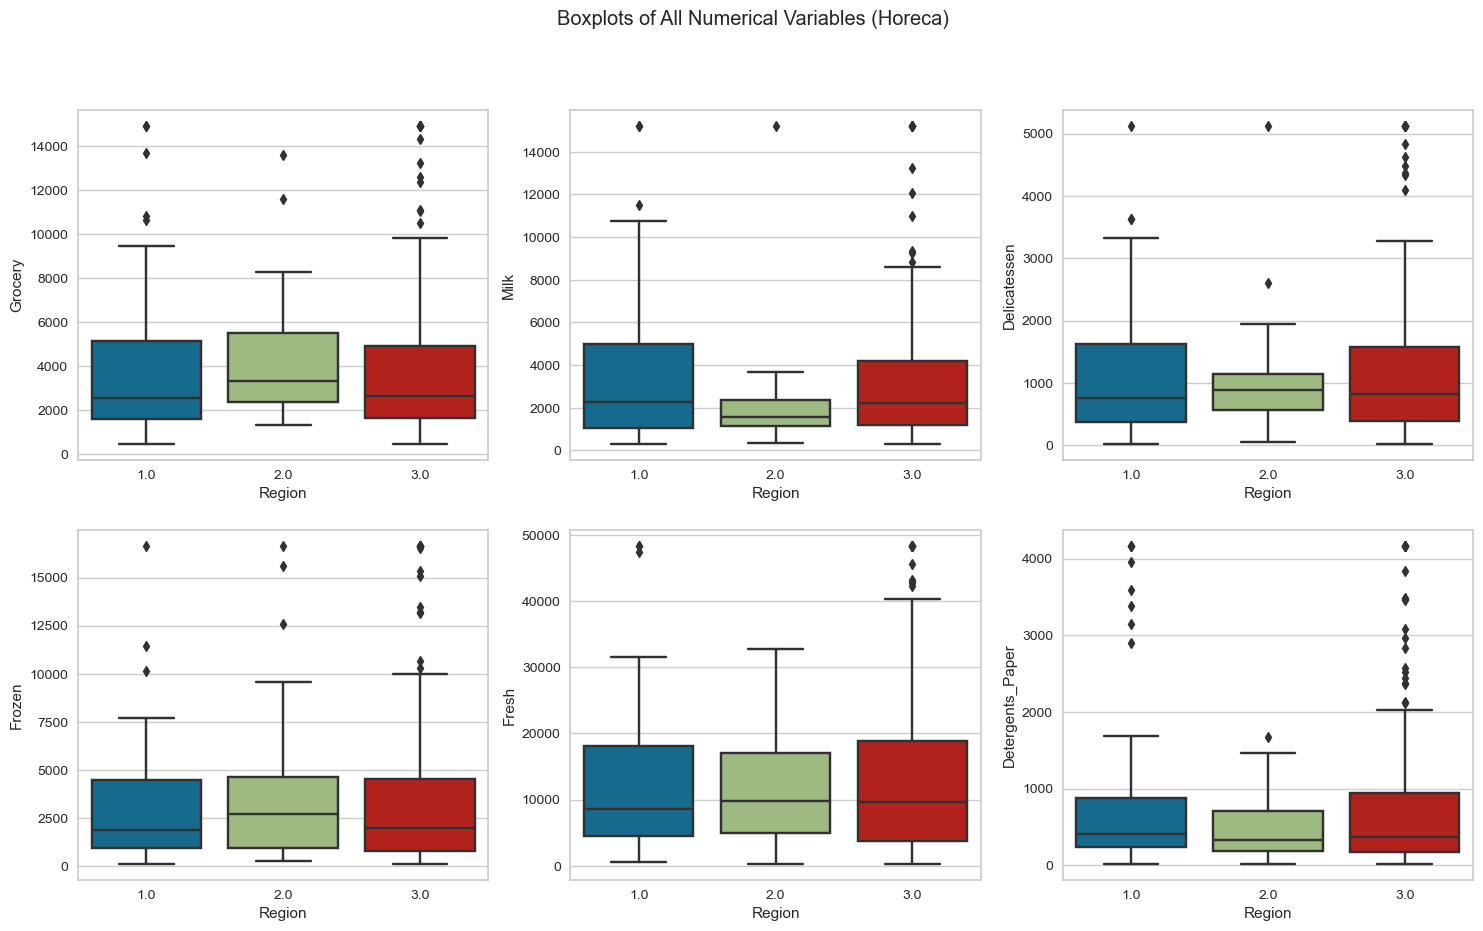

In [72]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
 
fig.suptitle('Boxplots of All Numerical Variables (Horeca)')
 
#wholesale_data = sns.load_dataset("input_data")
 
sns.boxplot(ax=axes[0, 0], data=winsorized_horeca_data1  , x='Region', y='Grocery')
sns.boxplot(ax=axes[0, 1], data=winsorized_horeca_data1  , x='Region', y='Milk')
sns.boxplot(ax=axes[0, 2], data=winsorized_horeca_data1  , x='Region', y='Delicatessen')
sns.boxplot(ax=axes[1, 0], data=winsorized_horeca_data1  , x='Region', y='Frozen')
sns.boxplot(ax=axes[1, 1], data=winsorized_horeca_data1  , x='Region', y='Fresh')
sns.boxplot(ax=axes[1, 2], data=winsorized_horeca_data1  , x='Region', y='Detergents_Paper')

In [76]:
WHoreca=winsorized_horeca_data1.drop(['Region'], axis=1)

WHoreca.head()

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
3   13265.0  1196.0   4221.0  6404.0             507.0        1788.0
8    5963.0  3648.0   6192.0   425.0            1716.0         750.0
15  10253.0  1114.0   3821.0   397.0             964.0         412.0
17   5876.0  6157.0   2933.0   839.0             370.0        4478.0
19   7780.0  2495.0   9464.0   669.0            2518.0         501.0

In [64]:
# Apply a lambda function to count the number of outliers in each column
num_outliers = retail_datanew.apply(lambda x: ((x < x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25))) | (x > x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25)))).sum())

# Print the number of outliers in each column
print(num_outliers)

Region               0
Fresh                7
Milk                12
Grocery              6
Frozen               9
Detergents_Paper    11
Delicatessen        11
Customer_ID          0
dtype: int64


In [65]:
def count_outliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    return ((x < q1 - 1.5 * iqr) | (x > q3 + 1.5 * iqr)).sum()

# Apply the outlier detection function to each column of the dataframe
num_outliers = retail_datanew.apply(count_outliers)

# Print the number of outliers in each column
print(num_outliers)

Region               0
Fresh                7
Milk                12
Grocery              6
Frozen               9
Detergents_Paper    11
Delicatessen        11
Customer_ID          0
dtype: int64


<AxesSubplot: xlabel='Region', ylabel='Detergents_Paper'>

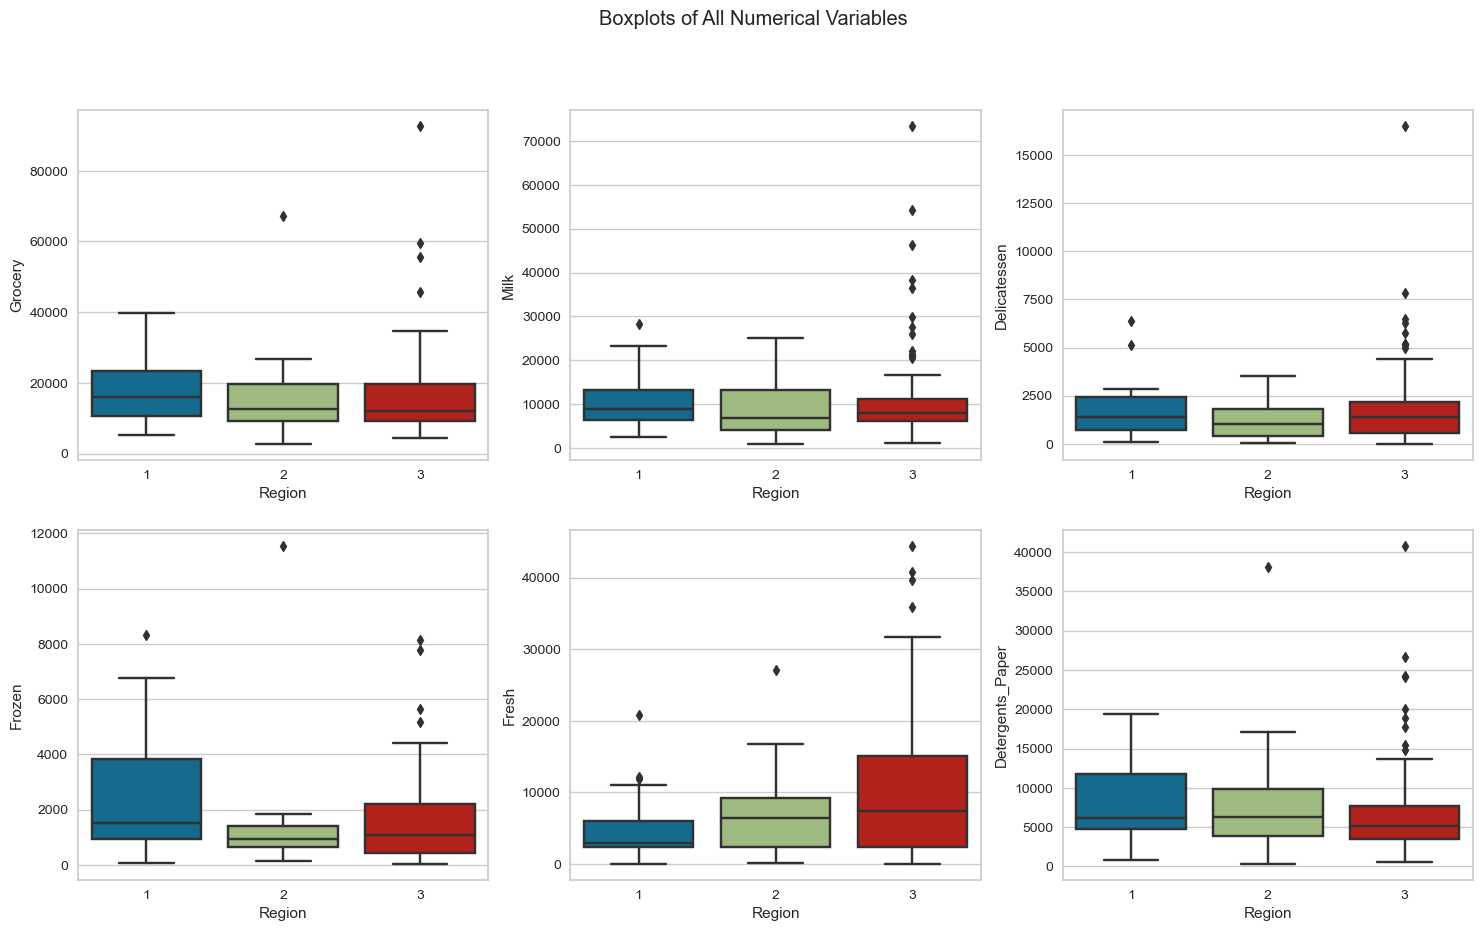

In [77]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
 
fig.suptitle('Boxplots of All Numerical Variables')
 
#wholesale_data = sns.load_dataset("input_data")
 
sns.boxplot(ax=axes[0, 0], data=retail_datanew, x='Region', y='Grocery')
sns.boxplot(ax=axes[0, 1], data=retail_datanew, x='Region', y='Milk')
sns.boxplot(ax=axes[0, 2], data=retail_datanew, x='Region', y='Delicatessen')
sns.boxplot(ax=axes[1, 0], data=retail_datanew, x='Region', y='Frozen')
sns.boxplot(ax=axes[1, 1], data=retail_datanew, x='Region', y='Fresh')
sns.boxplot(ax=axes[1, 2], data=retail_datanew, x='Region', y='Detergents_Paper')

In [78]:
WRetail= winsorized_retail_datanew.drop(['Customer_ID', 'Region'], axis=1)
WRetail.head()

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669.0  9656.0   7561.0   214.0            2674.0       1338.00
1   7057.0  9810.0   9568.0  1762.0            3293.0       1776.00
2   6353.0  8808.0   7684.0  2405.0            3516.0       6307.95
4  22615.0  5410.0   7198.0  3915.0            1777.0       5185.00
5   9413.0  8259.0   5126.0   666.0            1795.0       1451.00

For this set as well the MinMaxScaler appears the best Scaler as per score

In [71]:
# define your data and scaling/transforming steps
preprocessor = Pipeline(steps=[
    ('scaler',MinMaxScaler())
])

# define the parameter grid for the clustering algorithm
param_grid = {
   
    'reduce_dim__n_components': [2, 3, 4, 5],
    'cluster__n_clusters': [2, 3, 4, 5],
    'cluster__init': ['k-means++', 'random'],
    'cluster__max_iter': [100, 200]
}

# create the KMeans object
kmeans = KMeans()

# create the pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('reduce_dim', PCA()),
                       ('cluster', kmeans)])

# create the GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid=param_grid)
grid_search.fit(WRetail)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('scaler',
                                                         MinMaxScaler())])),
                                       ('reduce_dim', PCA()),
                                       ('cluster', KMeans())]),
             param_grid={'cluster__init': ['k-means++', 'random'],
                         'cluster__max_iter': [100, 200],
                         'cluster__n_clusters': [2, 3, 4, 5],
                         'reduce_dim__n_components': [2, 3, 4, 5]})

In [72]:
print(grid_search.best_params_)


{'cluster__init': 'random', 'cluster__max_iter': 200, 'cluster__n_clusters': 5, 'reduce_dim__n_components': 2}


In [73]:
print(grid_search.best_score_)

-1.3988375112788138


In [ ]:
Checking how various scalers work with non- winsorised data

In [79]:
#retail_datanew2 = retail_datanew.drop( ['Customer_ID'],axis=1)
retail_datanew1.head()


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
4  22615  5410     7198    3915              1777          5185
5   9413  8259     5126     666              1795          1451

In [101]:
# define your data and scaling/transforming steps
preprocessor = Pipeline(steps=[
    ('scaler',MinMaxScaler())
])

# define the parameter grid for the clustering algorithm
param_grid = {
   
    'reduce_dim__n_components': [2, 3, 4, 5],
    'cluster__n_clusters': [2, 3, 4, 5],
    'cluster__init': ['k-means++', 'random'],
    'cluster__max_iter': [100, 200]
}

# create the KMeans object
kmeans = KMeans()

# create the pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('reduce_dim', PCA()),
                       ('cluster', kmeans)])

# create the GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid=param_grid)
grid_search.fit(retail_datanew2)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('scaler',
                                                         MinMaxScaler())])),
                                       ('reduce_dim', PCA()),
                                       ('cluster', KMeans())]),
             param_grid={'cluster__init': ['k-means++', 'random'],
                         'cluster__max_iter': [100, 200],
                         'cluster__n_clusters': [2, 3, 4, 5],
                         'reduce_dim__n_components': [2, 3, 4, 5]})

In [102]:
print(grid_search.best_params_)

{'cluster__init': 'k-means++', 'cluster__max_iter': 100, 'cluster__n_clusters': 5, 'reduce_dim__n_components': 2}


In [103]:
print(grid_search.best_score_)

-0.9386765878864161


In [ ]:
Dropping the Region obtains a poorer score so Region is retained

In [ ]:
Again the non-winsorised data is modeled slightly better. 
This again could be since the outliers are from the Regional 3 group (other/mixed). 
It seems if we consider this region separately our understanding will impove substantially.
We will proceed to cluster considering the data as-is without adjusting for outliers. 
Also, we will proceed for KMeans clustering without PCA

In [80]:
#RobustScaler
scaler   = RobustScaler()
retail_datanew1_scaledRS = scaler.fit_transform(retail_datanew1)
scaled_retail_datanew1RS = pd.DataFrame(retail_datanew1_scaledRS, columns=retail_datanew1.columns)
scaled_retail_datanew1RS .head()

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  0.675521  0.296237 -0.441478 -0.537674         -0.590580     -0.007551
1  0.107620  0.320977 -0.257994  0.422326         -0.466258      0.268051
2  0.036379  0.160006 -0.430233  0.821085         -0.421470      4.086204
3  1.681998 -0.385879 -0.474665  1.757519         -0.770737      2.413088
4  0.346033  0.071810 -0.664092 -0.257364         -0.767122      0.063552

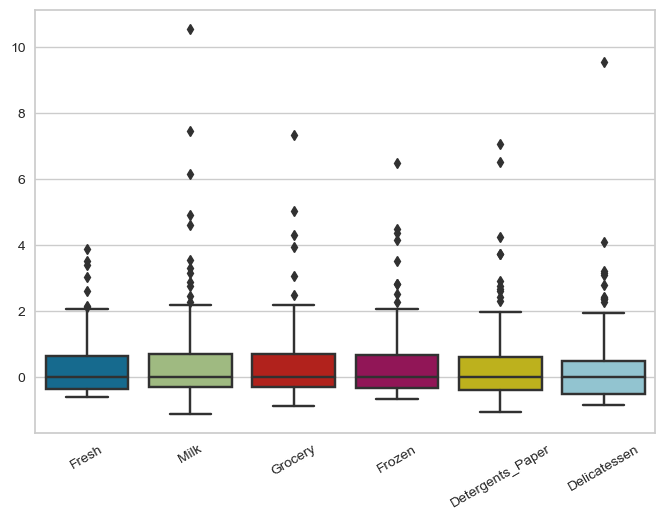

In [81]:
axretail_datanew1RS = sns.boxplot(data=scaled_retail_datanew1RS)
axretail_datanew1RS.set_xticklabels(axretail_datanew1RS.get_xticklabels(), rotation=30)
plt.show();

In [83]:
# Instantiate the MinMaxScaler and fit_transform the input_data. 
# Save the results in a new variable 

scaler   = MinMaxScaler()
retail_datanew1_scaledMM = scaler.fit_transform(retail_datanew1)
scaled_retail_datanew1MM = pd.DataFrame(retail_datanew1_scaledMM, columns=retail_datanew1.columns)
scaled_retail_datanew1MM .head()

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  0.284625  0.120270  0.053511  0.015704          0.057834      0.080811
1  0.158365  0.122392  0.075802  0.150009          0.073120      0.107324
2  0.142526  0.108585  0.054877  0.205796          0.078627      0.474637
3  0.508392  0.061761  0.049480  0.336804          0.035683      0.313680
4  0.211371  0.101020  0.026467  0.054919          0.036128      0.087651

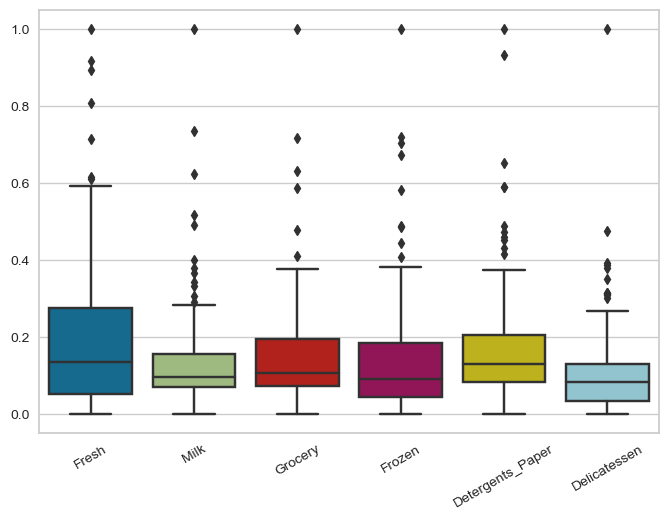

In [84]:
axretail_datanew1MM = sns.boxplot(data=scaled_retail_datanew1MM)
axretail_datanew1MM.set_xticklabels(axretail_datanew1MM.get_xticklabels(), rotation=30)
plt.show();

In [85]:
#Keeping the Sandard Scaled version handy
scaler   = StandardScaler()
retail_datanew1_scaledSS = scaler.fit_transform(retail_datanew1)
scaled_retail_datanew1SS = pd.DataFrame(retail_datanew1_scaledSS, columns=retail_datanew1.columns)
scaled_retail_datanew1SS .head()

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  0.420352 -0.109948 -0.716772 -0.796394         -0.733064     -0.213383
1 -0.206266 -0.093982 -0.552587  0.060555         -0.634323      0.011589
2 -0.284873 -0.197865 -0.706710  0.416510         -0.598751      3.128331
3  1.530891 -0.550154 -0.746467  1.252422         -0.876152      1.762573
4  0.056797 -0.254782 -0.915969 -0.546173         -0.873280     -0.155342

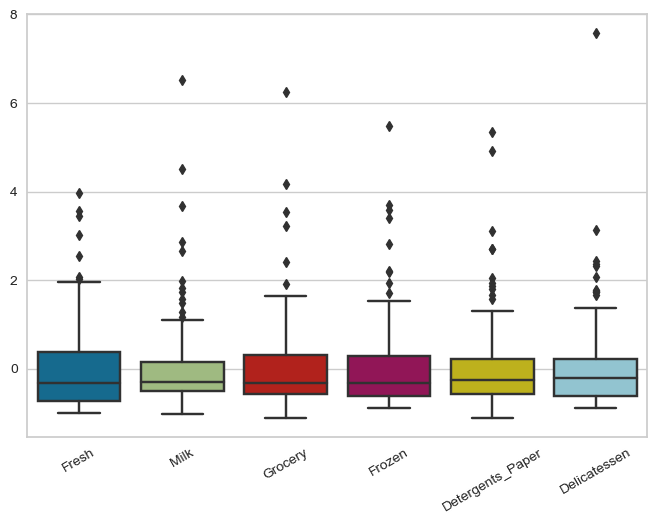

In [86]:
axretail_datanew1SS = sns.boxplot(data=scaled_retail_datanew1SS)
axretail_datanew1SS.set_xticklabels(axretail_datanew1SS.get_xticklabels(), rotation=30)
plt.show();

In [77]:
#With StandardScaler
# Instantiate a KMeans object with n_clusters = 2
# Store it in a variable named "km" 
# Fit the km model on the X_scaled data 
# Use the predict() function or the labels_ parameter to get the assinged clusters 
# Save the results in a new variable "cluster_assignment"

km = KMeans(n_clusters = 2)
cluster_assignment = km.fit_predict(retail_datanew2_scaledSS)
cluster_assignment
#WRetail["KMCluster"] = cluster_assignment
#WRetail.head(10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

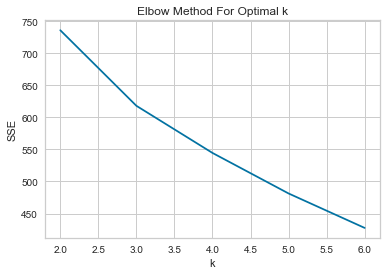

In [78]:
#Elbow Method : There’s a sweet spot where the SSE curve starts to bend known as the elbow point. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters. The elbowpoint is the point where the rate of decrease of mean distance i.e. SSE will not change significantly with increase in number of clusters.

# Create an empty list for sum of squared distances to be appended for k values 2 to 7
Sum_of_squared_distances = [] 

# Values for K (centroids) 
K = range(2, 7)

for k in K:
    km = KMeans(n_clusters =k)
    km = km.fit(retail_datanew2_scaledSS)
    
    # model.inertia_: Sum of squared distances of samples to their closest cluster center, 
    # weighted by the sample weights if provided 
    # (from documentation - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

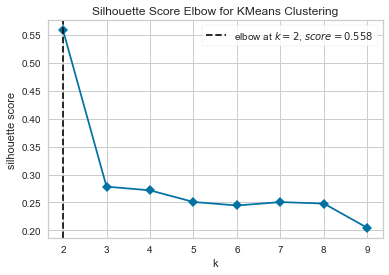

In [79]:
#Silhouette Coefficient
#Is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors: How close the data point is to other points in the cluster and how far away the data point is from points in other clusters. Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

model = KMeans(random_state=42) 

visualizer = KElbowVisualizer(model, k=(2, 10), metric='silhouette', timings=False)
visualizer.fit(retail_datanew2_scaledSS)    
visualizer.poof()
plt.show();

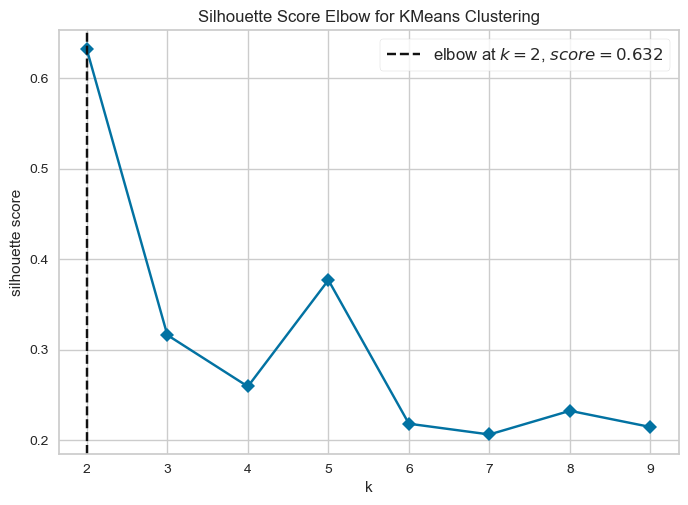

In [87]:
#Silhouette Coefficient with RobustScaler
#Is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors: How close the data point is to other points in the cluster and how far away the data point is from points in other clusters. Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

model = KMeans(random_state=42) 

visualizer = KElbowVisualizer(model, k=(2, 10), metric='silhouette', timings=False)
visualizer.fit(retail_datanew1_scaledRS)    
visualizer.poof()
plt.show();

It is apparent that though a Higher silhouette score of 0.558 is obtained with the Standard Scaler vs 0.479 with MinMaxScaler, the best score is with RobustScaler: 0.613

In [88]:
#After finding the optimal number of clusters, fit the K-Means clustering model to the dataset and then predict clusters for each of the data elements.

opt_k = 2

# Instantiate a KMeans object with the OPTIMAL k as found above 
# Store it in a variable named "kmodel" 
# Fit the kmodel model on the X_scaled data and use the predict() function (or fit_predict() directly) 
# to get the assinged clusters for each point 
# Save the results in a new variable "cluster_assignment"

kmodel = KMeans(n_clusters=opt_k)
cluster_assignmentRS = kmodel.fit_predict(retail_datanew1_scaledRS)
cluster_assignmentRS



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [90]:
retail_datanew1["KMClusterRS"] = cluster_assignmentRS
retail_datanew1.head(10)

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen  KMClusterRS
0   12669   9656     7561     214              2674          1338            0
1    7057   9810     9568    1762              3293          1776            0
2    6353   8808     7684    2405              3516          7844            0
4   22615   5410     7198    3915              1777          5185            0
5    9413   8259     5126     666              1795          1451            0
6   12126   3199     6975     480              3140           545            0
7    7579   4956     9426    1669              3321          2566            0
9    6006  11093    18881    1159              7425          2098            0
10   3366   5403    12974    4400              5977          1744            0
11  13146   1124     4523    1420               549           497            0

In [91]:
KMRetailCluster0 = retail_datanew1[retail_datanew1["KMClusterRS"]==0]
KMRetailCluster1 = retail_datanew1[retail_datanew1["KMClusterRS"]==1]


array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'KMClusterRS'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

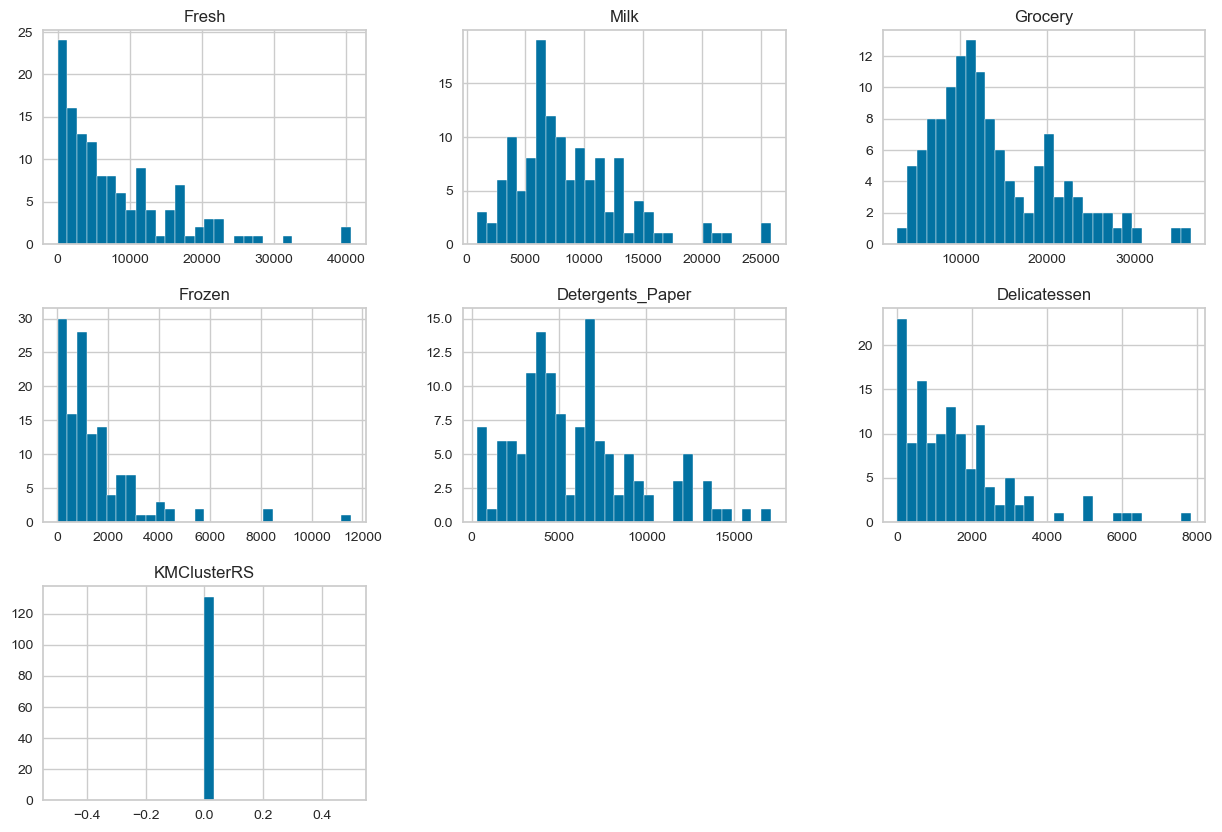

In [92]:
KMRetailCluster0 .hist(bins=30, figsize=(15, 10))

array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'KMClusterRS'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

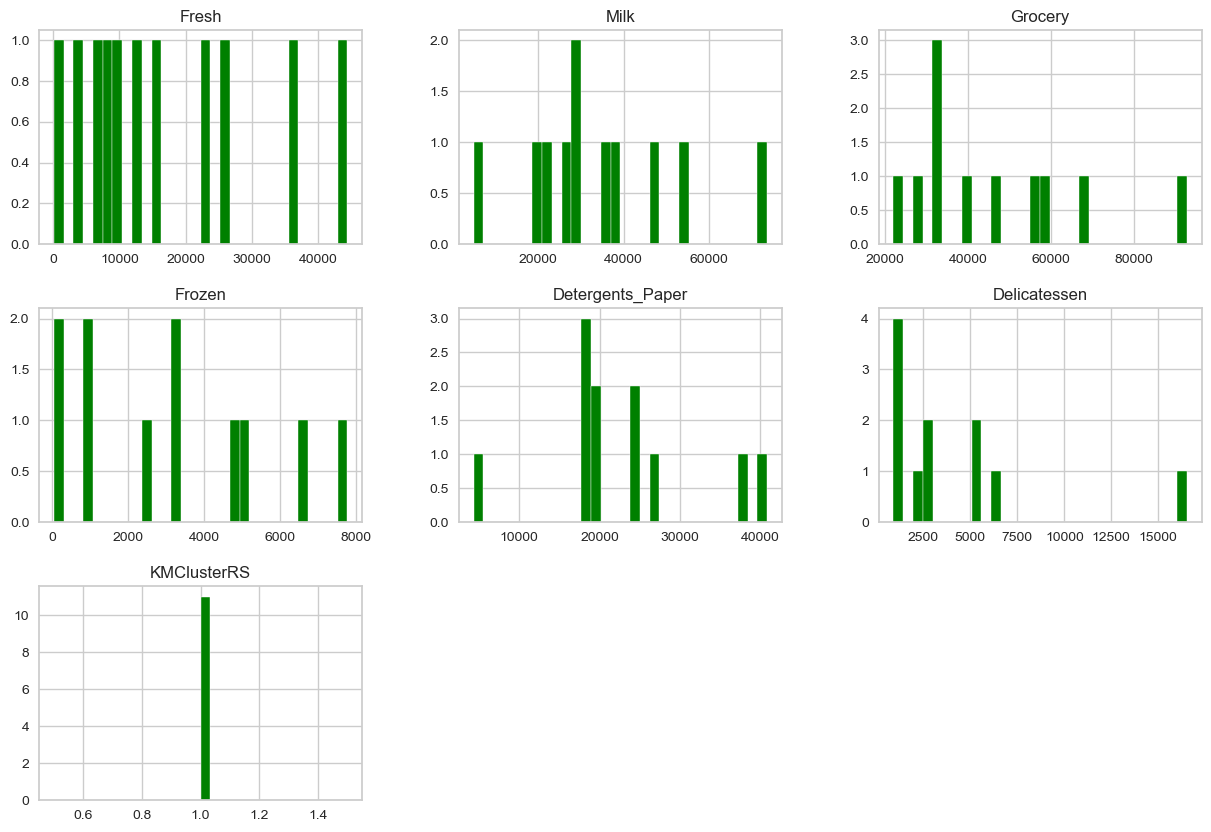

In [93]:
KMRetailCluster1 .hist(bins=30, figsize=(15, 10),color='green')

In [ ]:
Cluster 1 is fragmented since it covers most of the high-spending extreme outliers.

# HCA with Retail Subset

In [94]:
#Apply hierarchical clustering 
ZR = linkage(retail_datanew1_scaledRS, method='ward', metric='euclidean')



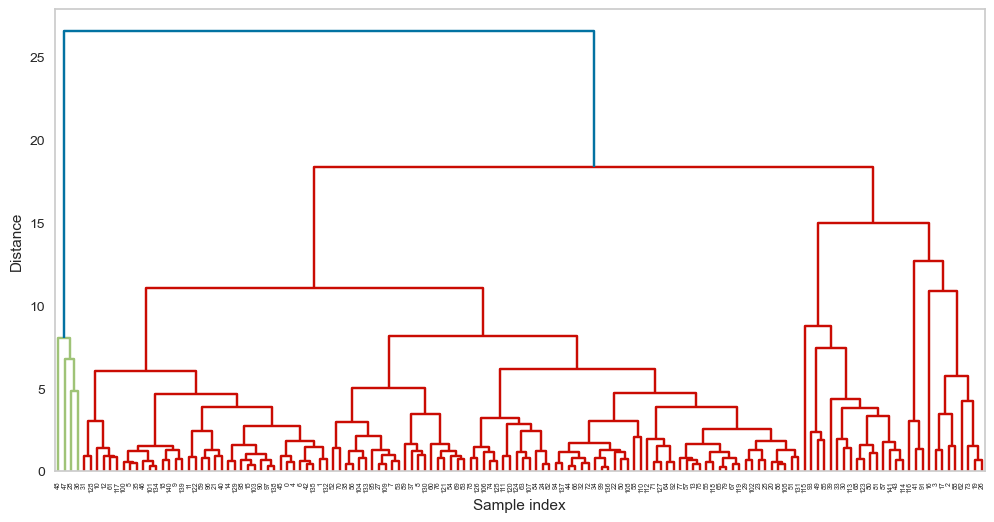

In [95]:
# Draw the dendrogram
plt.figure(figsize=(12,6))
dendrogram(ZR)
plt.ylabel('Distance')
plt.xlabel('Sample index')
plt.grid(False)
plt.show()

In [ ]:
#retail_datanew1_scaledRS

In [96]:

# Perform clustering with AgglomerativeClustering - try different distance and linkage algorithms 

hca_clusters = 2

agglomerative = AgglomerativeClustering(n_clusters=hca_clusters, 
                                        linkage = 'ward', # merges two clusters if the resulting has small variance
                                        affinity= 'euclidean')

cluster_assignmentRhca = agglomerative.fit_predict(retail_datanew1_scaledRS)
cluster_assignmentRhca


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
retail_datanew1

In [97]:

retail_datanewRHC=retail_datanew1.drop('KMClusterRS',axis=1)
retail_datanewRHC.head()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
4  22615  5410     7198    3915              1777          5185
5   9413  8259     5126     666              1795          1451

In [98]:

retail_datanewRHC["HCACluster"] = cluster_assignmentRhca
retail_datanewRHC.head(10)

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen  HCACluster
0   12669   9656     7561     214              2674          1338           0
1    7057   9810     9568    1762              3293          1776           0
2    6353   8808     7684    2405              3516          7844           0
4   22615   5410     7198    3915              1777          5185           0
5    9413   8259     5126     666              1795          1451           0
6   12126   3199     6975     480              3140           545           0
7    7579   4956     9426    1669              3321          2566           0
9    6006  11093    18881    1159              7425          2098           0
10   3366   5403    12974    4400              5977          1744           0
11  13146   1124     4523    1420               549           497           0

In [100]:
HCAClusterR0 = retail_datanewRHC[retail_datanewRHC["HCACluster"]==0]
HCAClusterR1 = retail_datanewRHC[retail_datanewRHC["HCACluster"]==1]

array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'HCACluster'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

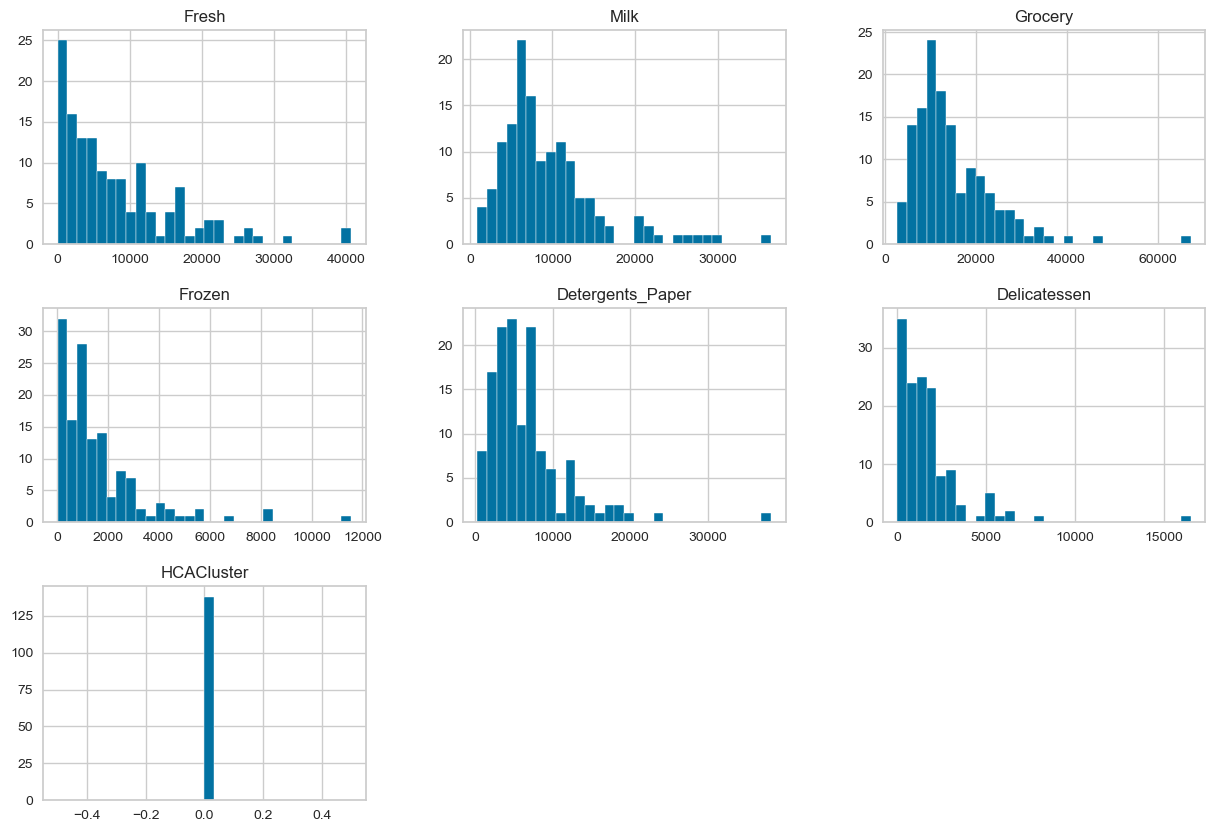

In [101]:
HCAClusterR0.hist(bins=30, figsize=(15, 10))

array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'HCACluster'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

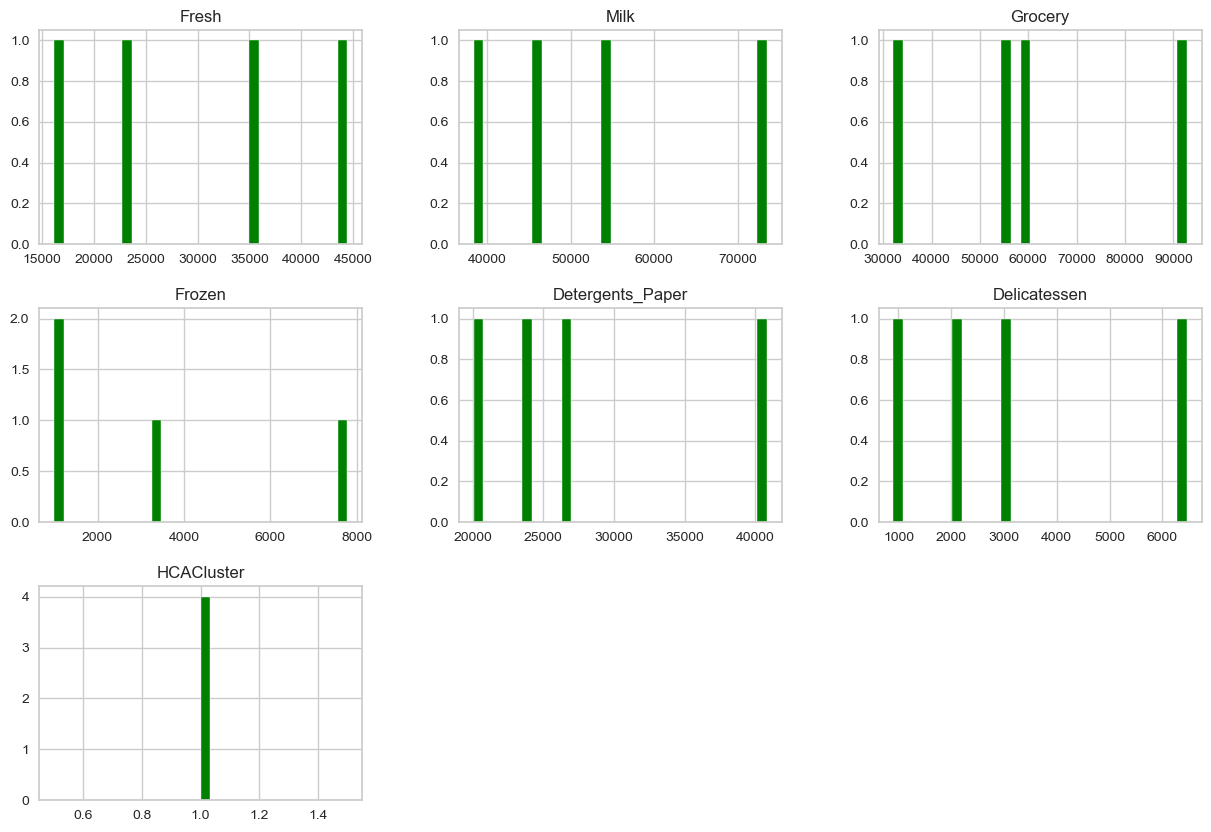

In [103]:
HCAClusterR1.hist(bins=30, figsize=(15, 10), color='green')

In [104]:
# Apply DBSCAN
db = DBSCAN(eps=1.28, min_samples=3)
db.fit(retail_datanew1_scaledRS)
cluster_assignmentRdb = db.fit_predict(retail_datanew1_scaledRS) # alternatively, db.labels_
cluster_assignmentRdb

array([ 0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
       -1,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0, -1,  0, -1,
        0,  0, -1,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1, -1, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1, -1,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0], dtype=int64)

In [105]:
print ('Number of clusters found', len(np.unique(cluster_assignmentRdb)))
print ('Clusters found', np.unique(cluster_assignmentRdb))

Number of clusters found 2
Clusters found [-1  0]


In [106]:
eps  = np.linspace(.3, 2.0, 20)
#mins = np.arange(1, 50, 3)
mins = np.arange(3, 50, 2)
Z = np.zeros((len(eps), len(mins)))

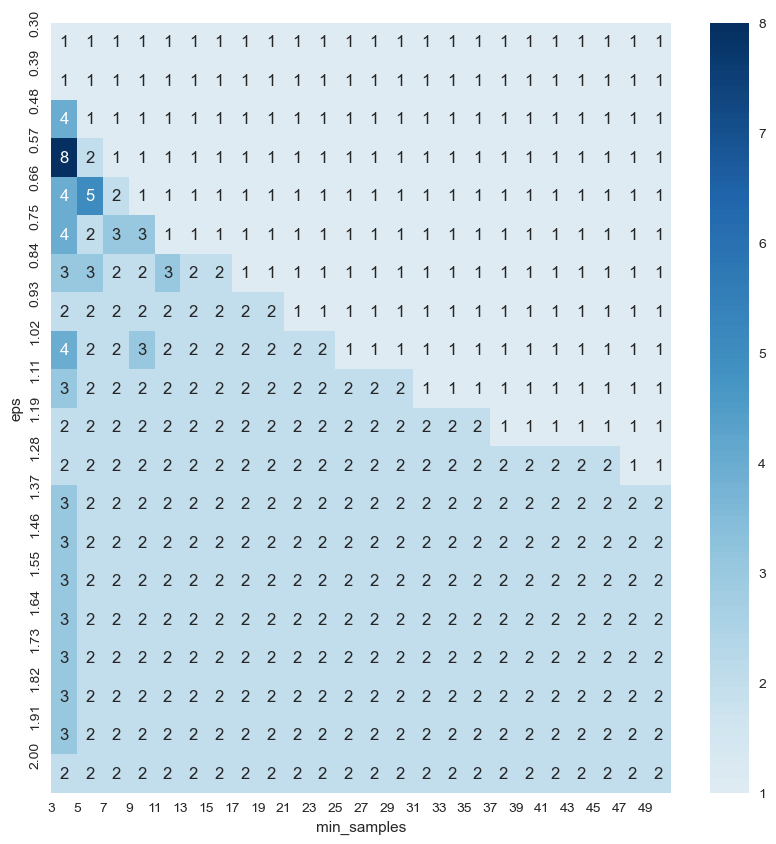

In [107]:
for i, e in enumerate(eps):
    for j, m in enumerate(mins):
        db = DBSCAN(eps=e, min_samples=m)
        clusters_foundRdb = len(np.unique(db.fit_predict(retail_datanew1_scaledRS)))
        Z[i,j] = clusters_foundRdb
plt.figure(figsize=(10, 10))
sns.heatmap(Z, cmap='RdBu', center=0, annot=True);
plt.xticks(np.arange(Z.shape[1]), mins)
plt.xlabel('min_samples')
plt.yticks(np.arange(Z.shape[0]), ['%0.2f' % x for x in eps])
plt.ylabel('eps')
plt.show()

In [108]:

retail_datanew1RDB=retail_datanew1.drop('KMClusterRS',axis=1)
retail_datanew1RDB.head()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
4  22615  5410     7198    3915              1777          5185
5   9413  8259     5126     666              1795          1451

In [109]:
retail_datanew1RDB["DBCluster"] = cluster_assignmentRdb
retail_datanew1RDB.head(10)

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen  DBCluster
0   12669   9656     7561     214              2674          1338          0
1    7057   9810     9568    1762              3293          1776          0
2    6353   8808     7684    2405              3516          7844         -1
4   22615   5410     7198    3915              1777          5185         -1
5    9413   8259     5126     666              1795          1451          0
6   12126   3199     6975     480              3140           545          0
7    7579   4956     9426    1669              3321          2566          0
9    6006  11093    18881    1159              7425          2098          0
10   3366   5403    12974    4400              5977          1744          0
11  13146   1124     4523    1420               549           497          0

In [110]:
DBClusterR0 = retail_datanew1RDB[retail_datanew1RDB["DBCluster"]==0]
DBClusterR1 = spending_input_dataDB[spending_input_dataDB["DBCluster"]!=0]


array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'DBCluster'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

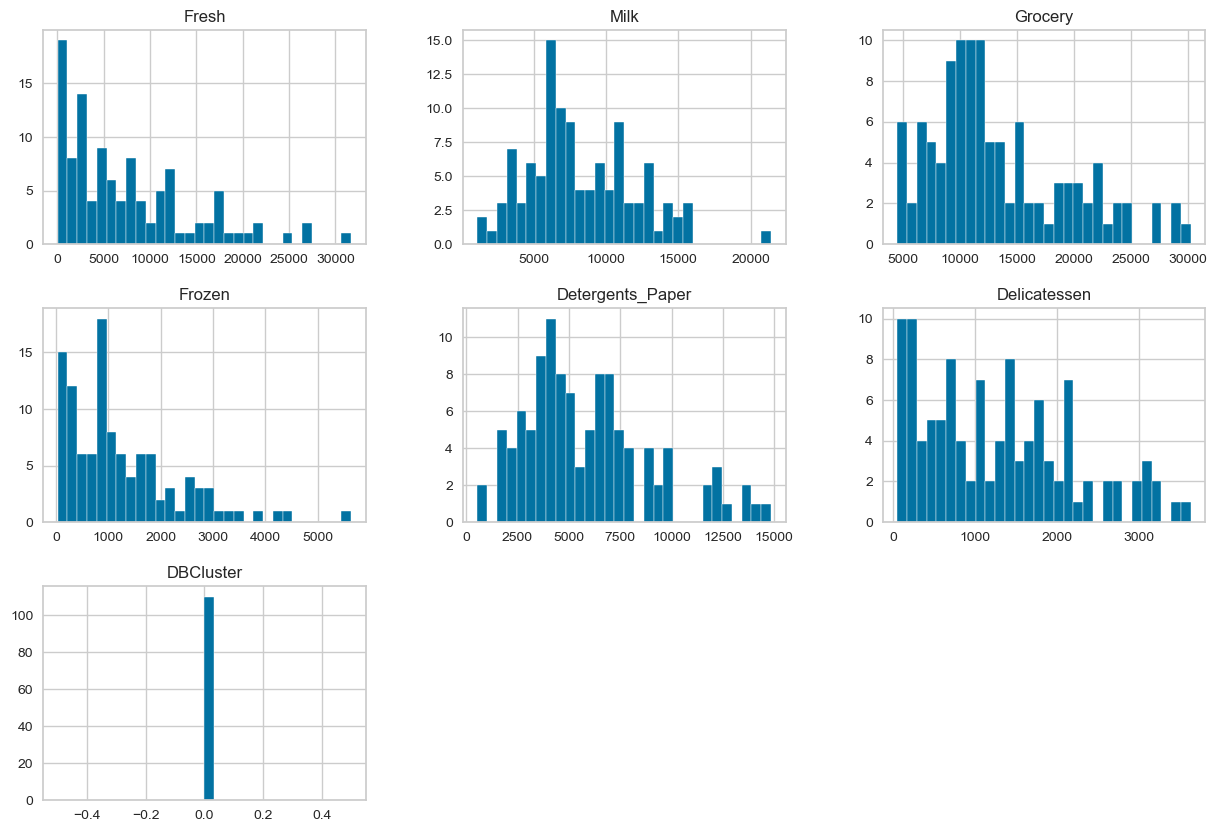

In [111]:
DBClusterR0 .hist(bins=30, figsize=(15, 10))

array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'DBCluster'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

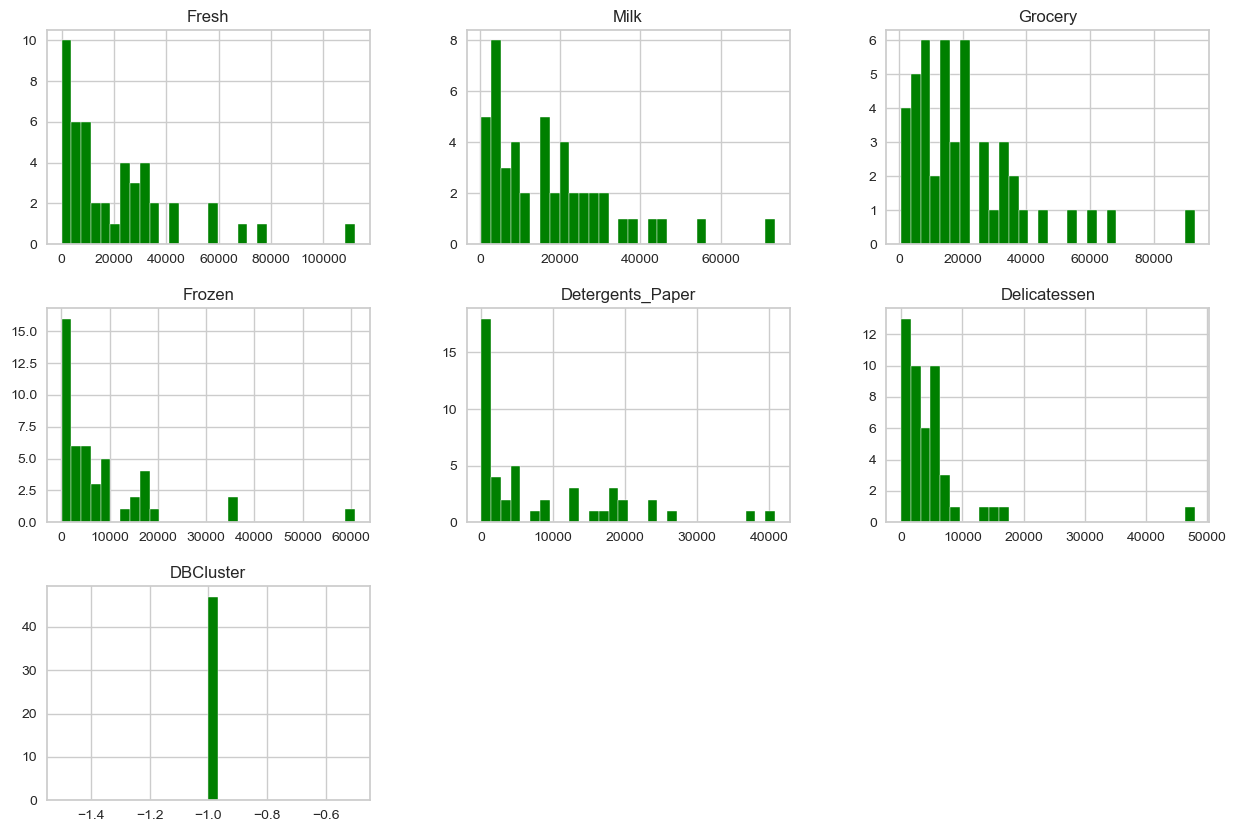

In [113]:
DBClusterR1 .hist(bins=30, figsize=(15, 10),color='green')

# Let's look at Channel 1 Horeca now

In [85]:
horeca_data.head()
horeca_data.describe()

Channel      Region          Fresh          Milk       Grocery  \
count    298.0  298.000000     298.000000    298.000000    298.000000   
mean       1.0    2.510067   13475.560403   3451.724832   3962.137584   
std        0.0    0.805013   13831.687502   4352.165571   3545.513391   
min        1.0    1.000000       3.000000     55.000000      3.000000   
25%        1.0    2.000000    4070.250000   1164.500000   1703.750000   
50%        1.0    3.000000    9581.500000   2157.000000   2684.000000   
75%        1.0    3.000000   18274.750000   4029.500000   5076.750000   
max        1.0    3.000000  112151.000000  43950.000000  21042.000000   

             Frozen  Detergents_Paper  Delicatessen  Customer_ID  
count    298.000000        298.000000    298.000000   298.000000  
mean    3748.251678        790.560403   1415.956376   237.369128  
std     5643.912500       1104.093673   3147.426922   120.910343  
min       25.000000          3.000000      3.000000     3.000000  
25%      830.000000        183.250000    379.000000   136.250000  
50%     2057.500000        385.500000    821.000000   240.500000  
75%     4558.750000        899.500000   1548.000000   343.500000  
max    60869.000000       6907.000000  47943.000000   439.000000

In [86]:
horeca_datanew = horeca_data.drop(['Channel','Customer_ID'], axis=1)
horeca_datanew.head()


Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
3        3  13265  1196     4221    6404               507          1788
8        3   5963  3648     6192     425              1716           750
15       3  10253  1114     3821     397               964           412
17       3   5876  6157     2933     839               370          4478
19       3   7780  2495     9464     669              2518           501

In [87]:
# Apply a lambda function to count the number of outliers in each column
num_outliers1 = horeca_datanew.apply(lambda x: ((x < x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25))) | (x > x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25)))).sum())

In [88]:
# Print the number of outliers in each column
print(num_outliers1)

Region               0
Fresh               15
Milk                19
Grocery             20
Frozen              20
Detergents_Paper    29
Delicatessen        18
dtype: int64


<AxesSubplot: xlabel='Region', ylabel='Detergents_Paper'>

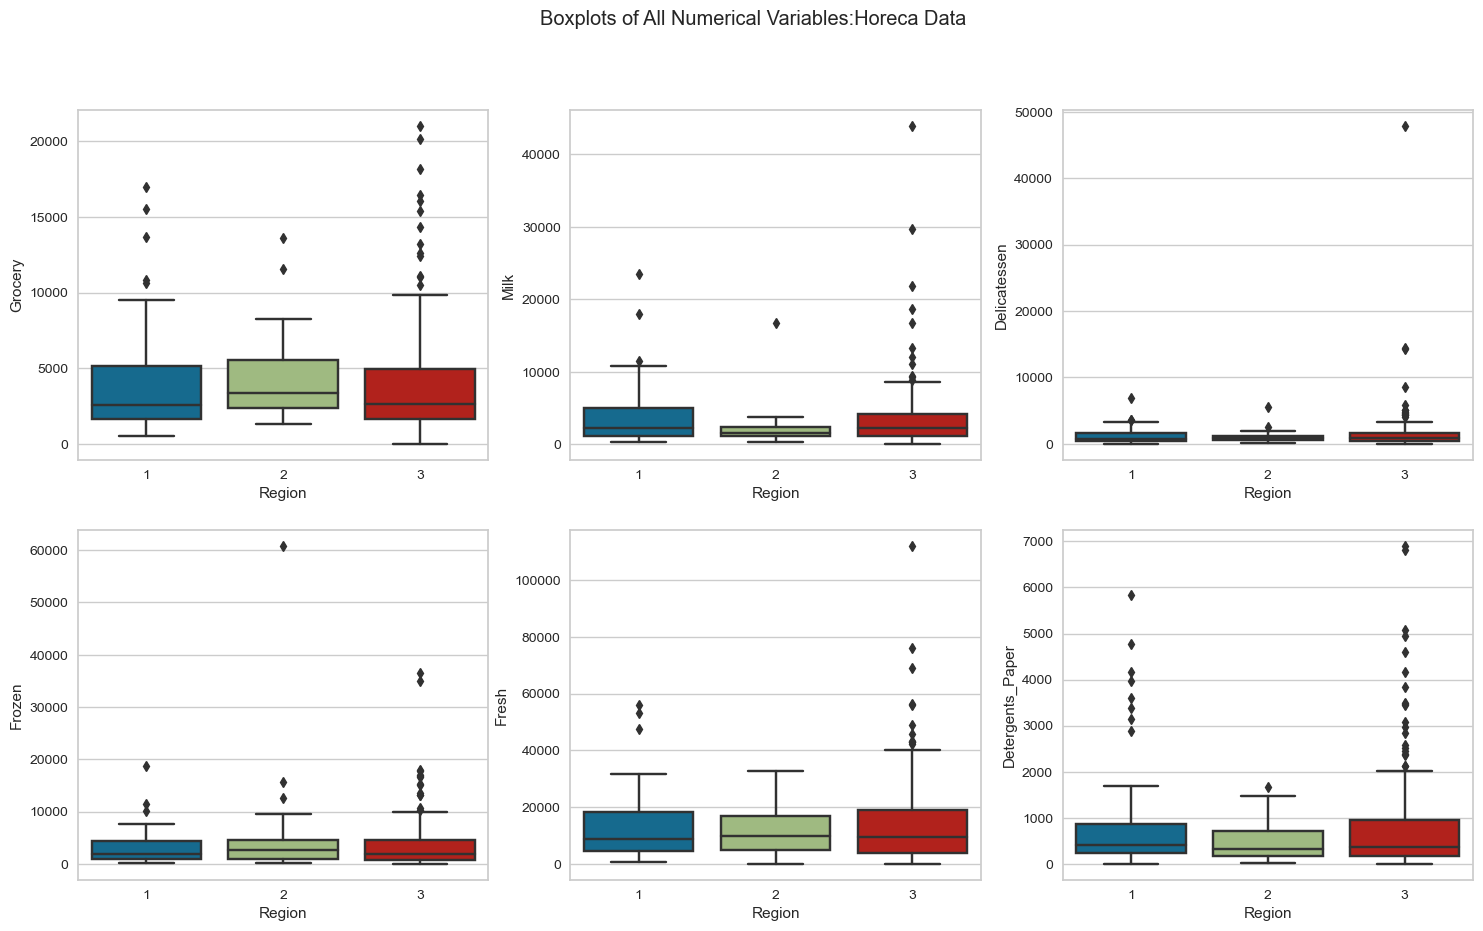

In [153]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
 
fig.suptitle('Boxplots of All Numerical Variables:Horeca Data')
 
#wholesale_data = sns.load_dataset("input_data")
 
sns.boxplot(ax=axes[0, 0], data=horeca_datanew, x='Region', y='Grocery')
sns.boxplot(ax=axes[0, 1], data=horeca_datanew, x='Region', y='Milk')
sns.boxplot(ax=axes[0, 2], data=horeca_datanew, x='Region', y='Delicatessen')
sns.boxplot(ax=axes[1, 0], data=horeca_datanew, x='Region', y='Frozen')
sns.boxplot(ax=axes[1, 1], data=horeca_datanew, x='Region', y='Fresh')
sns.boxplot(ax=axes[1, 2], data=horeca_datanew, x='Region', y='Detergents_Paper')

In [164]:
# define your data and scaling/transforming steps
preprocessor = Pipeline(steps=[
    ('scaler',MinMaxScaler())
])

# define the parameter grid for the clustering algorithm
param_grid = {
   
    'reduce_dim__n_components': [2, 3, 4, 5],
    'cluster__n_clusters': [2, 3, 4, 5],
    'cluster__init': ['k-means++', 'random'],
    'cluster__max_iter': [100, 200]
}

# create the KMeans object
kmeans = KMeans()

# create the pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('reduce_dim', PCA()),
                       ('cluster', kmeans)])

# create the GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid=param_grid)
grid_search.fit(horeca_datanew)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('scaler',
                                                         MinMaxScaler())])),
                                       ('reduce_dim', PCA()),
                                       ('cluster', KMeans())]),
             param_grid={'cluster__init': ['k-means++', 'random'],
                         'cluster__max_iter': [100, 200],
                         'cluster__n_clusters': [2, 3, 4, 5],
                         'reduce_dim__n_components': [2, 3, 4, 5]})

In [165]:
print(grid_search.best_params_)



{'cluster__init': 'k-means++', 'cluster__max_iter': 100, 'cluster__n_clusters': 5, 'reduce_dim__n_components': 2}


In [166]:
print(grid_search.best_score_)

-3.5920994154524193


In [90]:
scaler   = MinMaxScaler()
horeca_datanew_scaledMM = scaler.fit_transform(horeca_datanew)
scaled_horeca_datanewMM = pd.DataFrame(horeca_datanew_scaledMM, columns=horeca_datanew.columns)
scaled_horeca_datanewMM .head()

Region     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
0     1.0  0.118254  0.025994  0.200485  0.104842          0.073001   
1     1.0  0.053144  0.081854  0.294168  0.006574          0.248117   
2     1.0  0.091397  0.024126  0.181473  0.006114          0.139195   
3     1.0  0.052368  0.139014  0.139265  0.013378          0.053158   
4     1.0  0.069346  0.055587  0.449689  0.010584          0.364282   

   Delicatessen  
0      0.037234  
1      0.015582  
2      0.008531  
3      0.093346  
4      0.010388

In [91]:
scaler   = StandardScaler()
horeca_datanew_scaledSS = scaler.fit_transform(horeca_datanew)
scaled_horeca_datanewSS = pd.DataFrame(horeca_datanew_scaledSS, columns=horeca_datanew.columns)
scaled_horeca_datanewSS .head()

Region     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
0  0.609626 -0.015249 -0.519171  0.073134  0.471342         -0.257258   
1  0.609626 -0.544055  0.045174  0.629983 -0.589811          0.839599   
2  0.609626 -0.233376 -0.538044 -0.039874 -0.594780          0.157352   
3  0.609626 -0.550355  0.622638 -0.290753 -0.516334         -0.381551   
4  0.609626 -0.412469 -0.220197  1.554392 -0.546506          1.567209   

   Delicatessen  
0      0.118404  
1     -0.211943  
2     -0.319513  
3      0.974508  
4     -0.291189

In [114]:
scaler   = RobustScaler()
horeca_datanew_scaledRS = scaler.fit_transform(horeca_data2)
scaled_horeca_datanewRS = pd.DataFrame(horeca_datanew_scaledRS, columns=horeca_data2.columns)
scaled_horeca_datanewRS .head()

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  0.259319 -0.335428  0.455677  1.165672          0.169634      0.827203
1 -0.254743  0.520419  1.040024 -0.437814          1.857592     -0.060736
2  0.047274 -0.364049  0.337089 -0.445323          0.807679     -0.349872
3 -0.260868  1.396161  0.073822 -0.326785         -0.021640      3.128315
4 -0.126826  0.117976  2.010080 -0.372377          2.977312     -0.273738

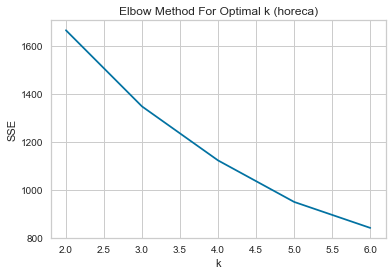

In [93]:
#Elbow Method : There’s a sweet spot where the SSE curve starts to bend known as the elbow point. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters. The elbowpoint is the point where the rate of decrease of mean distance i.e. SSE will not change significantly with increase in number of clusters.

# Create an empty list for sum of squared distances to be appended for k values 2 to 7
Sum_of_squared_distances = [] 

# Values for K (centroids) 
K = range(2, 7)

for k in K:
    km = KMeans(n_clusters =k)
    km = km.fit(horeca_datanew_scaledSS)
    
    # model.inertia_: Sum of squared distances of samples to their closest cluster center, 
    # weighted by the sample weights if provided 
    # (from documentation - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k (horeca)')
plt.show()

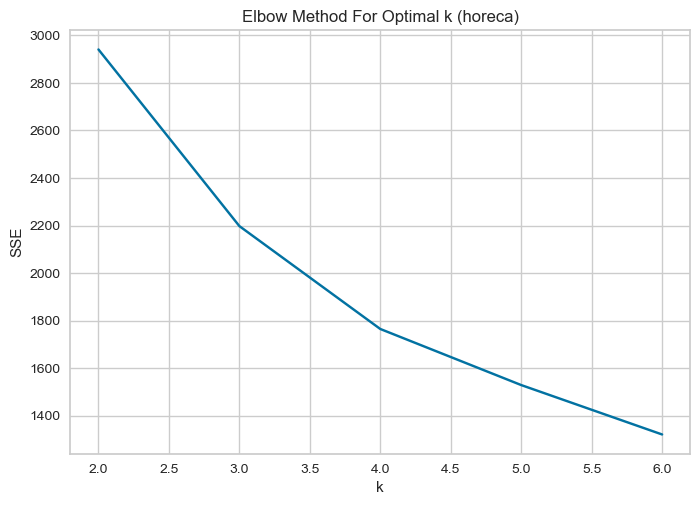

In [118]:
#Utilising Robust Scaler
#Elbow Method : There’s a sweet spot where the SSE curve starts to bend known as the elbow point. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters. The elbowpoint is the point where the rate of decrease of mean distance i.e. SSE will not change significantly with increase in number of clusters.

# Create an empty list for sum of squared distances to be appended for k values 2 to 7
Sum_of_squared_distances = [] 

# Values for K (centroids) 
K = range(2, 7)

for k in K:
    km = KMeans(n_clusters =k)
    km = km.fit(horeca_datanew_scaledRS)
    
    # model.inertia_: Sum of squared distances of samples to their closest cluster center, 
    # weighted by the sample weights if provided 
    # (from documentation - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k (horeca)')
plt.show()

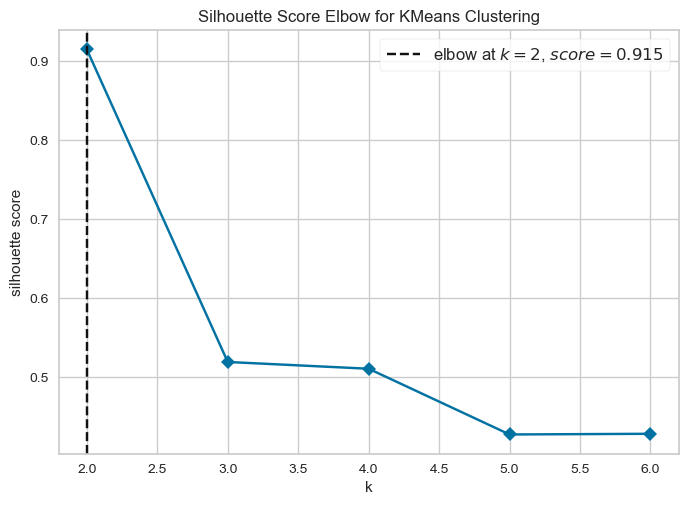

In [116]:
#Silhouette Coefficient
#Is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors: How close the data point is to other points in the cluster and how far away the data point is from points in other clusters. Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

model = KMeans(random_state=42) 

visualizer = KElbowVisualizer(model, k=(2, 7), metric='silhouette', timings=False)
visualizer.fit(horeca_datanew_scaledRS)    
visualizer.poof()
plt.show();

In [ ]:
Unlike before, MinMaxScaler provides a higher silhouette score of 0.595 and RobustScaler works even better with a score of 0.910

In [117]:
#After finding the optimal number of clusters, fit the K-Means clustering model to the dataset and then predict clusters for each of the data elements.

opt_k = 2

# Instantiate a KMeans object with the OPTIMAL k as found above 
# Store it in a variable named "kmodel" 
# Fit the kmodel model on the X_scaled data and use the predict() function (or fit_predict() directly) 
# to get the assinged clusters for each point 
# Save the results in a new variable "cluster_assignment"

kmodel = KMeans(n_clusters=opt_k)
cluster_assignment = kmodel.fit_predict(horeca_datanew_scaledRS)
cluster_assignment

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [123]:
#After finding the optimal number of clusters, fit the K-Means clustering model to the dataset and then predict clusters for each of the data elements.

opt_k = 3

# Instantiate a KMeans object with the OPTIMAL k as found above 
# Store it in a variable named "kmodel" 
# Fit the kmodel model on the X_scaled data and use the predict() function (or fit_predict() directly) 
# to get the assinged clusters for each point 
# Save the results in a new variable "cluster_assignment"

kmodel = KMeans(n_clusters=opt_k)
cluster_assignmentRSH = kmodel.fit_predict(horeca_datanew_scaledRS)
cluster_assignmentRSH

array([0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2,
       2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0])

Even though the silhouete coeeficient was very high with k=2 elbow, only one point was classified as a different class. Falling back on the inertia plot, we try k=3

In [126]:
horeca_data2["KMClusterRS"] = cluster_assignmentRSH
horeca_data2.head(10)

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen  KMClusterRS
3   13265  1196     4221    6404               507          1788            0
8    5963  3648     6192     425              1716           750            0
15  10253  1114     3821     397               964           412            0
17   5876  6157     2933     839               370          4478            0
19   7780  2495     9464     669              2518           501            2
21   5567   871     2010    3383               375           569            0
22  31276  1917     4469    9408              2381          4334            2
26   9898   961     2861    3151               242           833            0
27  14276   803     3045     485               100           518            0
29  43088  2100     2609    1200              1107           823            0

In [127]:
KMHorecaCluster0 = horeca_data2[horeca_data2["KMClusterRS"]==0]
KMHorecaCluster1 = horeca_data2[horeca_data2["KMClusterRS"]==1]
KMHorecaCluster2 = horeca_data2[horeca_data2["KMClusterRS"]==2]

array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'KMClusterRS'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

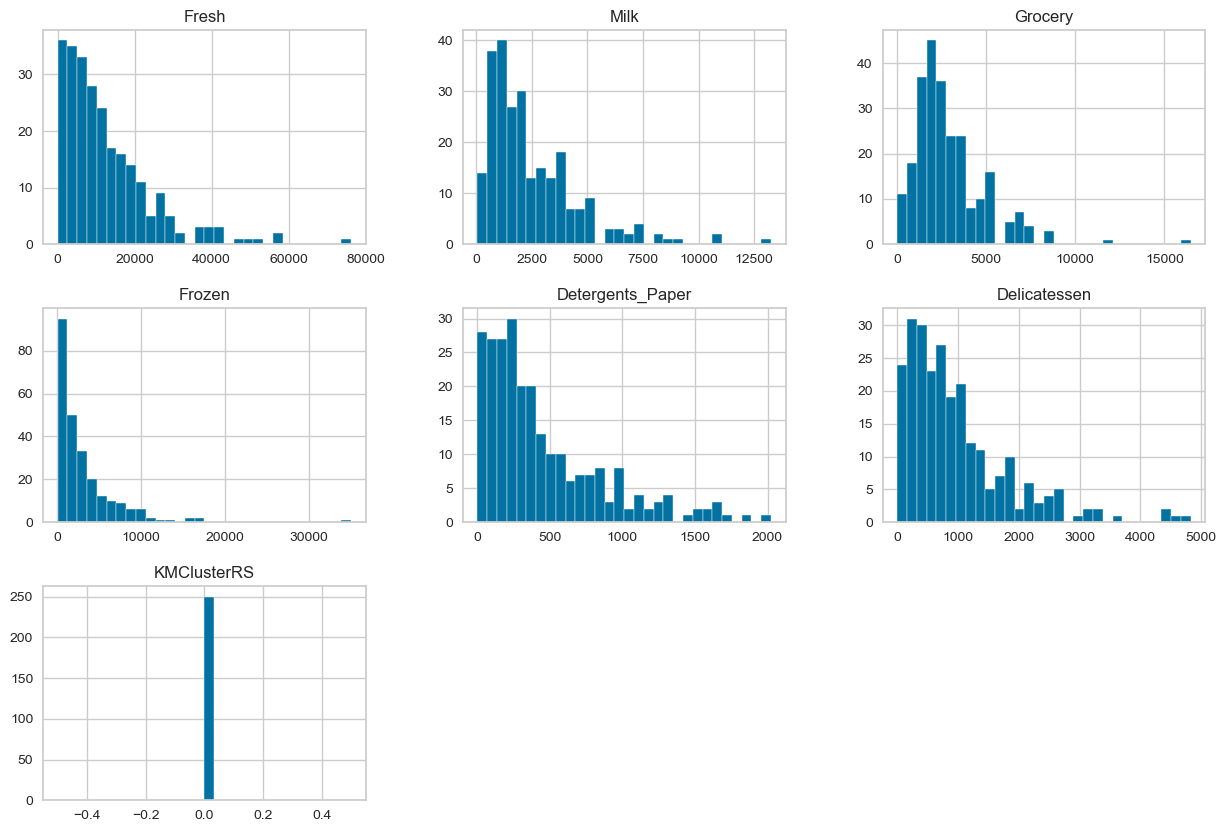

In [128]:
KMHorecaCluster0 .hist(bins=30, figsize=(15, 10))

array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'KMClusterRS'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

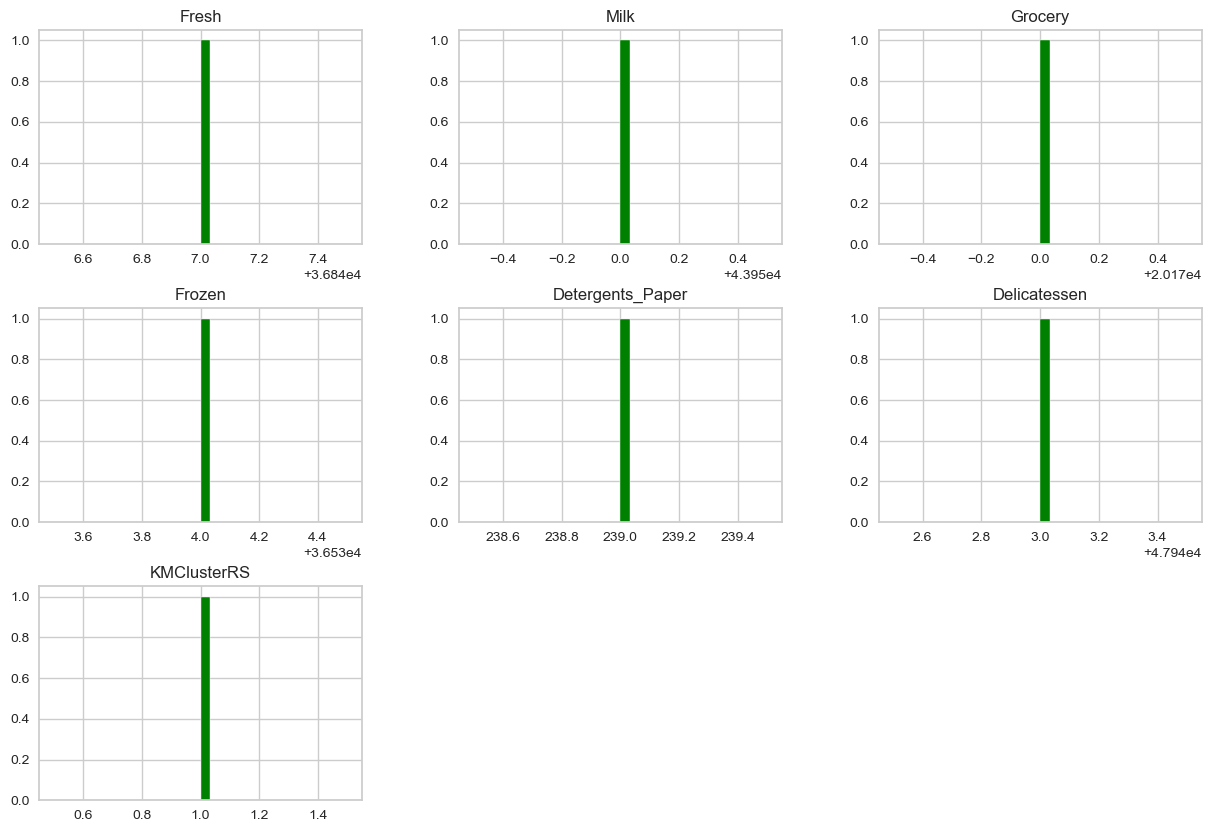

In [129]:
KMHorecaCluster1 .hist(bins=30, figsize=(15, 10), color='green')

array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'KMClusterRS'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

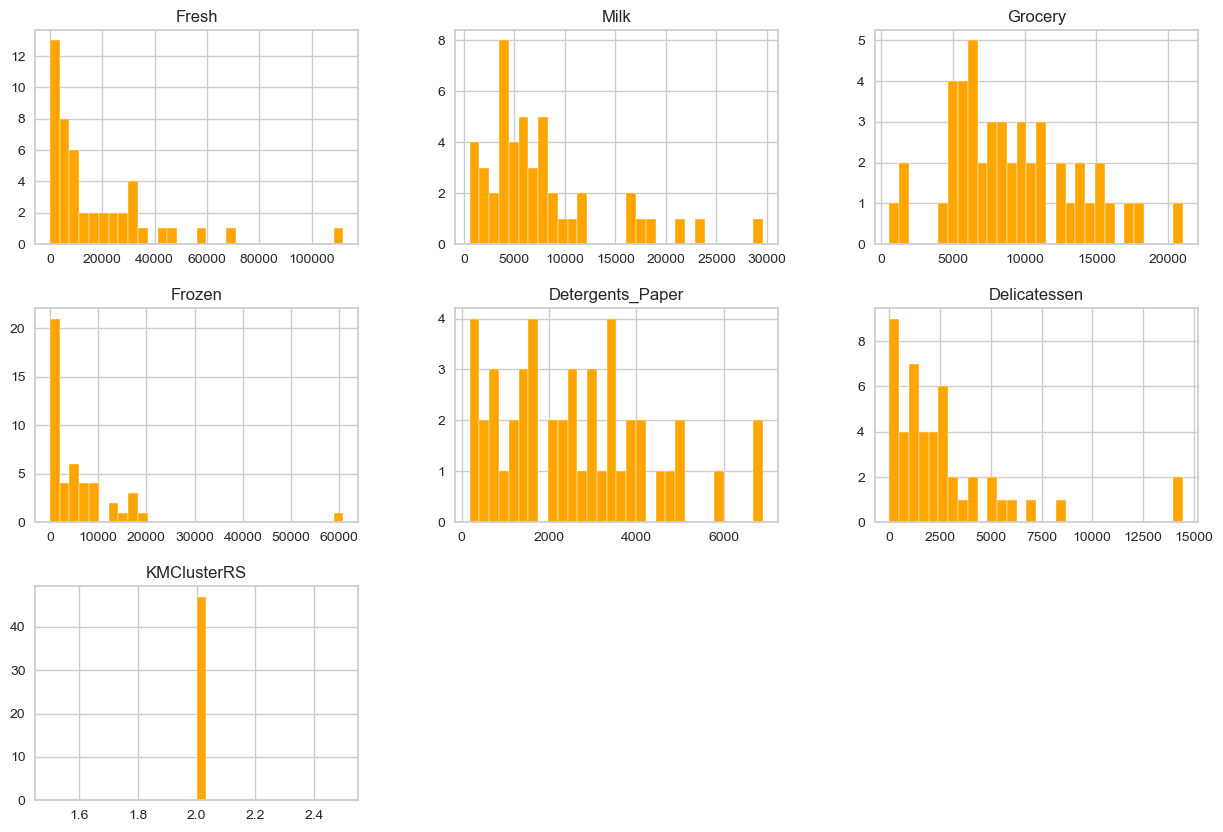

In [130]:
KMHorecaCluster2 .hist(bins=30, figsize=(15, 10), color='orange')

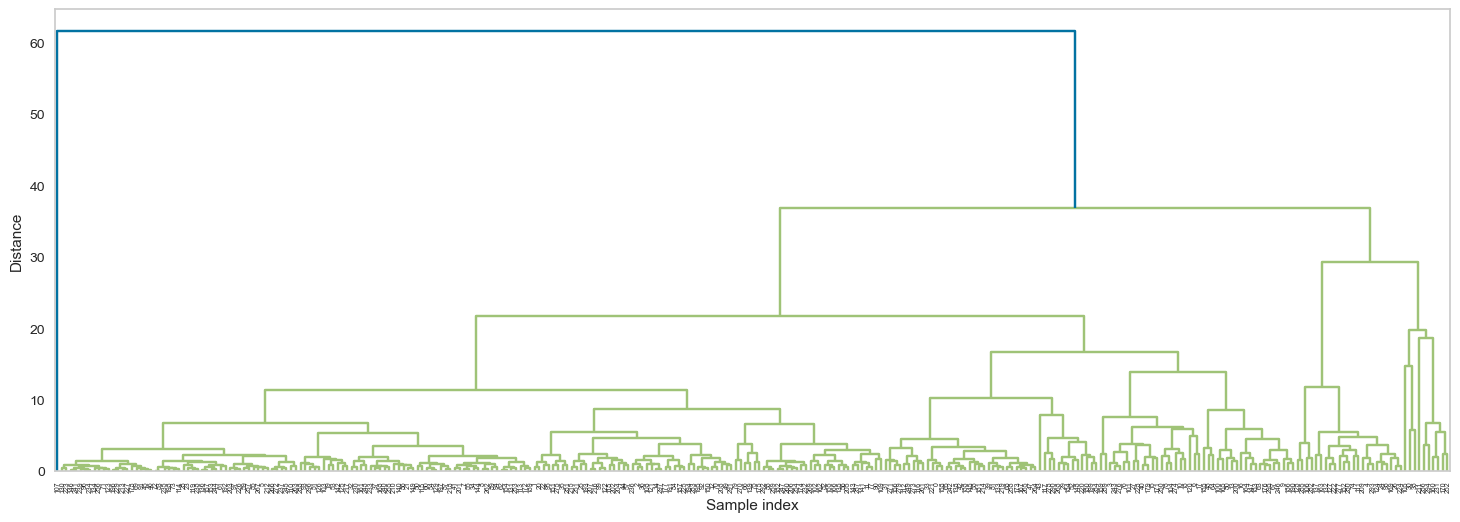

In [131]:
# Apply hierarchical clustering 
Z = linkage(horeca_datanew_scaledRS, method='ward', metric='euclidean')

# Draw the dendrogram
plt.figure(figsize=(18,6))
dendrogram(Z)
plt.ylabel('Distance')
plt.xlabel('Sample index')
plt.grid(False)
plt.show()


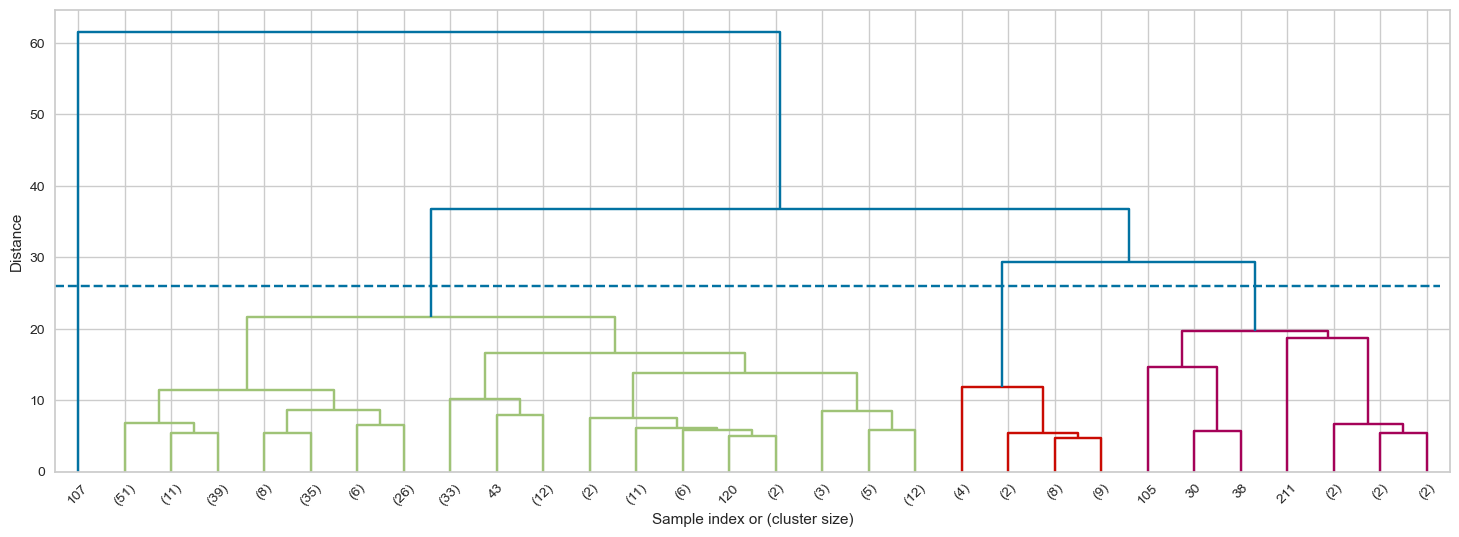

In [132]:
# Draw the dendrogram using a cut_off value

plt.figure(figsize=(18,6))
cut_off = 26

dendrogram(Z, color_threshold=cut_off,
           truncate_mode='lastp', 
           # show only the last p merged clusters
           # p=30
          )

plt.ylabel('Distance')
plt.xlabel('Sample index or (cluster size)')
plt.hlines(cut_off, 0, len(horeca_datanew_scaledRS), linestyle='--')
plt.show()

In [133]:
# Perform clustering with AgglomerativeClustering - try different distance and linkage algorithms 

hca_clusters = 3

agglomerative = AgglomerativeClustering(n_clusters=hca_clusters, 
                                        linkage = 'ward', # merges two clusters if the resulting has small variance
                                        affinity= 'euclidean')

cluster_assignmenthcaH = agglomerative.fit_predict(horeca_datanew_scaledRS)
cluster_assignmenthcaH

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2], dtype=i

In [135]:
horeca_data2["HCACluster"] = cluster_assignmenthcaH
horeca_data2.head(10)
horeca_data3=horeca_data2.drop('KMClusterRS', axis =1)
horeca_data3.head()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen  HCACluster
3   13265  1196     4221    6404               507          1788           2
8    5963  3648     6192     425              1716           750           2
15  10253  1114     3821     397               964           412           2
17   5876  6157     2933     839               370          4478           2
19   7780  2495     9464     669              2518           501           0

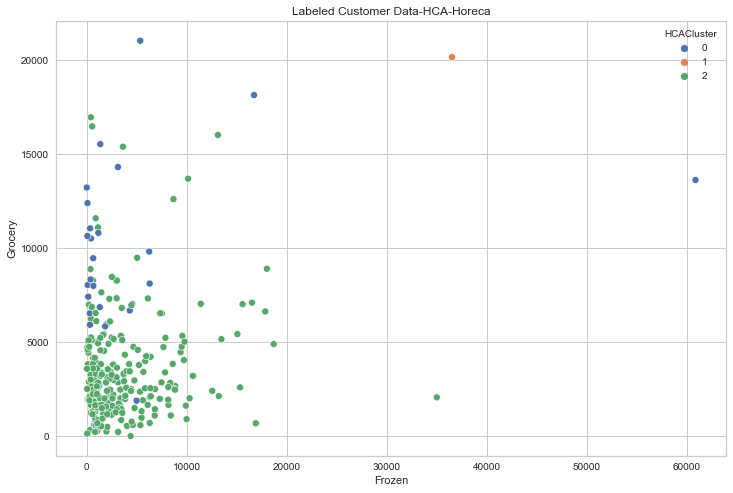

In [123]:

plt.figure(figsize=(12,8))

sns.scatterplot(x='Frozen', 
                y='Grocery', 
                data=horeca_data3, 
                hue= "HCACluster",
                palette="deep"
               ).set_title('Labeled Customer Data-HCA-Horeca')
plt.show()

In [136]:
hcaHorecaCluster0 = horeca_data3[horeca_data3["HCACluster"]==0]
hcaHorecaCluster1 = horeca_data3[horeca_data3["HCACluster"]==1]
hcaHorecaCluster2 = horeca_data3[horeca_data3["HCACluster"]==2]

array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'HCACluster'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

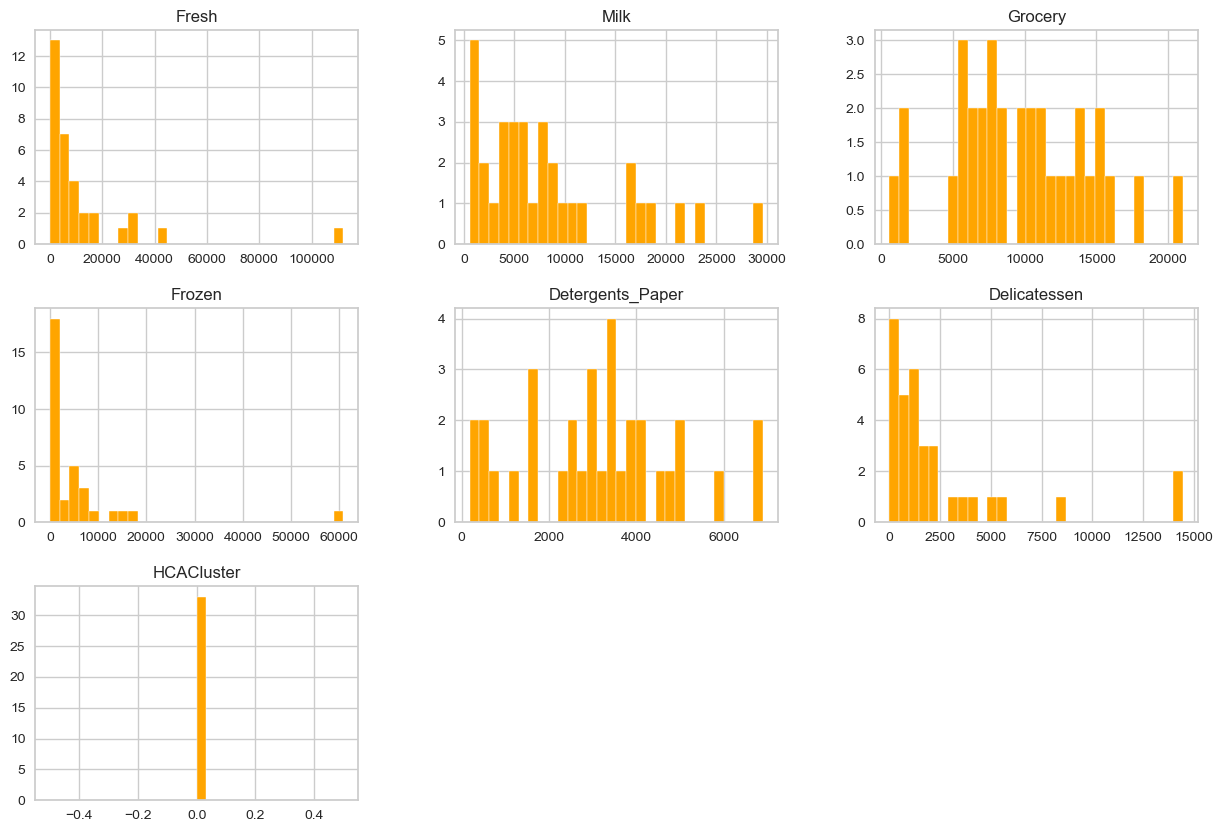

In [141]:
hcaHorecaCluster0.hist(bins=30, figsize=(15, 10), color='orange')

array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'HCACluster'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

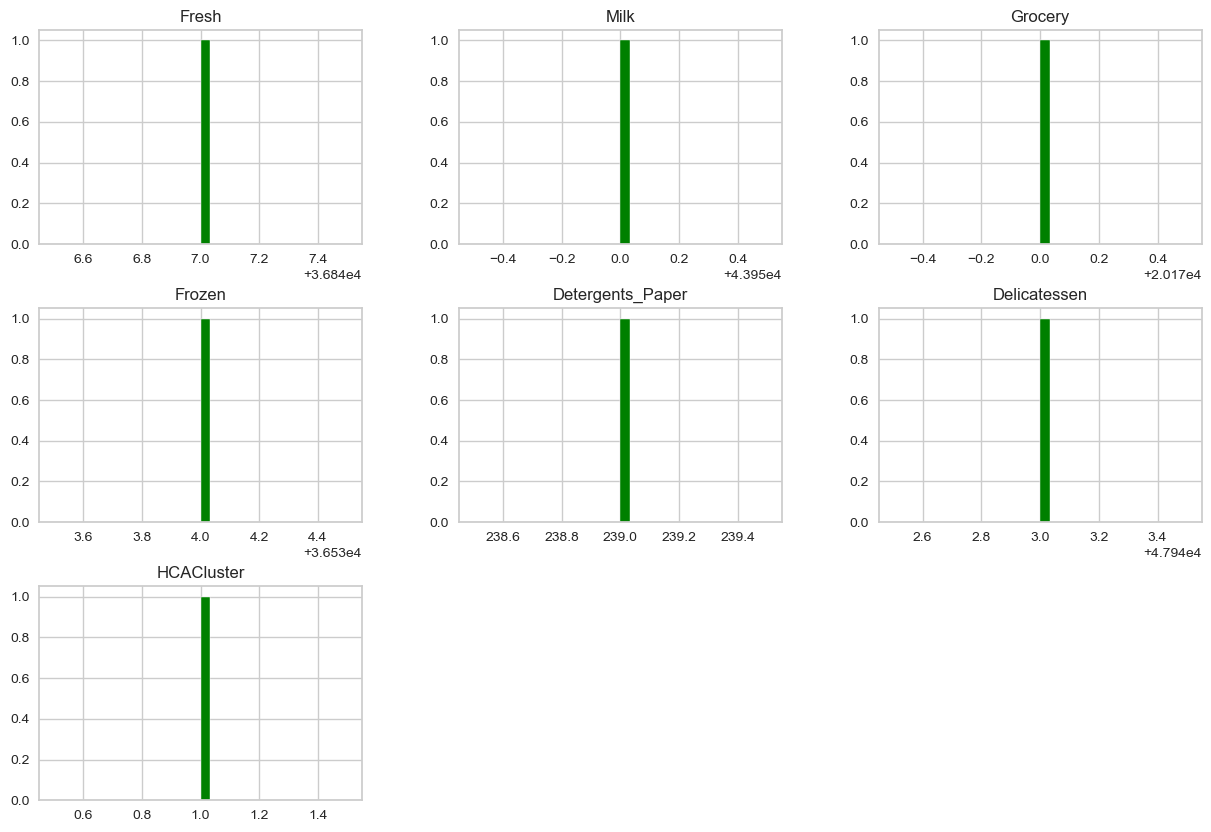

In [140]:
hcaHorecaCluster1.hist(bins=30, figsize=(15, 10),color='green')

array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'HCACluster'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

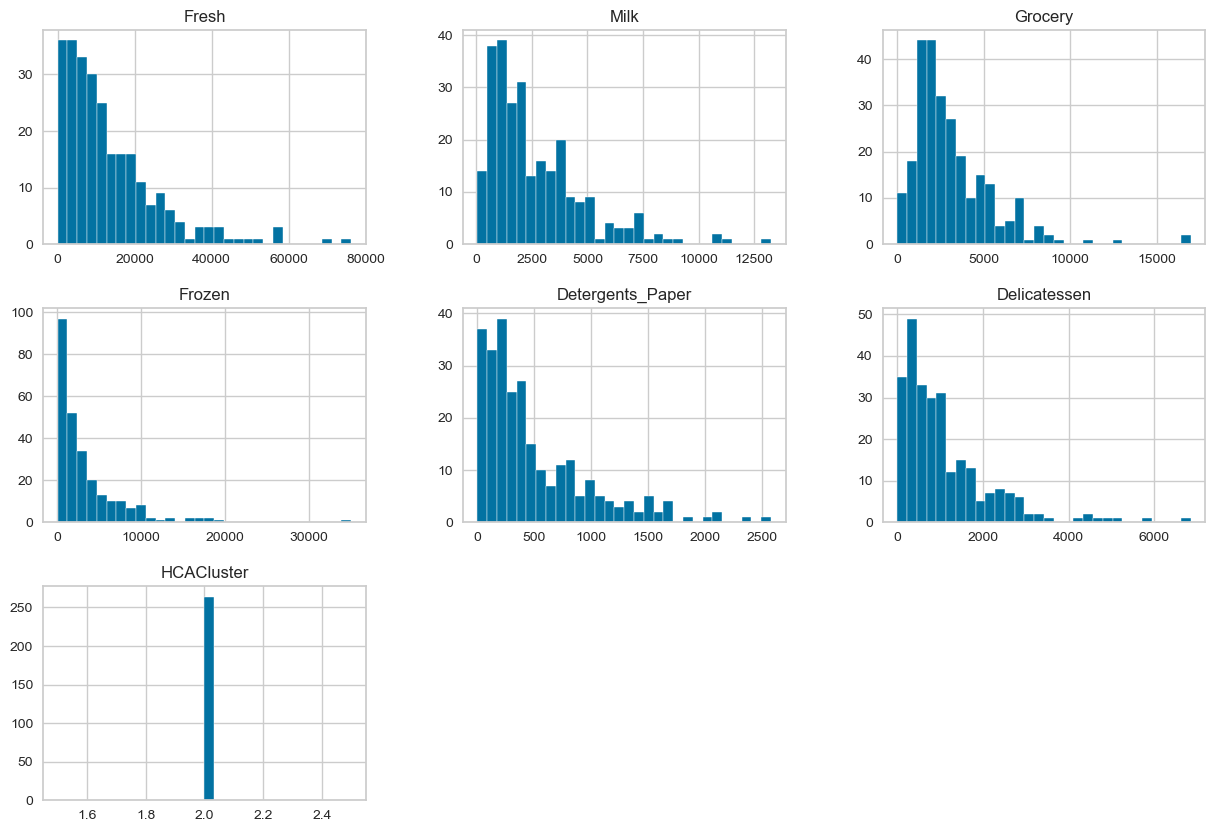

In [139]:
hcaHorecaCluster2.hist(bins=30, figsize=(15, 10))

In [142]:
# Apply DBSCAN
db = DBSCAN(eps=2, min_samples=5)
db.fit(horeca_datanew_scaledRS)
cluster_assignmentdbH = db.fit_predict(horeca_datanew_scaledRS) # alternatively, db.labels_
cluster_assignmentdbH



array([ 0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [143]:
print ('Number of clusters found', len(np.unique(cluster_assignmentdbH)))
print ('Clusters found', np.unique(cluster_assignmentdbH))




Number of clusters found 2
Clusters found [-1  0]


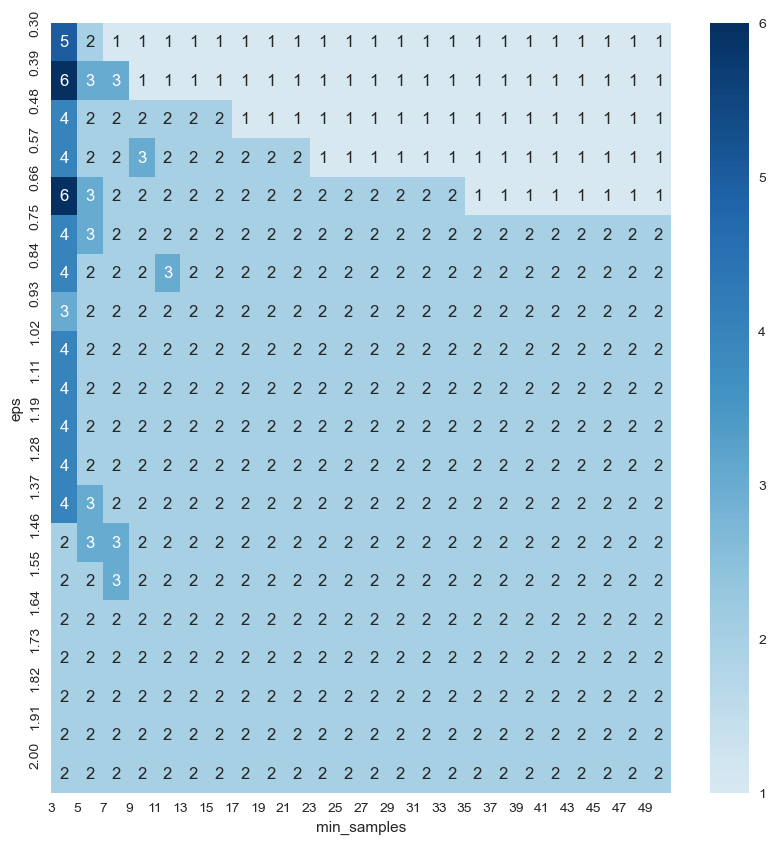

In [144]:
# WARNING this may take a couple of minutes to finish!
eps  = np.linspace(.3, 2.0, 20)
mins = np.arange(3, 50, 2)
Z = np.zeros((len(eps), len(mins)))

for i, e in enumerate(eps):
    for j, m in enumerate(mins):
        db = DBSCAN(eps=e, min_samples=m)
        clusters_found = len(np.unique(db.fit_predict(horeca_datanew_scaledRS)))
        Z[i,j] = clusters_found
plt.figure(figsize=(10, 10))
sns.heatmap(Z, cmap='RdBu', center=0, annot=True);
plt.xticks(np.arange(Z.shape[1]), mins)
plt.xlabel('min_samples')
plt.yticks(np.arange(Z.shape[0]), ['%0.2f' % x for x in eps])
plt.ylabel('eps')
plt.show()

In [145]:

horeca_data4=horeca_data3.drop('HCACluster', axis =1)
horeca_data4.head()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
3   13265  1196     4221    6404               507          1788
8    5963  3648     6192     425              1716           750
15  10253  1114     3821     397               964           412
17   5876  6157     2933     839               370          4478
19   7780  2495     9464     669              2518           501

In [146]:
horeca_data4['DBCluster'] = cluster_assignmentdbH



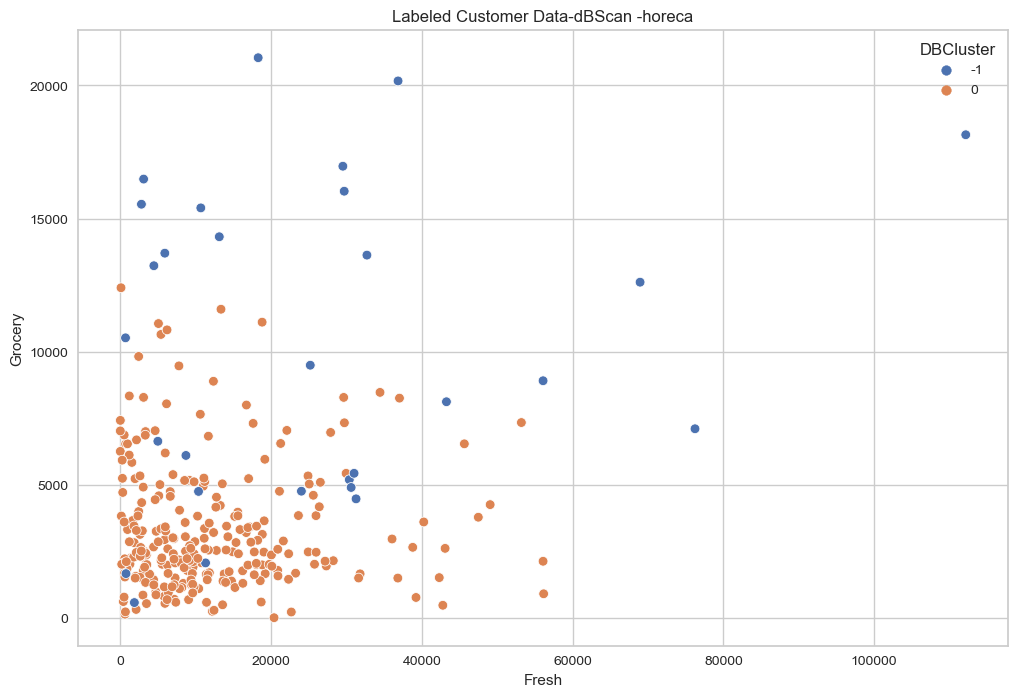

In [147]:

plt.figure(figsize=(12,8))

sns.scatterplot(x='Fresh', 
                y='Grocery', 
                data=horeca_data4, 
                hue= "DBCluster",
                palette="deep"
               ).set_title('Labeled Customer Data-dBScan -horeca')
plt.show()

In [129]:
#horeca_datanewDBS=horeca_datanew.drop(['KMClusterRS','HCACluster'], axis=1)
#horeca_datanewDBS.head()

Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen  \
3        3  13265  1196     4221    6404               507          1788   
8        3   5963  3648     6192     425              1716           750   
15       3  10253  1114     3821     397               964           412   
17       3   5876  6157     2933     839               370          4478   
19       3   7780  2495     9464     669              2518           501   

    DBCluster  
3           0  
8           0  
15          0  
17          0  
19          0

In [148]:
DBSHorecaCluster0 =horeca_data4[horeca_data4["DBCluster"]==0]
DBSHorecaCluster1 = horeca_data4[horeca_data4["DBCluster"]!=0]


array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'DBCluster'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

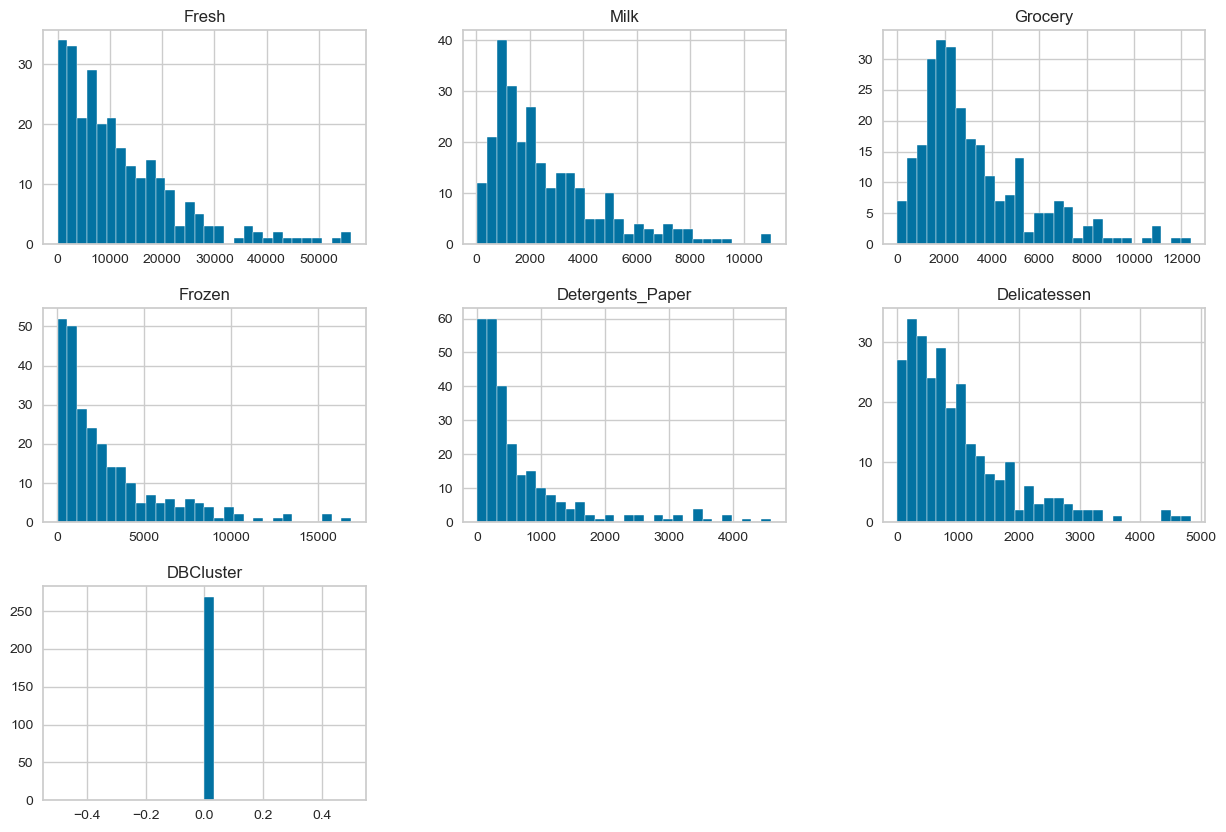

In [149]:
DBSHorecaCluster0.hist(bins=30, figsize=(15, 10))

array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'DBCluster'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

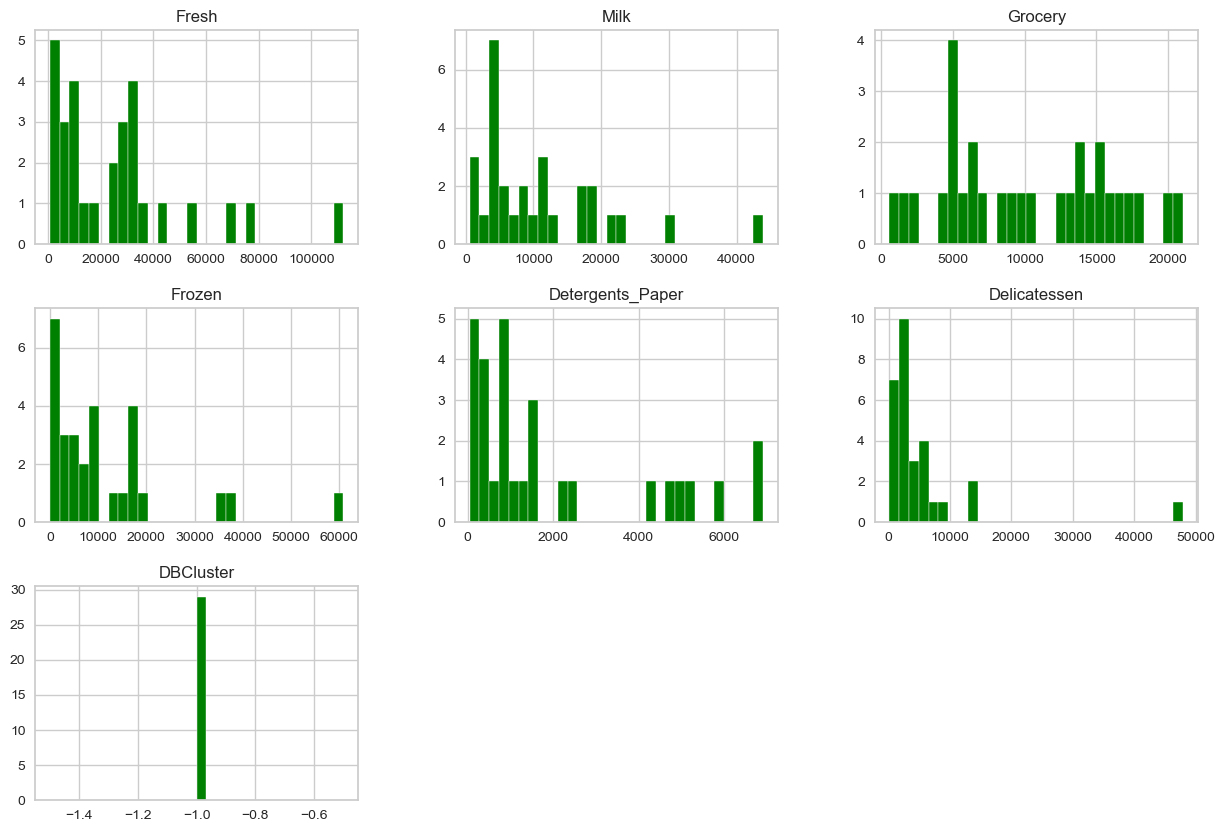

In [150]:
DBSHorecaCluster1 .hist(bins=30, figsize=(15, 10), color='green')

In [134]:
horeca_datanewDBS.head(40)


Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen  \
3        3  13265  1196     4221    6404               507          1788   
8        3   5963  3648     6192     425              1716           750   
15       3  10253  1114     3821     397               964           412   
17       3   5876  6157     2933     839               370          4478   
19       3   7780  2495     9464     669              2518           501   
21       3   5567   871     2010    3383               375           569   
22       3  31276  1917     4469    9408              2381          4334   
26       3   9898   961     2861    3151               242           833   
27       3  14276   803     3045     485               100           518   
29       3  43088  2100     2609    1200              1107           823   
30       3  18815  3610    11107    1148              2134          2963   
31       3   2612  4339     3133    2088               820           985   
32       3  21632  1318     2886     266               918           405   
33       3  29729  4786     7326    6130               361          1083   
34       3   1502  1979     2262     425               483           395   
36       3  29955  4362     5428    1729               862          4626   
39       3  56159   555      902   10002               212          2916   
40       3  24025  4332     4757    9510              1145          5864   
41       3  19176  3065     5956    2033              2575          2802   
50       3   6269  1095     1980    3860               609          2162   
51       3   3347  4051     6996     239              1538           301   
54       3  27329  1449     1947    2436               204          1333   
55       3   5264  3683     5005    1057              2024          1130   
58       3  13779  1970     1648     596               227           436   
59       3   6137  5360     8040     129              3084          1603   
64       3   4760  1227     3250    3724              1247          1145   
66       3      9  1534     7417     175              3468            27   
68       3   2446  7260     3993    5870               788          3095   
69       3   8352  2820     1293     779               656           144   
70       3  16705  2037     3202   10643               116          1365   
71       3  18291  1266    21042    5373              4173         14472   
72       3   4420  5139     2661    8872              1321           181   
75       3  20398  1137        3    4407                 3           975   
76       3    717  3587     6532    7530               529           894   
78       3  10766  1175     2067    2096               301           167   
79       3   1640  3259     3655     868              1202          1653   
80       3   7005   829     3009     430               610           529   
83       3  20874  1563     1783    2320               550           772   
87       3  43265  5025     8117    6312              1579         14351   
88       3   7864   542     4042    9735               165            46   

    DBCluster  
3           0  
8           0  
15          0  
17          0  
19          0  
21          0  
22         -1  
26          0  
27          0  
29          0  
30          0  
31          0  
32          0  
33          0  
34          0  
36          0  
39          0  
40         -1  
41          0  
50          0  
51          0  
54          0  
55          0  
58          0  
59          0  
64          0  
66          0  
68          0  
69          0  
70          0  
71         -1  
72          0  
75          0  
76          0  
78          0  
79          0  
80          0  
83          0  
87         -1  
88          0

# Now let's focus on the winsorised dataset as a whole

# Winsorised Unseparated

In [154]:
#Scale the data with Robust Scaler
#RobustScaler
scaler   = RobustScaler()
winsorized_spending_input_data_scaledRS = scaler.fit_transform(winsorized_spending_input_data)
scaled_winsorized_spending_input_dataRS = pd.DataFrame(winsorized_spending_input_data_scaledRS , columns=winsorized_spending_input_data.columns)
scaled_winsorized_spending_input_dataRS.head()


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  0.301680  1.065712  0.329952 -0.466572          0.506787      0.263810
1 -0.104810  1.092934  0.565993  0.083926          0.675670      0.574008
2 -0.155802  0.915816  0.344418  0.312589          0.736512      3.409809
3  0.344850 -0.429714 -0.062862  1.734708         -0.084442      0.582507
4  1.022092  0.315171  0.287260  0.849573          0.262056      2.988314

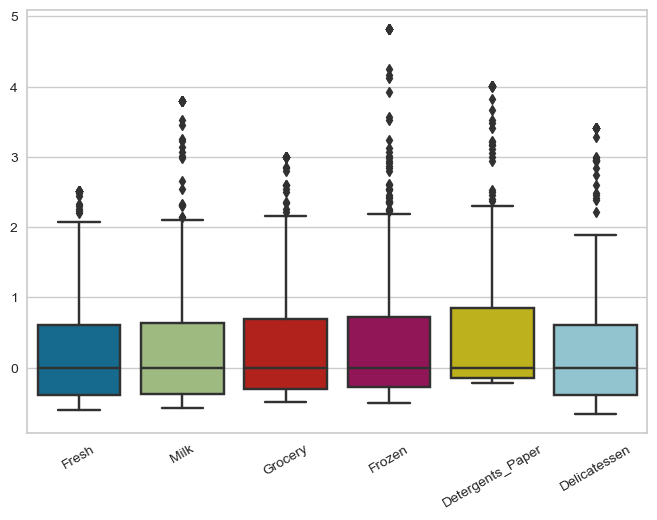

In [155]:
#check the scale now
axSpendwins = sns.boxplot(data=scaled_winsorized_spending_input_dataRS)
axSpendwins.set_xticklabels(axSpendwins.get_xticklabels(), rotation=30)
plt.show();

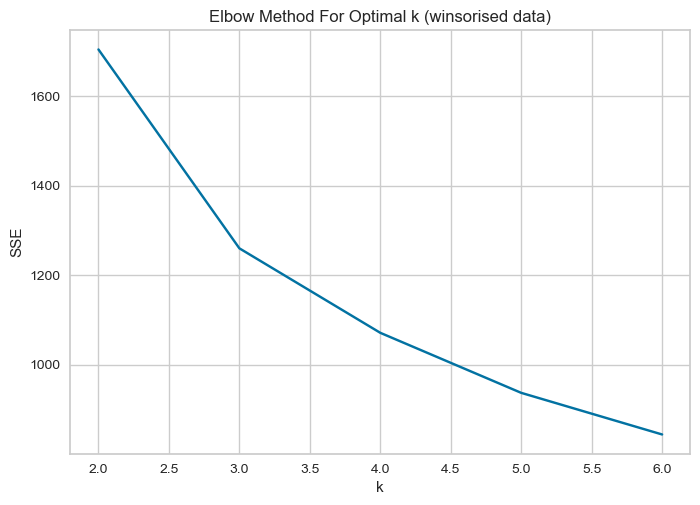

In [156]:

#Utilising Robust Scaler
#Elbow Method : There’s a sweet spot where the SSE curve starts to bend known as the elbow point. The x-value of this point is thought to be a reasonable trade-off between error and number of clusters. The elbowpoint is the point where the rate of decrease of mean distance i.e. SSE will not change significantly with increase in number of clusters.

# Create an empty list for sum of squared distances to be appended for k values 2 to 7
Sum_of_squared_distancesW = [] 

# Values for K (centroids) 
K = range(2, 7)

for k in K:
    kmw = KMeans(n_clusters =k)
    kmwin = kmw.fit(winsorized_spending_input_data_scaledRS)
    
    # model.inertia_: Sum of squared distances of samples to their closest cluster center, 
    # weighted by the sample weights if provided 
    # (from documentation - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
    Sum_of_squared_distancesW.append(kmwin.inertia_)
    
plt.plot(K, Sum_of_squared_distancesW, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k (winsorised data)')
plt.show()

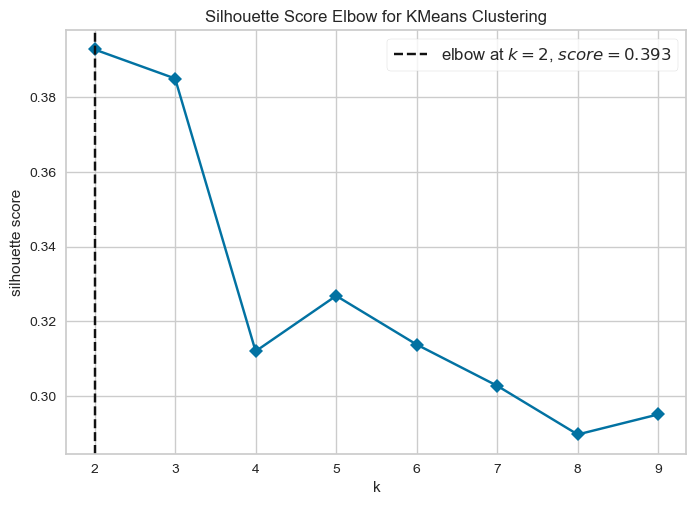

In [157]:
#Silhouette Coefficient
#Is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors: How close the data point is to other points in the cluster and how far away the data point is from points in other clusters. Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

model = KMeans(random_state=42) 

visualizer = KElbowVisualizer(model, k=(2, 10), metric='silhouette', timings=False)
visualizer.fit(winsorized_spending_input_data_scaledRS)    
visualizer.poof()
plt.show();

In [158]:
opt_k = 2

# Instantiate a KMeans object with the OPTIMAL k as found above 
# Store it in a variable named "kmodel" 
# Fit the kmodel model on the X_scaled data and use the predict() function (or fit_predict() directly) 
# to get the assinged clusters for each point 
# Save the results in a new variable "cluster_assignment"

kmodel2 = KMeans(n_clusters=opt_k)
cluster_assignmentRSW2 = kmodel2.fit_predict(winsorized_spending_input_data_scaledRS)
cluster_assignmentRSW2

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [161]:
winsorized_spending_input_data2=winsorized_spending_input_data
winsorized_spending_input_data2["KMClusterRS"] = cluster_assignmentRSW2
winsorized_spending_input_data2.head(10)


Fresh     Milk  Grocery  Frozen  Detergents_Paper  Delicatessen  \
0  12669.0   9656.0   7561.0   214.0            2674.0       1338.00   
1   7057.0   9810.0   9568.0  1762.0            3293.0       1776.00   
2   6353.0   8808.0   7684.0  2405.0            3516.0       5780.15   
3  13265.0   1196.0   4221.0  6404.0             507.0       1788.00   
4  22615.0   5410.0   7198.0  3915.0            1777.0       5185.00   
5   9413.0   8259.0   5126.0   666.0            1795.0       1451.00   
6  12126.0   3199.0   6975.0   480.0            3140.0        545.00   
7   7579.0   4956.0   9426.0  1669.0            3321.0       2566.00   
8   5963.0   3648.0   6192.0   425.0            1716.0        750.00   
9   6006.0  11093.0  18881.0  1159.0            7425.0       2098.00   

   KMClusterRS  
0            0  
1            0  
2            1  
3            0  
4            0  
5            0  
6            0  
7            0  
8            0  
9            1

In [162]:
KMW2Cluster0 = winsorized_spending_input_data2[winsorized_spending_input_data2["KMClusterRS"]==0]
KMW2Cluster1 = winsorized_spending_input_data2[winsorized_spending_input_data2["KMClusterRS"]==1]


array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'KMClusterRS'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

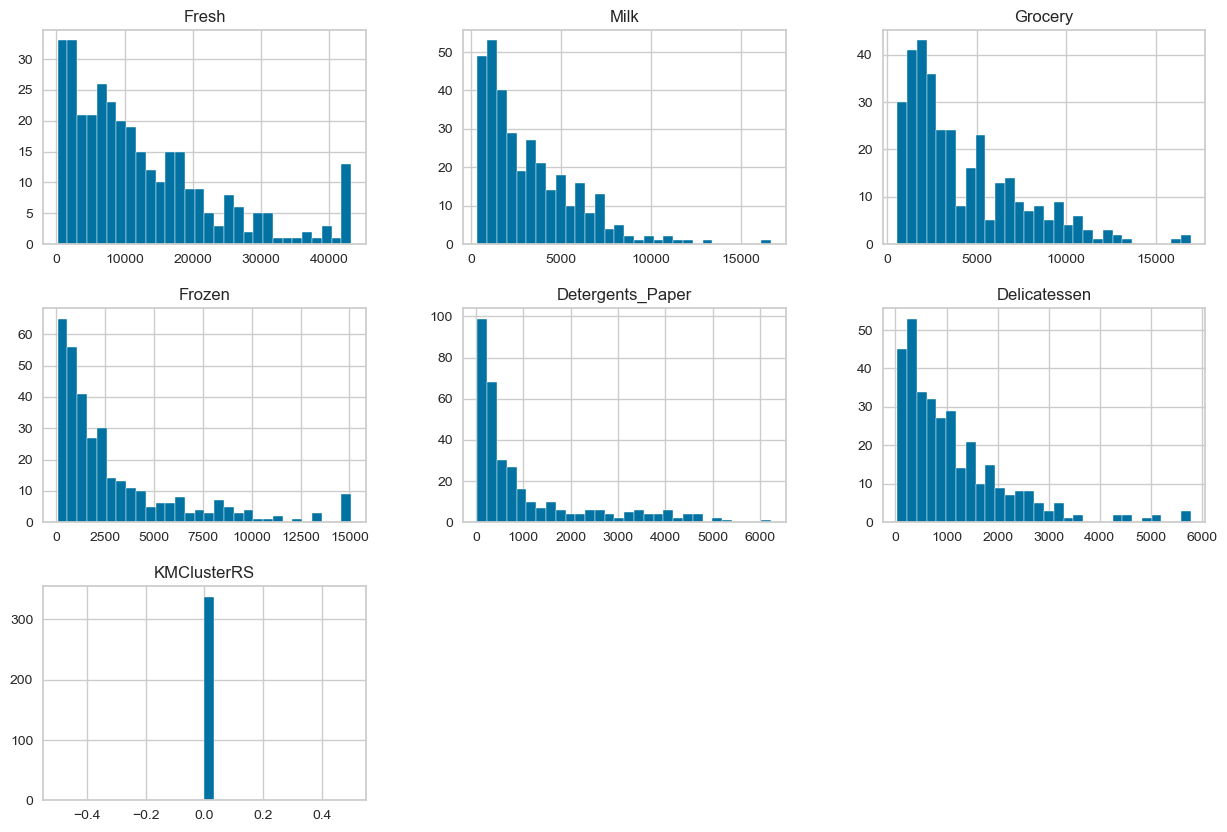

In [163]:
KMW2Cluster0.hist(bins=30, figsize=(15, 10))

array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'KMClusterRS'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

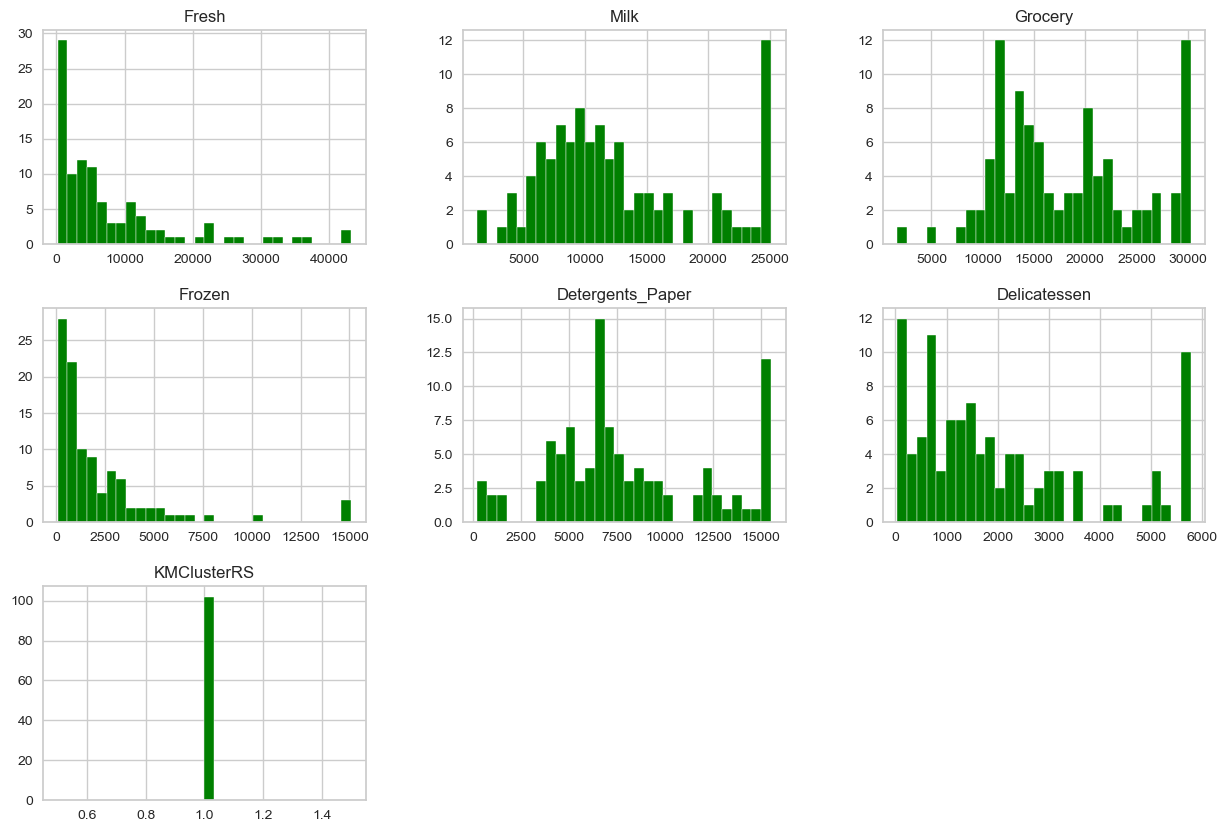

In [164]:
KMW2Cluster1.hist(bins=30, figsize=(15, 10),color='green')


In [167]:
opt_k = 3

# Instantiate a KMeans object with the OPTIMAL k as found above 
# Store it in a variable named "kmodel" 
# Fit the kmodel model on the X_scaled data and use the predict() function (or fit_predict() directly) 
# to get the assinged clusters for each point 
# Save the results in a new variable "cluster_assignment"

kmodel = KMeans(n_clusters=opt_k)
cluster_assignmentRSW = kmodel.fit_predict(winsorized_spending_input_data_scaledRS)
cluster_assignmentRSW

array([0, 0, 1, 2, 2, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2, 2, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2,
       2, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 1,
       0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 2, 2, 0,
       0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       1, 2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [168]:
winsorized_spending_input_data["KMClusterRS"] = cluster_assignmentRSW
winsorized_spending_input_data.head(10)

Fresh     Milk  Grocery  Frozen  Detergents_Paper  Delicatessen  \
0  12669.0   9656.0   7561.0   214.0            2674.0       1338.00   
1   7057.0   9810.0   9568.0  1762.0            3293.0       1776.00   
2   6353.0   8808.0   7684.0  2405.0            3516.0       5780.15   
3  13265.0   1196.0   4221.0  6404.0             507.0       1788.00   
4  22615.0   5410.0   7198.0  3915.0            1777.0       5185.00   
5   9413.0   8259.0   5126.0   666.0            1795.0       1451.00   
6  12126.0   3199.0   6975.0   480.0            3140.0        545.00   
7   7579.0   4956.0   9426.0  1669.0            3321.0       2566.00   
8   5963.0   3648.0   6192.0   425.0            1716.0        750.00   
9   6006.0  11093.0  18881.0  1159.0            7425.0       2098.00   

   KMClusterRS  
0            0  
1            0  
2            1  
3            2  
4            2  
5            0  
6            0  
7            0  
8            0  
9            1

In [170]:

KMWCluster0 = winsorized_spending_input_data[winsorized_spending_input_data["KMClusterRS"]==0]
KMWCluster1 = winsorized_spending_input_data[winsorized_spending_input_data["KMClusterRS"]==1]
KMWCluster2 = winsorized_spending_input_data[winsorized_spending_input_data["KMClusterRS"]==2]

array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'KMClusterRS'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

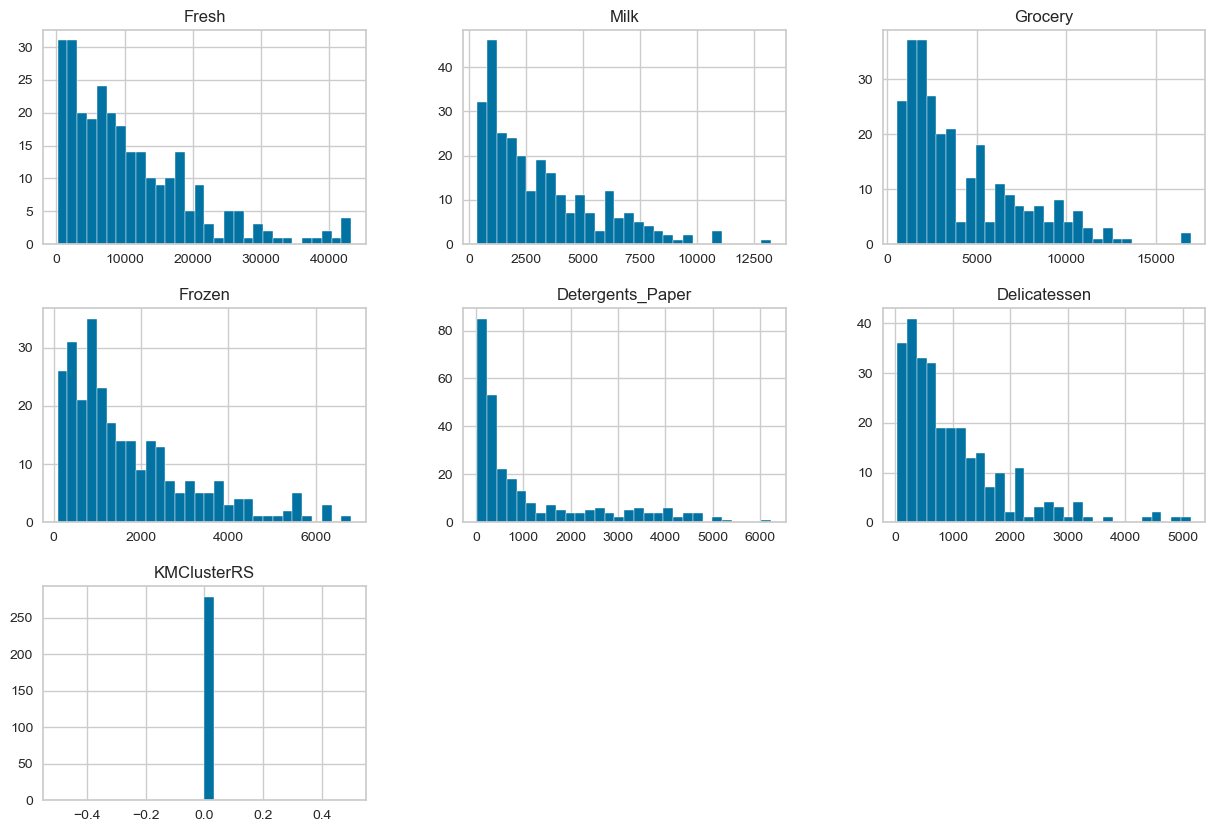

In [171]:
KMWCluster0 .hist(bins=30, figsize=(15, 10))

array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'KMClusterRS'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

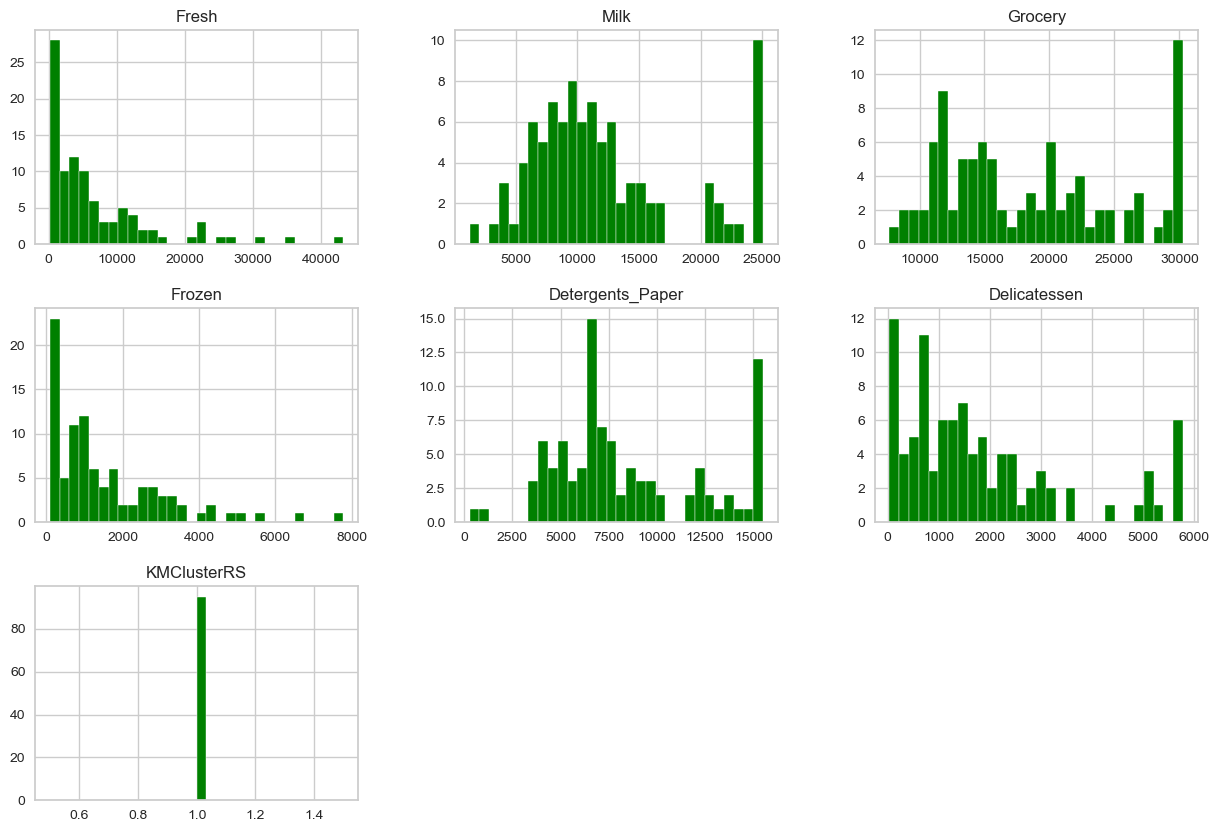

In [186]:
KMWCluster1 .hist(bins=30, figsize=(15, 10),color='green')

array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'KMClusterRS'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

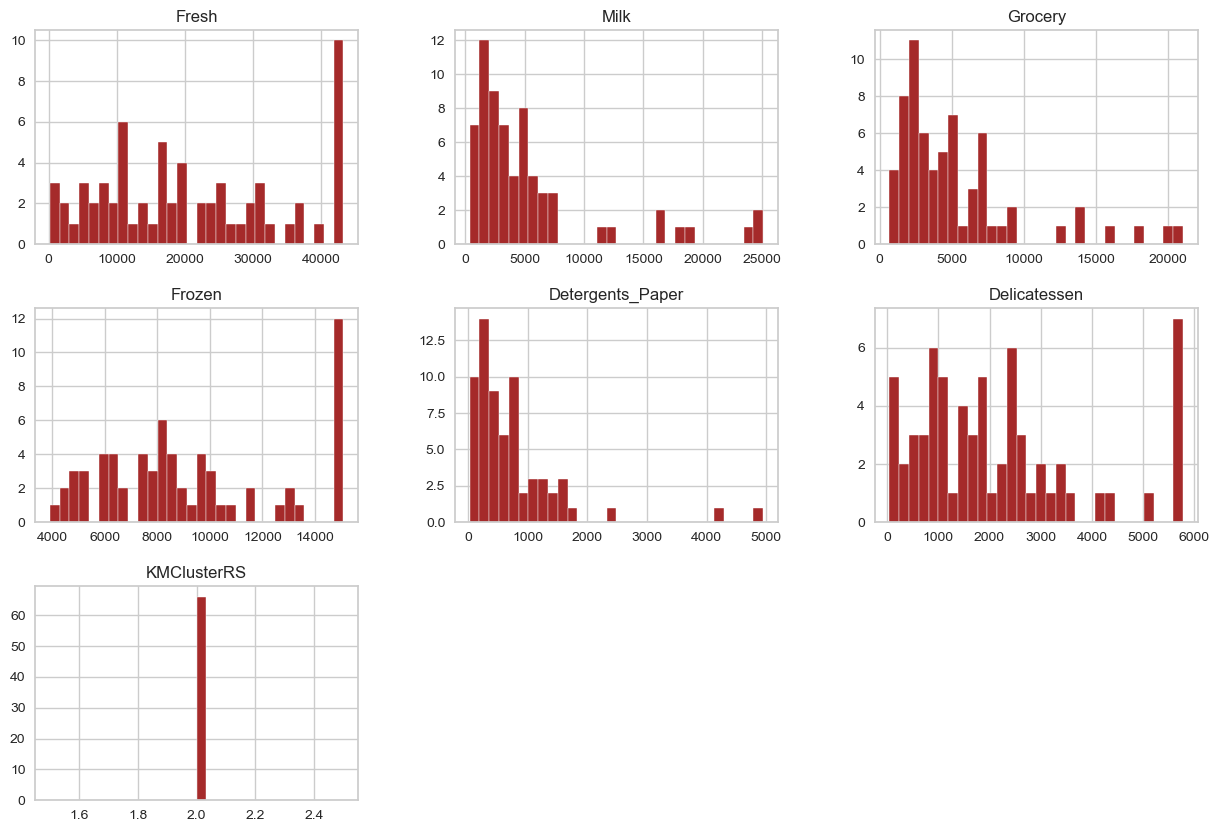

In [187]:
KMWCluster2 .hist(bins=30, figsize=(15, 10), color='brown')

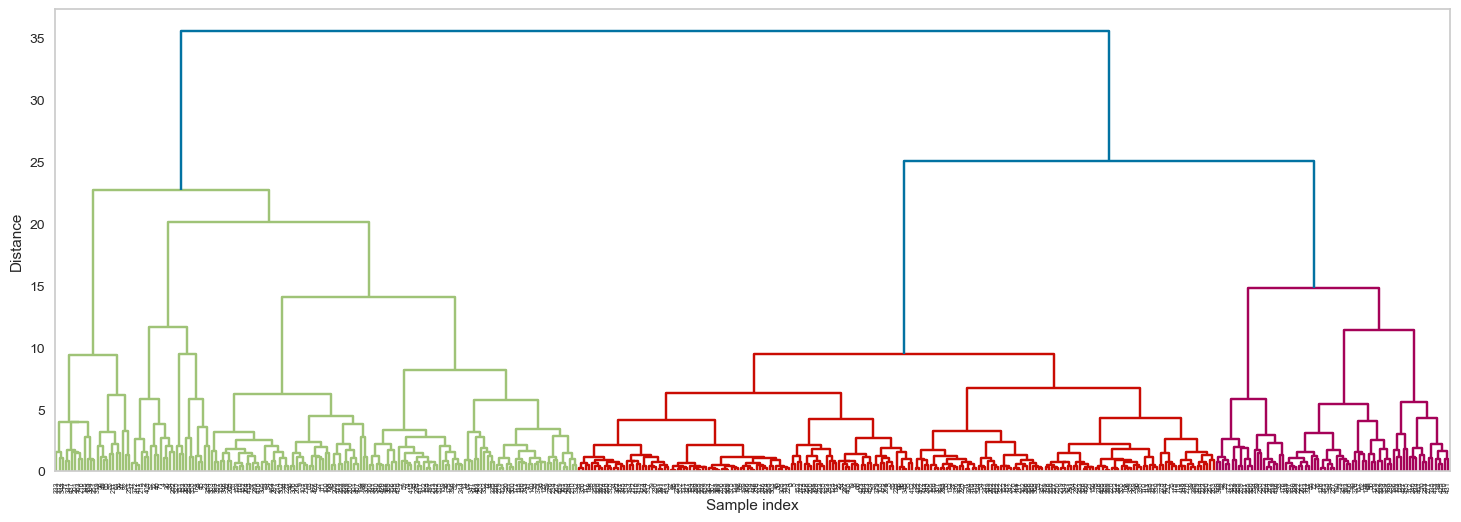

In [174]:
# Apply hierarchical clustering 
Z = linkage(winsorized_spending_input_data_scaledRS, method='ward', metric='euclidean')

# Draw the dendrogram
plt.figure(figsize=(18,6))
dendrogram(Z)
plt.ylabel('Distance')
plt.xlabel('Sample index')
plt.grid(False)
plt.show()


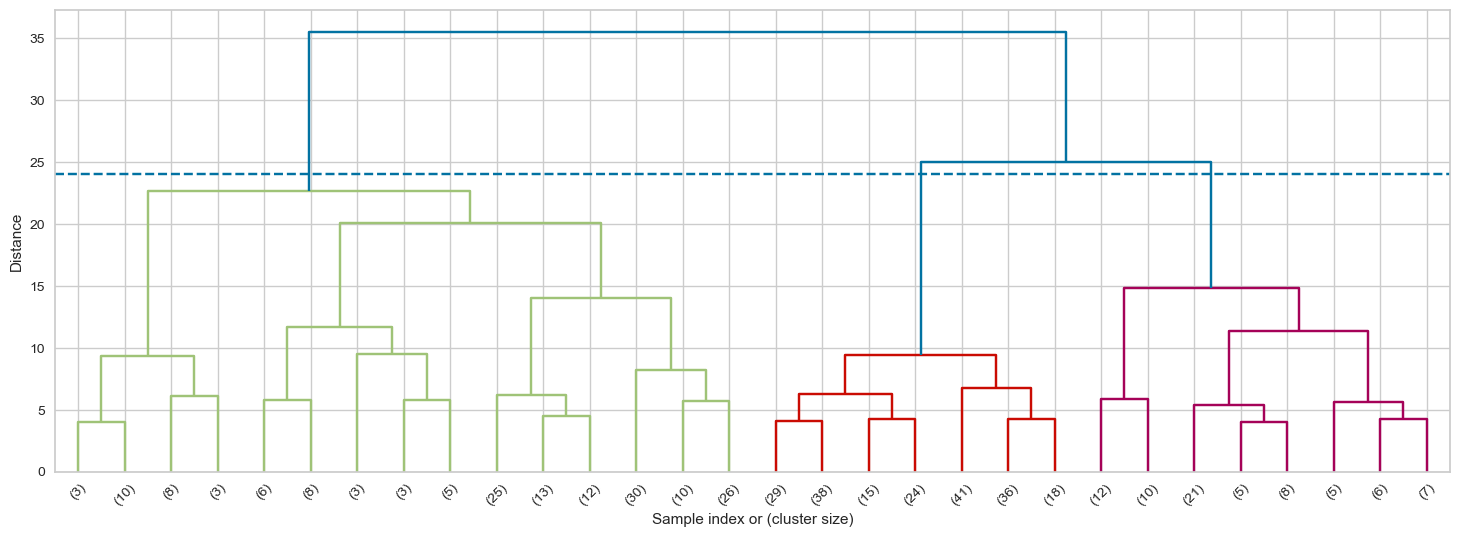

In [175]:
# Draw the dendrogram using a cut_off value

plt.figure(figsize=(18,6))
cut_off = 24

dendrogram(Z, color_threshold=cut_off,
           truncate_mode='lastp', 
           # show only the last p merged clusters
           # p=30
          )

plt.ylabel('Distance')
plt.xlabel('Sample index or (cluster size)')
plt.hlines(cut_off, 0, len(winsorized_spending_input_data_scaledRS), linestyle='--')
plt.show()

In [176]:
hca_clusters = 3

agglomerative = AgglomerativeClustering(n_clusters=hca_clusters, 
                                        linkage = 'ward', # merges two clusters if the resulting has small variance
                                        affinity= 'euclidean')

cluster_assignmenthcaW = agglomerative.fit_predict(winsorized_spending_input_data_scaledRS)
cluster_assignmenthcaW
winsorized_spending_input_dataH=winsorized_spending_input_data.drop('KMClusterRS', axis=1)
winsorized_spending_input_dataH["HCACluster"] = cluster_assignmenthcaW
winsorized_spending_input_dataH.head(10)

Fresh     Milk  Grocery  Frozen  Detergents_Paper  Delicatessen  \
0  12669.0   9656.0   7561.0   214.0            2674.0       1338.00   
1   7057.0   9810.0   9568.0  1762.0            3293.0       1776.00   
2   6353.0   8808.0   7684.0  2405.0            3516.0       5780.15   
3  13265.0   1196.0   4221.0  6404.0             507.0       1788.00   
4  22615.0   5410.0   7198.0  3915.0            1777.0       5185.00   
5   9413.0   8259.0   5126.0   666.0            1795.0       1451.00   
6  12126.0   3199.0   6975.0   480.0            3140.0        545.00   
7   7579.0   4956.0   9426.0  1669.0            3321.0       2566.00   
8   5963.0   3648.0   6192.0   425.0            1716.0        750.00   
9   6006.0  11093.0  18881.0  1159.0            7425.0       2098.00   

   HCACluster  
0           2  
1           0  
2           0  
3           2  
4           0  
5           2  
6           2  
7           0  
8           2  
9           0

In [177]:

HCAWCluster0 = winsorized_spending_input_dataH[winsorized_spending_input_dataH["HCACluster"]==0]
HCAWCluster1 = winsorized_spending_input_dataH[winsorized_spending_input_dataH["HCACluster"]==1]
HCAWCluster2 = winsorized_spending_input_dataH[winsorized_spending_input_dataH["HCACluster"]==2]

array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'HCACluster'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

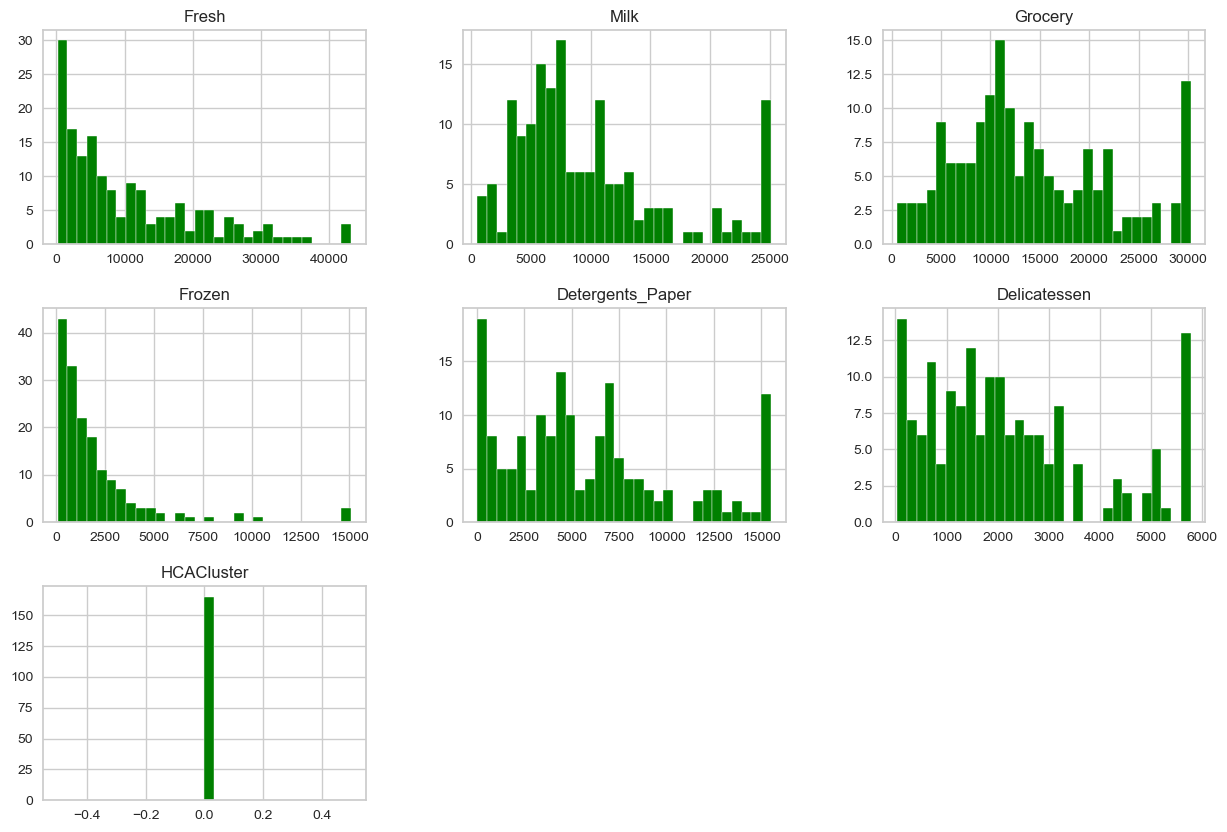

In [200]:
HCAWCluster0 .hist(bins=30, figsize=(15, 10), color='green')

array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'HCACluster'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

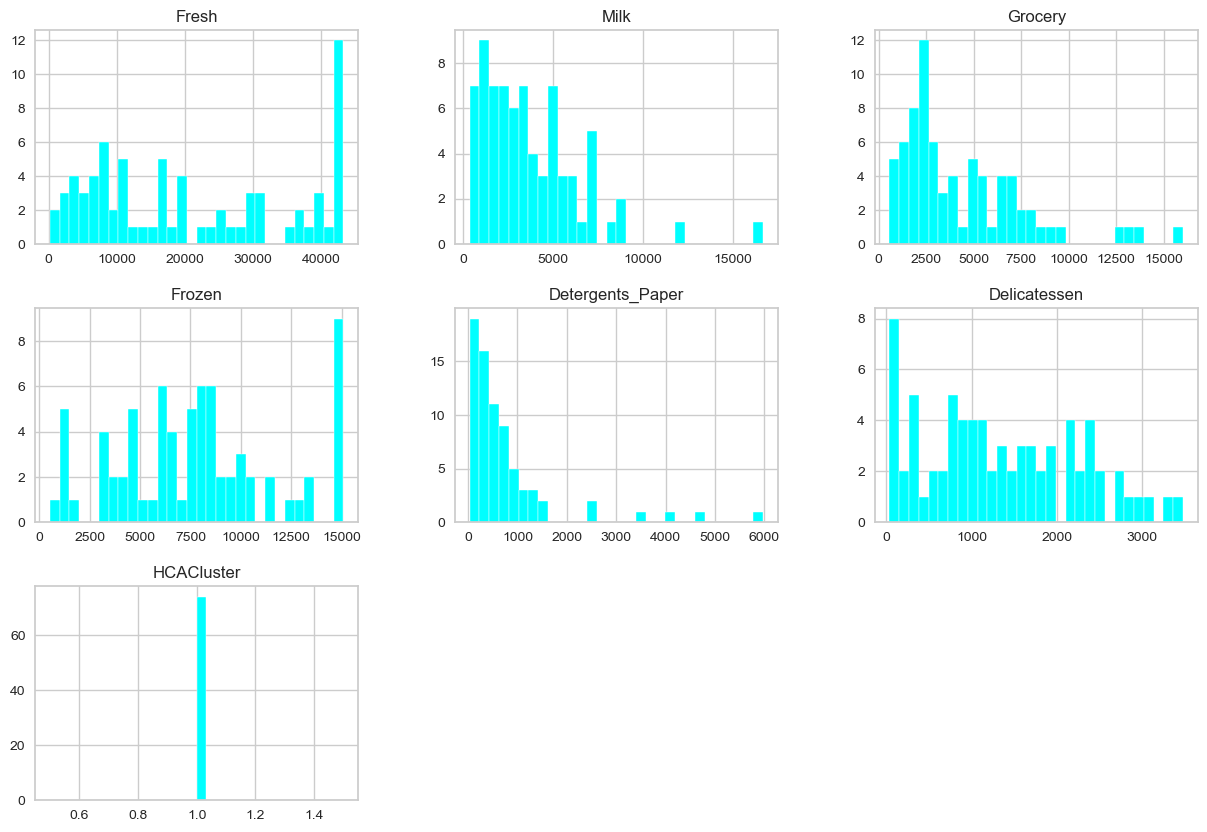

In [201]:
HCAWCluster1.hist(bins=30, figsize=(15, 10),color='cyan')

array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'HCACluster'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

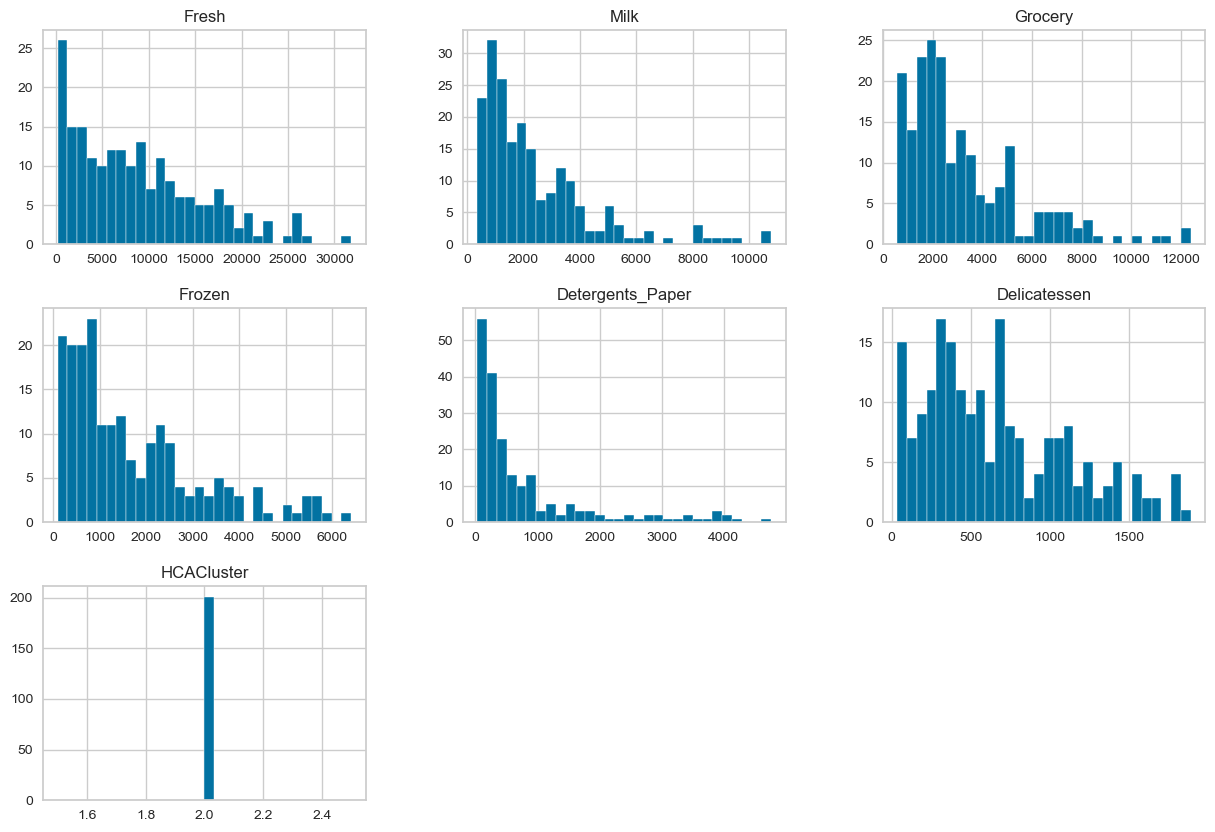

In [202]:
HCAWCluster2.hist(bins=30, figsize=(15, 10))

In [182]:
#Lets check for 2 HCA clusters
hca_clusters = 2

agglomerative = AgglomerativeClustering(n_clusters=hca_clusters, 
                                        linkage = 'ward', # merges two clusters if the resulting has small variance
                                        affinity= 'euclidean')

cluster_assignmenthcaW2 = agglomerative.fit_predict(winsorized_spending_input_data_scaledRS)
cluster_assignmenthcaW2
winsorized_spending_input_dataH2=winsorized_spending_input_dataH.drop('HCACluster', axis=1)

winsorized_spending_input_dataH2["HCACluster"] = cluster_assignmenthcaW2
winsorized_spending_input_dataH2.head(10)

Fresh     Milk  Grocery  Frozen  Detergents_Paper  Delicatessen  \
0  12669.0   9656.0   7561.0   214.0            2674.0       1338.00   
1   7057.0   9810.0   9568.0  1762.0            3293.0       1776.00   
2   6353.0   8808.0   7684.0  2405.0            3516.0       5780.15   
3  13265.0   1196.0   4221.0  6404.0             507.0       1788.00   
4  22615.0   5410.0   7198.0  3915.0            1777.0       5185.00   
5   9413.0   8259.0   5126.0   666.0            1795.0       1451.00   
6  12126.0   3199.0   6975.0   480.0            3140.0        545.00   
7   7579.0   4956.0   9426.0  1669.0            3321.0       2566.00   
8   5963.0   3648.0   6192.0   425.0            1716.0        750.00   
9   6006.0  11093.0  18881.0  1159.0            7425.0       2098.00   

   HCACluster  
0           0  
1           1  
2           1  
3           0  
4           1  
5           0  
6           0  
7           1  
8           0  
9           1

In [183]:
HCAWCluster20 = winsorized_spending_input_dataH2[winsorized_spending_input_dataH2["HCACluster"]==0]
HCAWCluster21 = winsorized_spending_input_dataH2[winsorized_spending_input_dataH2["HCACluster"]==1]


array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'HCACluster'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

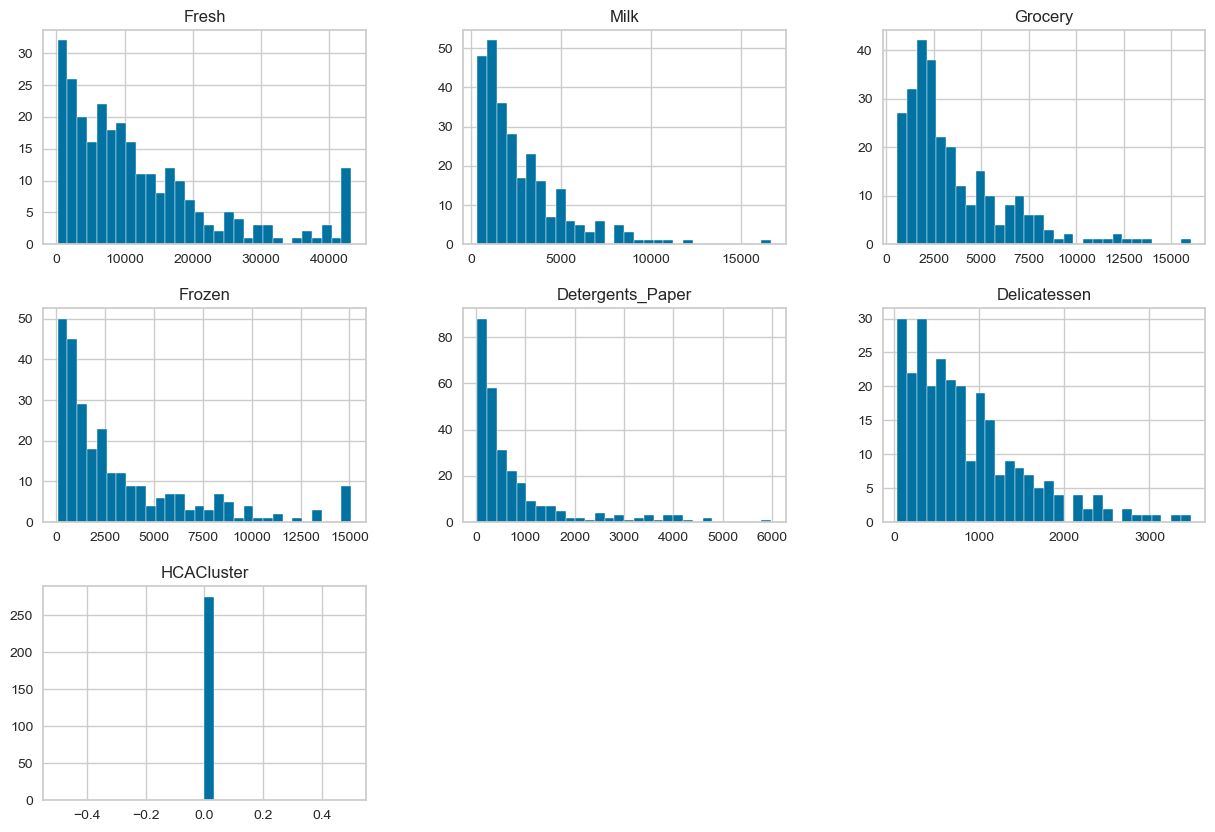

In [184]:
HCAWCluster20.hist(bins=30, figsize=(15, 10))


array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'HCACluster'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

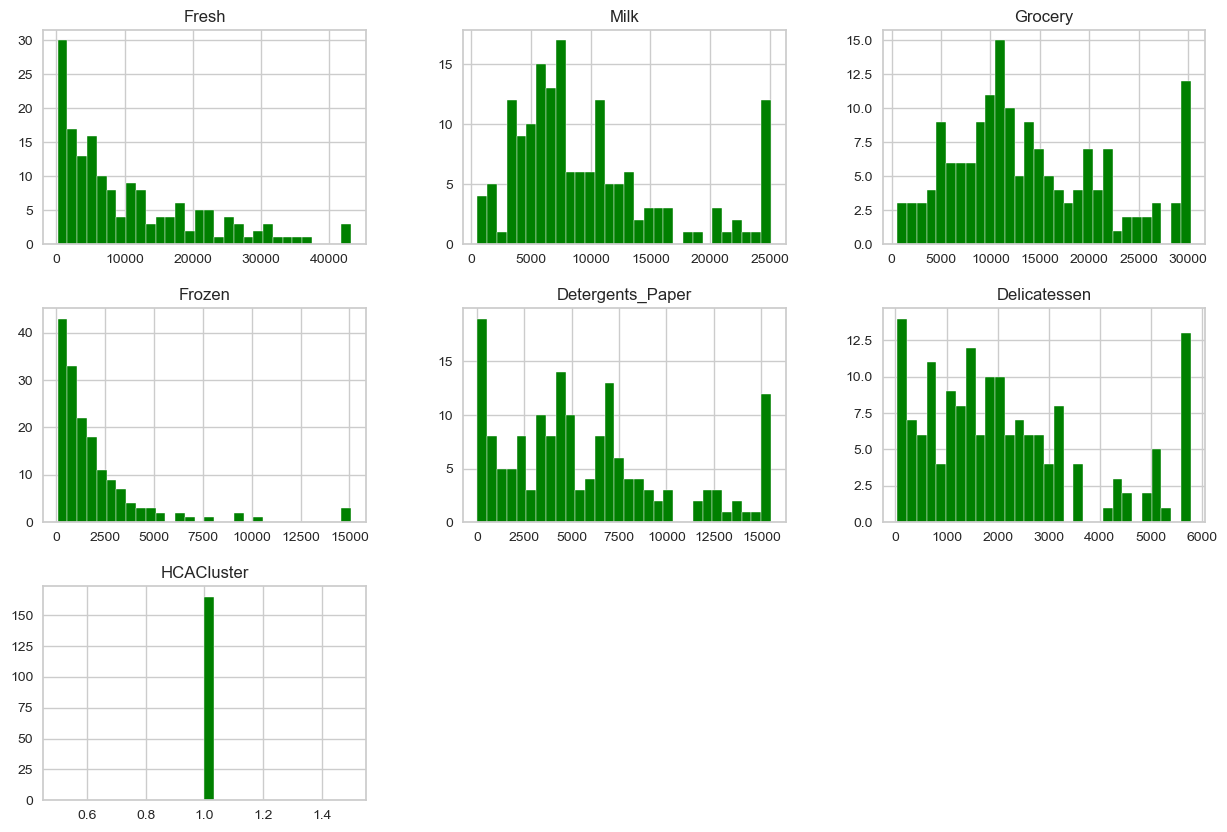

In [191]:
HCAWCluster21.hist(bins=30, figsize=(15, 10),color='green')

In [193]:
# Apply DBSCAN
db = DBSCAN(eps=2, min_samples=5)
db.fit(winsorized_spending_input_data_scaledRS)
cluster_assignmentdbW = db.fit_predict(winsorized_spending_input_data_scaledRS) # alternatively, db.labels_
cluster_assignmentdbW
print ('Number of clusters found', len(np.unique(cluster_assignmentdbW)))
print ('Clusters found', np.unique(cluster_assignmentdbW))

Number of clusters found 2
Clusters found [-1  0]


In [194]:
# WARNING this may take a couple of minutes to finish!
eps  = np.linspace(.3, 2.0, 20)
mins = np.arange(3, 50, 2)
Z = np.zeros((len(eps), len(mins)))

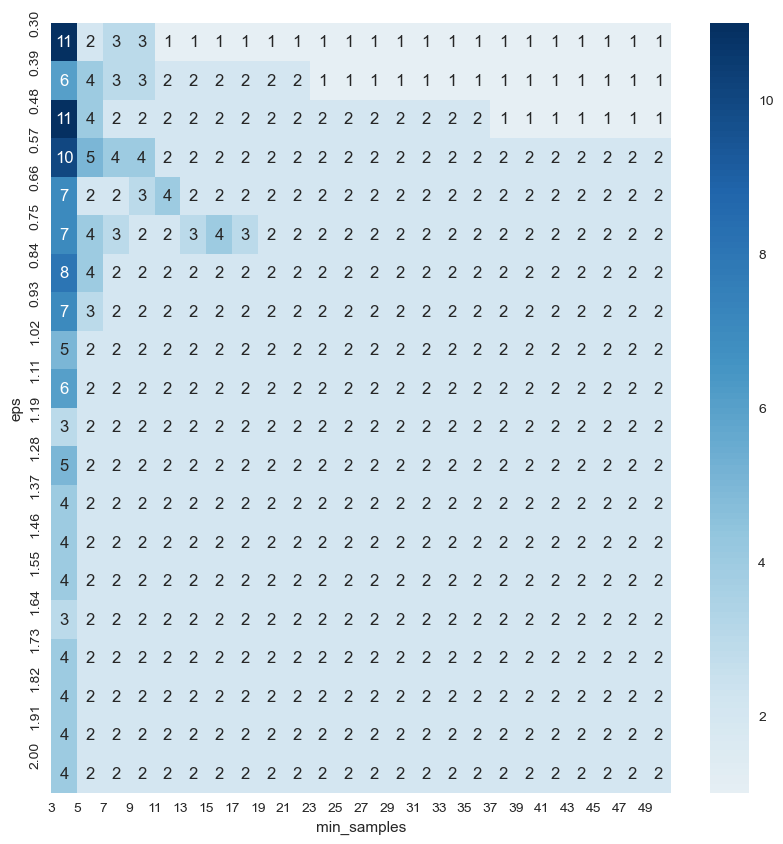

In [195]:

for i, e in enumerate(eps):
    for j, m in enumerate(mins):
        db = DBSCAN(eps=e, min_samples=m)
        clusters_foundW = len(np.unique(db.fit_predict(winsorized_spending_input_data_scaledRS)))
        Z[i,j] = clusters_foundW
plt.figure(figsize=(10, 10))
sns.heatmap(Z, cmap='RdBu', center=0, annot=True);
plt.xticks(np.arange(Z.shape[1]), mins)
plt.xlabel('min_samples')
plt.yticks(np.arange(Z.shape[0]), ['%0.2f' % x for x in eps])
plt.ylabel('eps')
plt.show()

In [196]:
winsorized_spending_input_dataDB=winsorized_spending_input_dataH.drop('HCACluster', axis=1)
winsorized_spending_input_dataDB["DBCluster"] = cluster_assignmentdbW
winsorized_spending_input_dataDB.head(10)

Fresh     Milk  Grocery  Frozen  Detergents_Paper  Delicatessen  \
0  12669.0   9656.0   7561.0   214.0            2674.0       1338.00   
1   7057.0   9810.0   9568.0  1762.0            3293.0       1776.00   
2   6353.0   8808.0   7684.0  2405.0            3516.0       5780.15   
3  13265.0   1196.0   4221.0  6404.0             507.0       1788.00   
4  22615.0   5410.0   7198.0  3915.0            1777.0       5185.00   
5   9413.0   8259.0   5126.0   666.0            1795.0       1451.00   
6  12126.0   3199.0   6975.0   480.0            3140.0        545.00   
7   7579.0   4956.0   9426.0  1669.0            3321.0       2566.00   
8   5963.0   3648.0   6192.0   425.0            1716.0        750.00   
9   6006.0  11093.0  18881.0  1159.0            7425.0       2098.00   

   DBCluster  
0          0  
1          0  
2          0  
3          0  
4          0  
5          0  
6          0  
7          0  
8          0  
9          0

In [197]:
DBWCluster0 = winsorized_spending_input_dataDB[winsorized_spending_input_dataDB["DBCluster"]==0]
DBWCluster1 = winsorized_spending_input_dataDB[winsorized_spending_input_dataDB["DBCluster"]!=0]
#DBWWCluster2 = winsorized_spending_input_dataDB[winsorized_spending_input_datDB["HCACluster"]==2]

array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'DBCluster'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

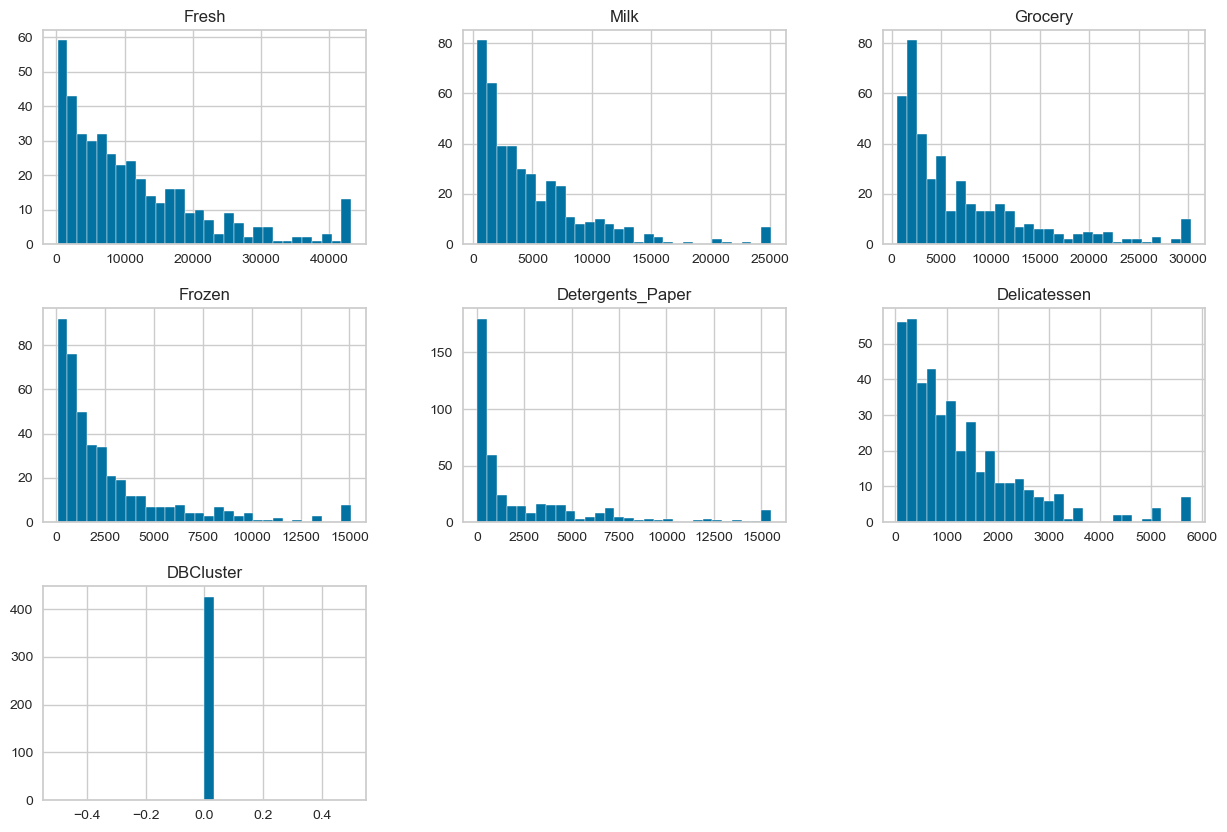

In [198]:
DBWCluster0.hist(bins=30, figsize=(15, 10))

array([[<AxesSubplot: title={'center': 'Fresh'}>,
        <AxesSubplot: title={'center': 'Milk'}>,
        <AxesSubplot: title={'center': 'Grocery'}>],
       [<AxesSubplot: title={'center': 'Frozen'}>,
        <AxesSubplot: title={'center': 'Detergents_Paper'}>,
        <AxesSubplot: title={'center': 'Delicatessen'}>],
       [<AxesSubplot: title={'center': 'DBCluster'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

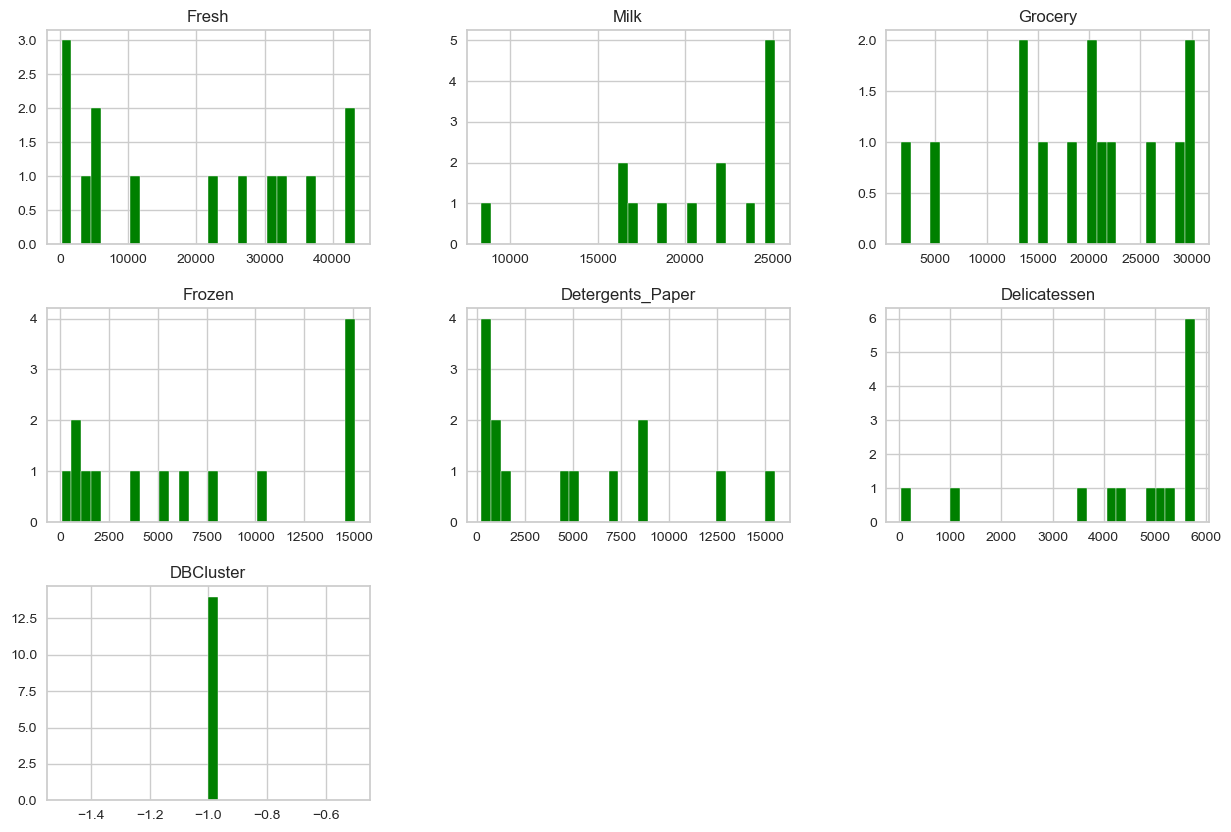

In [199]:

DBWCluster1.hist(bins=30, figsize=(15, 10),color='green')


# We could also proceed with  3 clusters for a re-evaluation in the future